## Using `archive`, for a wider set of SSO metrics (using the summary statistics CSV file)

This notebook takes the solar system metrics and plots more of them for more families. 
It's a bit of a demo and a bit of a 'make a bunch of plots' notebook. 

In [1]:
# Some useful packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import IPython

import rubin_sim.maf as maf

The `archive` module (from `rubin_sim.maf.archive.py`) provides functions to help deal with json/pandas data frames containing lists of the simulations in a given run, as well as typical sets of metrics. With these lists of simulations in each family, it's easier to isolate those metric results to compare the effect of varying that survey strategy. `archive` works with additional functions in `summary_plots` to then normalize and plot metric summary statistics.
(`archive` and `summary_plots` are the evolution of the family_infos and metric_infos classes).

In [137]:
# Get the base 'family' information (which runs are in which family) to use to pull out run names
family_runs = maf.archive.get_family_runs()
family_runs

run  \
family                                               
baseline                       baseline_v2.0_10yrs   
retro                baseline_retrofoot_v2.0_10yrs   
retro                    retro_baseline_v2.0_10yrs   
rolling               rolling_ns2_rw0.5_v2.0_10yrs   
rolling               rolling_ns3_rw0.5_v2.0_10yrs   
...                                            ...   
microsurveys  twilight_neo_nightpattern3v2.0_10yrs   
microsurveys  twilight_neo_nightpattern6v2.0_10yrs   
microsurveys  twilight_neo_nightpattern5v2.0_10yrs   
microsurveys  twilight_neo_nightpattern2v2.0_10yrs   
microsurveys  twilight_neo_nightpattern1v2.0_10yrs   

                                                          brief  \
family                                                            
baseline                                          v2.0 baseline   
retro                  v1.x footprint but new code capabilities   
retro         v1.x baseline with rubin_sim (without new code...   
rolling                        Rolling half-sky (2 regions) 50%   
rolling                       Rolling third-sky (3 regions) 50%   
...                                                         ...   
microsurveys         Twilight neo observations 1 night on 2 off   
microsurveys         Twilight neo observations 3 night on 4 off   
microsurveys         Twilight neo observations 4 night on 4 off   
microsurveys        Twilight neo observations every other night   
microsurveys              Twilight neo observations every night   

                                                       filepath  version  \
family                                                                     
baseline                        baseline/baseline_v2.0_10yrs.db        2   
retro                    retro/baseline_retrofoot_v2.0_10yrs.db        2   
retro                        retro/retro_baseline_v2.0_10yrs.db        2   
rolling                 rolling/rolling_ns2_rw0.5_v2.0_10yrs.db        2   
rolling                 rolling/rolling_ns2_rw0.9_v2.0_10yrs.db        2   
...                                                         ...      ...   
microsurveys  microsurveys/local_gals/local_gal_bindx0_v2.0_...        2   
microsurveys           microsurveys/carina/carina_v2.0_10yrs.db        2   
microsurveys     microsurveys/short_exp/short_exp_v2.0_10yrs.db        2   
microsurveys     microsurveys/smc_movie/smc_movie_v2.0_10yrs.db        2   
microsurveys  microsurveys/multi_short/multi_short_v2.0_10yr...        2   

                        reference  \
family                              
baseline      baseline_v2.0_10yrs   
retro         baseline_v2.0_10yrs   
retro         baseline_v2.0_10yrs   
rolling       baseline_v2.0_10yrs   
rolling       baseline_v2.0_10yrs   
...                           ...   
microsurveys  baseline_v2.0_10yrs   
microsurveys  baseline_v2.0_10yrs   
microsurveys  baseline_v2.0_10yrs   
microsurveys  baseline_v2.0_10yrs   
microsurveys  baseline_v2.0_10yrs   

                                                    description  \
family                                                            
baseline      **baseline** : The v2.0 baseline simulation. T...   
retro         **retro** : The retro family provides two simu...   
retro         **retro** : The retro family provides two simu...   
rolling       **rolling** : The updated baseline contains a ...   
rolling       **rolling** : The updated baseline contains a ...   
...                                                         ...   
microsurveys  **microsurveys** : There are special programs ...   
microsurveys  **microsurveys** : There are special programs ...   
microsurveys  **microsurveys** : There are special programs ...   
microsurveys  **microsurveys** : There are special programs ...   
microsurveys  **microsurveys** : There are special programs ...   

                                                            url  
family                                                         

We'll also download a version of this dataframe with a mulit-level index on 'family' that provides the same information, just accessible slightly differently.

In [66]:
family_families = maf.archive.get_family_descriptions()

Read the summary stat csv file. 

These are the standard MAF summary stats (which may include something you use!) 
but you could join your own dataframe, as long as it covered all the relevant runs.
This gives us metric results to compare between the runs.

This summary stat file can be downloaded at<br>
https://github.com/lsst-pst/survey_strategy/blob/master/fbs_2.0/summary_2022_1_11.csv

In [5]:
# Read the summary stat csv file
url_source = 'https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/summary_2022_1_11.csv'
file_source = 'summary_2022_1_16.csv'
summaries = maf.archive.get_metric_summaries(summary_source=file_source)
# summaries = archive.get_metric_summaries(summary_source=url_source)

In [59]:
# And get the metric subset lists that can help with pulling information out of the big summary dataframe
metrics_url = "https://raw.githubusercontent.com/lsst-pst/survey_strategy/main/fbs_2.0/metric_sets.json"
file_source = 'metric_sets.json'
metrics = maf.archive.get_metric_sets(file_source)
metrics.head()

metric  \
metric set metric                                                                                                  
srd        fONv MedianNvis fO All visits HealpixSlicer               fONv MedianNvis fO All visits HealpixSlicer   
           Median Parallax Error (18k) Parallax Error @ 22...  Median Parallax Error (18k) Parallax Error @ 2...   
           Median Parallax Error (18k) Parallax Error @ 24...  Median Parallax Error (18k) Parallax Error @ 2...   
           Median Proper Motion Error (18k) Proper Motion ...  Median Proper Motion Error (18k) Proper Motion...   
           Median Proper Motion Error (18k) Proper Motion ...  Median Proper Motion Error (18k) Proper Motion...   

                                                                             short_name  \
metric set metric                                                                         
srd        fONv MedianNvis fO All visits HealpixSlicer                  fONv MedianNvis   
           Median Parallax Error (18k) Parallax Error @ 22...  Med Parallax Error @22.4   
           Median Parallax Error (18k) Parallax Error @ 24...  Med Parallax Error @24.0   
           Median Proper Motion Error (18k) Proper Motion ...        Med PM Error @20.5   
           Median Proper Motion Error (18k) Proper Motion ...        Med PM Error @24.0   

                                                                           short_names_norm  \
metric set metric                                                                             
srd        fONv MedianNvis fO All visits HealpixSlicer                      fONv MedianNvis   
           Median Parallax Error (18k) Parallax Error @ 22...  1 / Med Parallax Error @22.4   
           Median Parallax Error (18k) Parallax Error @ 24...  1 / Med Parallax Error @24.0   
           Median Proper Motion Error (18k) Proper Motion ...        1 / Med PM Error @20.5   
           Median Proper Motion Error (18k) Proper Motion ...         1 /Med PM Error @24.0   

                                                              style  invert  \
metric set metric                                                             
srd        fONv MedianNvis fO All visits HealpixSlicer           k-   False   
           Median Parallax Error (18k) Parallax Error @ 22...    c-    True   
           Median Parallax Error (18k) Parallax Error @ 24...    c:    True   
           Median Proper Motion Error (18k) Proper Motion ...    r-    True   
           Median Proper Motion Error (18k) Proper Motion ...    r:    True   

                                                                 mag  
metric set metric                                                     
srd        fONv MedianNvis fO All visits HealpixSlicer         False  
           Median Parallax Error (18k) Parallax Error @ 22...  False  
           Median Parallax Error (18k) Parallax Error @ 24...  False  
           Median Proper Motion Error (18k) Proper Motion ...  False  
           Median Proper Motion Error (18k) Proper Motion ...  False

In [60]:
# What are the 'sets' of metrics?
metrics.groupby('metric set').first().index

Index(['Fraction Pop 3 bands', 'Fraction Pop 4 bands', 'Fraction Pop 5 bands',
       'Fraction Pop 6 bands', 'Lightcurve Inversion', 'Nvis', 'SSO NOBJ',
       'SSO discovery', 'area', 'cadence', 'descWFD', 'galaxies', 'radar',
       'short', 'srd', 'sso disc options', 'tvs'],
      dtype='object', name='metric set')

### Solar system metrics

Using utilities from `archive` (to normalize the data frame and plot metrics), combined with the family information dataframe with the simulations in each family, we can pull up some plots for each family.

In [163]:
sso_metrics = ['SSO discovery', 
               'Fraction Pop 3 bands', 
               'Fraction Pop 4 bands',
               'Fraction Pop 5 bands',
               'Fraction Pop 6 bands', 
               'Lightcurve Inversion']


# Basic 'general' metrics for a family(s)
def describe_family(family_names):
    for family in family_names:
        IPython.display.display_markdown(family_families['description'].loc[family], raw=True)
    these_runs = list(family_runs["run"].loc[family_names].values)
    baseline_run = family_runs['reference'].loc[family_names].iloc[0]
    if baseline_run not in these_runs:
        these_runs = [baseline_run] + these_runs
        family_names = family_names + list(family_runs.query('run == @baseline_run').index)
    d = summaries.loc[these_runs, metrics.loc['short']['metric']]
    d.columns = metrics.loc['short']['short_name'].values
    d['Briefly'] = family_runs.loc[family_names][['run', 'brief']].reset_index(drop=True).set_index('run')
    IPython.display.display(d)
    mset = 'area'
    fig, ax = maf.plot_run_metric(  # pylint: disable=invalid-name
        summaries.loc[these_runs, :], 
        metric_set=metrics.loc[mset],
        baseline_run=baseline_run,
        vertical_quantity="value",
        horizontal_quantity="run",
        metric_label_map=metrics.loc[mset]['short_name']
    )
    plt.xlim(0, len(d)-1)
    xlims = plt.xlim()
    if plt.ylim()[0] < 0.50:
        plt.ylim(bottom=0.50)
    if plt.ylim()[1] > 1.5:
        plt.ylim(top=1.5)
    plt.fill_between(xlims, 1.05, plt.ylim()[1], color='g', alpha=0.1)
    plt.fill_between(xlims, 0.95, plt.ylim()[0], color='r', alpha=0.1)

# Show and plot set of solar system specific metric outputs
def sso_family(family_names, mset):
    these_runs = list(family_runs["run"].loc[family_names].values)
    baseline_run = family_runs['reference'].loc[family_names].iloc[0]
    if baseline_run not in these_runs:
        these_runs = [baseline_run] + these_runs
    fig, ax = maf.plot_run_metric(  # pylint: disable=invalid-name
            summaries.loc[these_runs, :], 
            metric_set=metrics.loc[mset],
            baseline_run=baseline_run,
            vertical_quantity="value",
            horizontal_quantity="run",
            metric_label_map=metrics.loc[mset]['short_name']
        )
    d = summaries.loc[these_runs, metrics.loc[mset]['metric']]
    d.columns = metrics.loc[mset]['short_name']
    plt.xlim(0, len(d)-1)
    xlims = plt.xlim()
    if plt.ylim()[0] < 0.50:
        plt.ylim(bottom=0.50)
    if plt.ylim()[1] > 1.5:
        plt.ylim(top=1.5)
    plt.fill_between(xlims, 1.05, plt.ylim()[1], color='g', alpha=0.1)
    plt.fill_between(xlims, 0.95, plt.ylim()[0], color='r', alpha=0.1)
    return d

**baseline** : The v2.0 baseline simulation. This features a modified survey footprint with expanded dust-free area and WFD-level visits in the Galactic Bulge and Magellanic Clouds. Coverage of the Northern Ecliptic Spur, South Celestial Pole, and remainder of the Galactic Plane is maintained, at lower levels. Filter balance is modified in different areas of the sky. A 2-region rolling cadence is used in the dust-free WFD sky, to improve cadence. 

**retro** : The retro family provides two simulations to bridge the gap between previous sets of simulations and the updated baseline. One (retro_baseline) uses the current code base to re-run the previous baseline (i.e. this is baseline_nexp2_v1.7.1_10yrs, but run with rubin_sim) while the other (retrofoot) uses updated code settings but re-creates the baseline_nexp2_v1.7.1_10yrs footprint. These are primarily intended to help users understand potential changes in their metric results from the 1.x series of runs to the v2.0 runs, as well as the modification from sims_maf to rubin_sim.

Area with >825 visits/pointing (fO_Area)  \
run                                                                       
baseline_v2.0_10yrs                                        12893.228978   
baseline_retrofoot_v2.0_10yrs                              17510.183320   
retro_baseline_v2.0_10yrs                                  14611.263069   

                               Unextincted area i>25.9  Nvisits total  \
run                                                                     
baseline_v2.0_10yrs                       16711.175770      2086980.0   
baseline_retrofoot_v2.0_10yrs             14959.569932      2086534.0   
retro_baseline_v2.0_10yrs                 15095.535503      2048566.0   

                               Median Nvis over top 18k (fO_Nv Med)  \
run                                                                   
baseline_v2.0_10yrs                                           839.0   
baseline_retrofoot_v2.0_10yrs                                 875.0   
retro_baseline_v2.0_10yrs                                     848.0   

                               Median Nvis u band  Median Nvis g band  \
run                                                                     
baseline_v2.0_10yrs                          54.0                70.0   
baseline_retrofoot_v2.0_10yrs                56.0                79.0   
retro_baseline_v2.0_10yrs                    53.0                74.0   

                               Median Nvis r band  Median Nvis i band  \
run                                                                     
baseline_v2.0_10yrs                         178.0               180.0   
baseline_retrofoot_v2.0_10yrs               185.0               188.0   
retro_baseline_v2.0_10yrs                   180.0               180.0   

                               Median Nvis z band  Median Nvis y band  \
run                                                                     
baseline_v2.0_10yrs                         160.0               166.0   
baseline_retrofoot_v2.0_10yrs               166.0               173.0   
retro_baseline_v2.0_10yrs                   161.0               172.0   

                                                                         Briefly  
run                                                                               
baseline_v2.0_10yrs                                                v2.0 baseline  
baseline_retrofoot_v2.0_10yrs           v1.x footprint but new code capabilities  
retro_baseline_v2.0_10yrs      v1.x baseline with rubin_sim (without new code...

short_name                     Completeness PHA H<16.0  \
run                                                      
baseline_v2.0_10yrs                             0.9404   
baseline_retrofoot_v2.0_10yrs                   0.9400   
retro_baseline_v2.0_10yrs                       0.8972   

short_name                     Completeness PHA H<22.0  \
run                                                      
baseline_v2.0_10yrs                           0.589618   
baseline_retrofoot_v2.0_10yrs                 0.581077   
retro_baseline_v2.0_10yrs                     0.574551   

short_name                     Completeness NEO H<16.0  \
run                                                      
baseline_v2.0_10yrs                             0.9138   
baseline_retrofoot_v2.0_10yrs                   0.9130   
retro_baseline_v2.0_10yrs                       0.8918   

short_name                     Completeness NEO H<22.0  \
run                                                      
baseline_v2.0_10yrs                           0.565072   
baseline_retrofoot_v2.0_10yrs                 0.559837   
retro_baseline_v2.0_10yrs                     0.556265   

short_name                     Completeness MBA H<16.0  \
run                                                      
baseline_v2.0_10yrs                           1.000000   
baseline_retrofoot_v2.0_10yrs                 1.000000   
retro_baseline_v2.0_10yrs                     0.994799   

short_name                     Completeness MBA H<21.0  \
run                                                      
baseline_v2.0_10yrs                           0.536388   
baseline_retrofoot_v2.0_10yrs                 0.521977   
retro_baseline_v2.0_10yrs                     0.567658   

short_name                     Completeness Trojan H<14.0  \
run                                                         
baseline_v2.0_10yrs                                0.9958   
baseline_retrofoot_v2.0_10yrs                      0.9944   
retro_baseline_v2.0_10yrs                          0.9984   

short_name                     Completeness Trojan H<18.0  \
run                                                         
baseline_v2.0_10yrs                              0.425381   
baseline_retrofoot_v2.0_10yrs                    0.422339   
retro_baseline_v2.0_10yrs                        0.479418   

short_name                     Completeness TNO H<6.0  Completeness TNO H<8.0  
run                                                                            
baseline_v2.0_10yrs                          0.695976                0.471819  
baseline_retrofoot_v2.0_10yrs                0.676619                0.454312  
retro_baseline_v2.0_10yrs                    0.682227                0.474403

short_name                     Fraction 3 of g and (r or i) and (z or y) PHA H=16.0  \
run                                                                                   
baseline_v2.0_10yrs                                                       0.8468      
baseline_retrofoot_v2.0_10yrs                                             0.8294      
retro_baseline_v2.0_10yrs                                                 0.8094      

short_name                     Fraction 3 of g and (r or i) and (z or y) PHA H=19.0  \
run                                                                                   
baseline_v2.0_10yrs                                                       0.5332      
baseline_retrofoot_v2.0_10yrs                                             0.5180      
retro_baseline_v2.0_10yrs                                                 0.5214      

short_name                     Fraction 3 of g and (r or i) and (z or y) NEO H=16.0  \
run                                                                                   
baseline_v2.0_10yrs                                                       0.8552      
baseline_retrofoot_v2.0_10yrs                                             0.8420      
retro_baseline_v2.0_10yrs                                                 0.8274      

short_name                     Fraction 3 of g and (r or i) and (z or y) NEO H=19.0  \
run                                                                                   
baseline_v2.0_10yrs                                                       0.5268      
baseline_retrofoot_v2.0_10yrs                                             0.5150      
retro_baseline_v2.0_10yrs                                                 0.5198      

short_name                     Fraction 3 of g and (r or i) and (z or y) MBA H=16.0  \
run                                                                                   
baseline_v2.0_10yrs                                                          1.0      
baseline_retrofoot_v2.0_10yrs                                                1.0      
retro_baseline_v2.0_10yrs                                                    1.0      

short_name                     Fraction 3 of g and (r or i) and (z or y) MBA H=18.0  \
run                                                                                   
baseline_v2.0_10yrs                                                     0.903581      
baseline_retrofoot_v2.0_10yrs                                           0.887578      
retro_baseline_v2.0_10yrs                                               0.935387      

short_name                     Fraction 3 of g and (r or i) and (z or y) Trojan H=14.0  \
run                                                                                      
baseline_v2.0_10yrs                                                       0.9904         
baseline_retrofoot_v2.0_10yrs                                                NaN         
retro_baseline_v2.0_10yrs                                                    NaN         

short_name                     Fraction 3 of g and (r or i) and (z or y) Trojan H=15.0  \
run                                                                                      
baseline_v2.0_10yrs                                                         0.99         
baseline_retrofoot_v2.0_10yrs                                                NaN         
retro_baseline_v2.0_10yrs                                                    NaN         

short_name                     Fraction 3 filters TNO H=6.0  \
run                                                           
baseline_v2.0_10yrs                                  0.6168   
baseline_retrofoot_v2.0_10yrs                        0.5996   
retro_baseline_v2.0_10yrs                            0.6048   

short_name                     Fraction 3 filters TNO H=7.0  
run                                                          
baseline_v2.0_10yrs                       

short_name                     Fraction 4 of grizy PHA H=16.0  \
run                                                             
baseline_v2.0_10yrs                                    0.8462   
baseline_retrofoot_v2.0_10yrs                          0.8294   
retro_baseline_v2.0_10yrs                              0.8090   

short_name                     Fraction 4 of grizy PHA H=19.0  \
run                                                             
baseline_v2.0_10yrs                                    0.5322   
baseline_retrofoot_v2.0_10yrs                          0.5178   
retro_baseline_v2.0_10yrs                              0.5206   

short_name                     Fraction 4 of grizy NEO H=16.0  \
run                                                             
baseline_v2.0_10yrs                                    0.8548   
baseline_retrofoot_v2.0_10yrs                          0.8420   
retro_baseline_v2.0_10yrs                              0.8272   

short_name                     Fraction 4 of grizy NEO H=19.0  \
run                                                             
baseline_v2.0_10yrs                                    0.5260   
baseline_retrofoot_v2.0_10yrs                          0.5148   
retro_baseline_v2.0_10yrs                              0.5194   

short_name                     Fraction 4 of grizy MBA H=16.0  \
run                                                             
baseline_v2.0_10yrs                                       1.0   
baseline_retrofoot_v2.0_10yrs                             1.0   
retro_baseline_v2.0_10yrs                                 1.0   

short_name                     Fraction 4 of grizy MBA H=18.0  \
run                                                             
baseline_v2.0_10yrs                                  0.903581   
baseline_retrofoot_v2.0_10yrs                        0.887578   
retro_baseline_v2.0_10yrs                            0.935387   

short_name                     Fraction 4 of grizy Trojan H=14.0  \
run                                                                
baseline_v2.0_10yrs                                       0.9904   
baseline_retrofoot_v2.0_10yrs                                NaN   
retro_baseline_v2.0_10yrs                                    NaN   

short_name                     Fraction 4 of grizy Trojan H=15.0  \
run                                                                
baseline_v2.0_10yrs                                         0.99   
baseline_retrofoot_v2.0_10yrs                                NaN   
retro_baseline_v2.0_10yrs                                    NaN   

short_name                     Fraction 4 filters TNO H=6.0  \
run                                                           
baseline_v2.0_10yrs                                  0.5978   
baseline_retrofoot_v2.0_10yrs                        0.5826   
retro_baseline_v2.0_10yrs                            0.5940   

short_name                     Fraction 4 filters TNO H=7.0  
run                                                          
baseline_v2.0_10yrs                                  0.4248  
baseline_retrofoot_v2.0_10yrs                        0.3924  
retro_baseline_v2.0_10yrs                            0.4304

short_name                     Fraction with grizy PHA H=16.0  \
run                                                             
baseline_v2.0_10yrs                                    0.7216   
baseline_retrofoot_v2.0_10yrs                          0.6910   
retro_baseline_v2.0_10yrs                              0.6696   

short_name                     Fraction with grizy PHA H=19.0  \
run                                                             
baseline_v2.0_10yrs                                    0.3112   
baseline_retrofoot_v2.0_10yrs                          0.3184   
retro_baseline_v2.0_10yrs                              0.3110   

short_name                     Fraction with grizy NEO H=16.0  \
run                                                             
baseline_v2.0_10yrs                                    0.7564   
baseline_retrofoot_v2.0_10yrs                          0.7296   
retro_baseline_v2.0_10yrs                              0.7068   

short_name                     Fraction with grizy NEO H=19.0  \
run                                                             
baseline_v2.0_10yrs                                    0.3258   
baseline_retrofoot_v2.0_10yrs                          0.3288   
retro_baseline_v2.0_10yrs                              0.3290   

short_name                     Fraction with grizy MBA H=16.0  \
run                                                             
baseline_v2.0_10yrs                                  0.996599   
baseline_retrofoot_v2.0_10yrs                        0.993599   
retro_baseline_v2.0_10yrs                            0.997399   

short_name                     Fraction with grizy MBA H=18.0  \
run                                                             
baseline_v2.0_10yrs                                  0.429486   
baseline_retrofoot_v2.0_10yrs                        0.427686   
retro_baseline_v2.0_10yrs                            0.454491   

short_name                     Fraction with grizy Trojan H=14.0  \
run                                                                
baseline_v2.0_10yrs                                       0.9898   
baseline_retrofoot_v2.0_10yrs                                NaN   
retro_baseline_v2.0_10yrs                                    NaN   

short_name                     Fraction with grizy Trojan H=15.0  \
run                                                                
baseline_v2.0_10yrs                                       0.5506   
baseline_retrofoot_v2.0_10yrs                                NaN   
retro_baseline_v2.0_10yrs                                    NaN   

short_name                     Fraction with 5 filters TNO H=6.0  \
run                                                                
baseline_v2.0_10yrs                                       0.4042   
baseline_retrofoot_v2.0_10yrs                             0.3612   
retro_baseline_v2.0_10yrs                                 0.3680   

short_name                     Fraction with 5 filters TNO H=7.0  
run                                                               
baseline_v2.0_10yrs                                       0.1786  
baseline_retrofoot_v2.0_10yrs                             0.1746  
retro_baseline_v2.0_10yrs                                 0.1848

short_name                     Fraction with ugrizy PHA H=16.0  \
run                                                              
baseline_v2.0_10yrs                                     0.4458   
baseline_retrofoot_v2.0_10yrs                           0.4438   
retro_baseline_v2.0_10yrs                               0.3804   

short_name                     Fraction with ugrizy PHA H=19.0  \
run                                                              
baseline_v2.0_10yrs                                     0.0462   
baseline_retrofoot_v2.0_10yrs                           0.0458   
retro_baseline_v2.0_10yrs                               0.0332   

short_name                     Fraction with ugrizy NEO H=16.0  \
run                                                              
baseline_v2.0_10yrs                                     0.4648   
baseline_retrofoot_v2.0_10yrs                           0.4534   
retro_baseline_v2.0_10yrs                               0.3912   

short_name                     Fraction with ugrizy NEO H=19.0  \
run                                                              
baseline_v2.0_10yrs                                     0.0456   
baseline_retrofoot_v2.0_10yrs                           0.0508   
retro_baseline_v2.0_10yrs                               0.0386   

short_name                     Fraction with ugrizy MBA H=16.0  \
run                                                              
baseline_v2.0_10yrs                                   0.894779   
baseline_retrofoot_v2.0_10yrs                         0.876375   
retro_baseline_v2.0_10yrs                             0.868574   

short_name                     Fraction with ugrizy MBA H=18.0  \
run                                                              
baseline_v2.0_10yrs                                   0.054211   
baseline_retrofoot_v2.0_10yrs                         0.051810   
retro_baseline_v2.0_10yrs                             0.035007   

short_name                     Fraction with ugrizy Trojan H=14.0  \
run                                                                 
baseline_v2.0_10yrs                                        0.9178   
baseline_retrofoot_v2.0_10yrs                                 NaN   
retro_baseline_v2.0_10yrs                                     NaN   

short_name                     Fraction with ugrizy Trojan H=15.0  \
run                                                                 
baseline_v2.0_10yrs                                        0.0052   
baseline_retrofoot_v2.0_10yrs                                 NaN   
retro_baseline_v2.0_10yrs                                     NaN   

short_name                     Fraction with 6 filters TNO H=6.0  \
run                                                                
baseline_v2.0_10yrs                                       0.0170   
baseline_retrofoot_v2.0_10yrs                             0.0180   
retro_baseline_v2.0_10yrs                                 0.0108   

short_name                     Fraction with 6 filters TNO H=7.0  
run                                                               
baseline_v2.0_10yrs                                       0.0002  
baseline_retrofoot_v2.0_10yrs                             0.0006  
retro_baseline_v2.0_10yrs                                 0.0002

short_name                     Fraction LC Inversion PHA H=16.0  \
run                                                               
baseline_v2.0_10yrs                                      0.4674   
baseline_retrofoot_v2.0_10yrs                            0.4688   
retro_baseline_v2.0_10yrs                                0.4452   

short_name                     Fraction LC Inversion PHA H=19.0  \
run                                                               
baseline_v2.0_10yrs                                      0.0544   
baseline_retrofoot_v2.0_10yrs                            0.0548   
retro_baseline_v2.0_10yrs                                0.0470   

short_name                     Fraction LC Inversion NEO H=16.0  \
run                                                               
baseline_v2.0_10yrs                                      0.4804   
baseline_retrofoot_v2.0_10yrs                            0.4822   
retro_baseline_v2.0_10yrs                                0.4650   

short_name                     Fraction LC Inversion NEO H=19.0  \
run                                                               
baseline_v2.0_10yrs                                      0.0526   
baseline_retrofoot_v2.0_10yrs                            0.0548   
retro_baseline_v2.0_10yrs                                0.0440   

short_name                     Fraction LC Inversion MBA H=16.0  \
run                                                               
baseline_v2.0_10yrs                                    0.947990   
baseline_retrofoot_v2.0_10yrs                          0.926985   
retro_baseline_v2.0_10yrs                              0.964793   

short_name                     Fraction LC Inversion MBA H=18.0  \
run                                                               
baseline_v2.0_10yrs                                    0.149430   
baseline_retrofoot_v2.0_10yrs                          0.129426   
retro_baseline_v2.0_10yrs                              0.153031   

short_name                     Fraction LC Inversion Trojan H=14.0  \
run                                                                  
baseline_v2.0_10yrs                                         0.9276   
baseline_retrofoot_v2.0_10yrs                                  NaN   
retro_baseline_v2.0_10yrs                                      NaN   

short_name                     Fraction LC Inversion Trojan H=15.0  
run                                                                 
baseline_v2.0_10yrs                                          0.112  
baseline_retrofoot_v2.0_10yrs                                  NaN  
retro_baseline_v2.0_10yrs                                      NaN

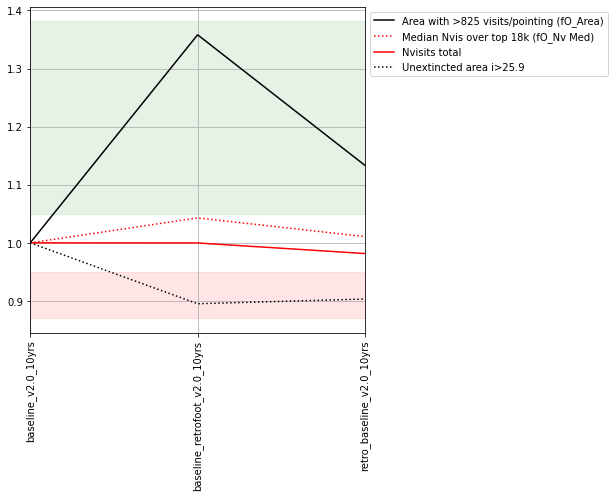

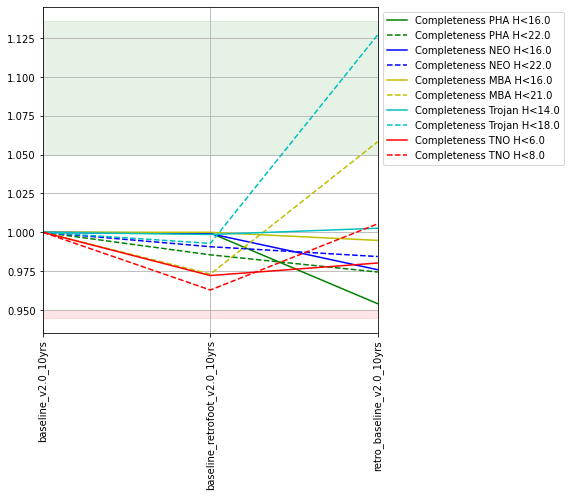

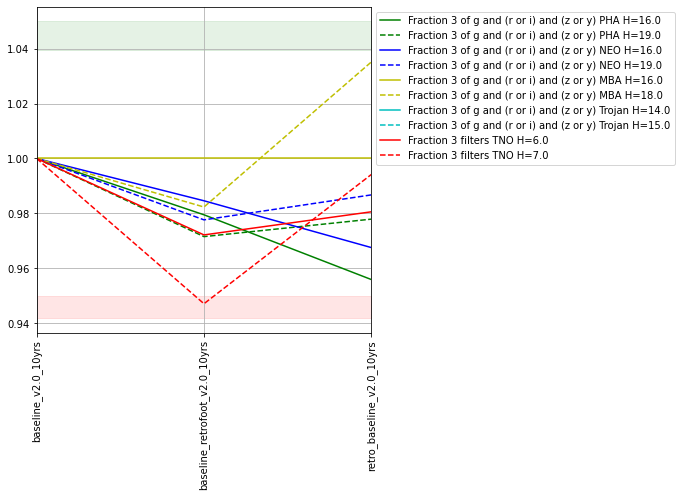

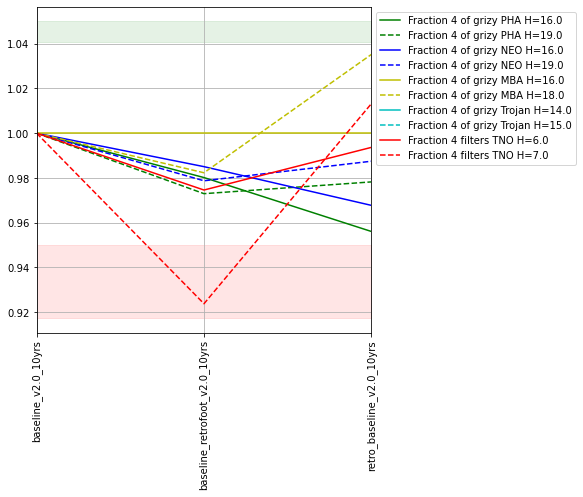

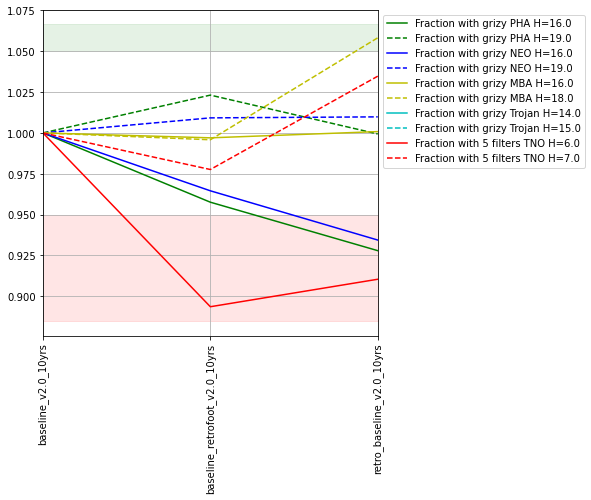

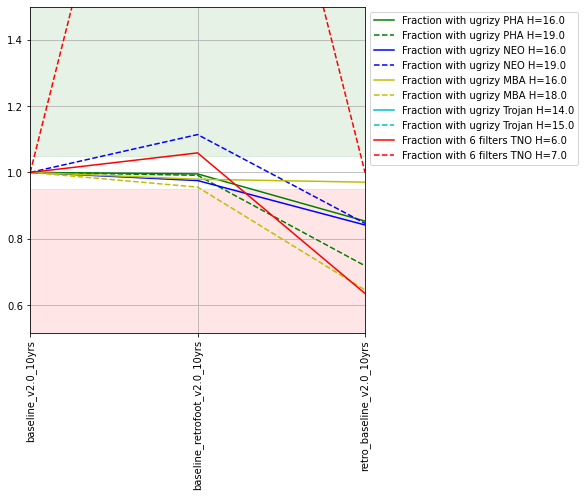

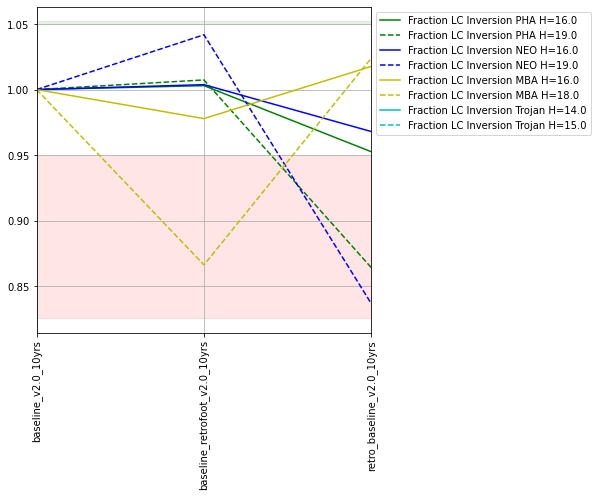

In [164]:
fam = ['baseline', 'retro']
describe_family(fam)
for mset in sso_metrics:
    d = sso_family(fam, mset)
    IPython.display.display(d)

**vary_nes** : These simulations investigate the effect of varying the amount of survey time spent on covering the North Ecliptic Spur area. The baseline characteristics, including the ratio of visits over the remainder of the footprint, are kept the same. 

Area with >825 visits/pointing (fO_Area)  \
run                                                                         
baseline_v2.0_10yrs                                          12893.228978   
vary_nes_nesfrac0.01_v2.0_10yrs                              17534.522836   
vary_nes_nesfrac0.05_v2.0_10yrs                              17223.144893   
vary_nes_nesfrac0.10_v2.0_10yrs                              16779.158555   
vary_nes_nesfrac0.15_v2.0_10yrs                              16146.331147   
vary_nes_nesfrac0.20_v2.0_10yrs                              15380.056048   
vary_nes_nesfrac0.25_v2.0_10yrs                              14228.545167   
vary_nes_nesfrac0.30_v2.0_10yrs                              12893.228978   
vary_nes_nesfrac0.35_v2.0_10yrs                              11059.372363   
vary_nes_nesfrac0.40_v2.0_10yrs                               9061.014194   
vary_nes_nesfrac0.45_v2.0_10yrs                               7089.513421   
vary_nes_nesfrac0.50_v2.0_10yrs                               5425.194123   
vary_nes_nesfrac0.55_v2.0_10yrs                               4007.627156   
vary_nes_nesfrac0.75_v2.0_10yrs                               2155.306081   
vary_nes_nesfrac1.00_v2.0_10yrs                               5678.660803   

                                 Unextincted area i>25.9  Nvisits total  \
run                                                                       
baseline_v2.0_10yrs                         16711.175770      2086980.0   
vary_nes_nesfrac0.01_v2.0_10yrs             16896.659665      2087392.0   
vary_nes_nesfrac0.05_v2.0_10yrs             16868.962975      2087572.0   
vary_nes_nesfrac0.10_v2.0_10yrs             16769.087031      2087761.0   
vary_nes_nesfrac0.15_v2.0_10yrs             16760.694095      2087741.0   
vary_nes_nesfrac0.20_v2.0_10yrs             16815.248182      2087462.0   
vary_nes_nesfrac0.25_v2.0_10yrs             16691.032722      2087377.0   
vary_nes_nesfrac0.30_v2.0_10yrs             16711.175770      2086980.0   
vary_nes_nesfrac0.35_v2.0_10yrs             16583.603136      2087488.0   
vary_nes_nesfrac0.40_v2.0_10yrs             16561.781501      2087857.0   
vary_nes_nesfrac0.45_v2.0_10yrs             16518.138231      2087796.0   
vary_nes_nesfrac0.50_v2.0_10yrs             16487.923660      2087928.0   
vary_nes_nesfrac0.55_v2.0_10yrs             16366.226082      2087662.0   
vary_nes_nesfrac0.75_v2.0_10yrs             16101.848583      2088056.0   
vary_nes_nesfrac1.00_v2.0_10yrs             15719.969975      2089159.0   

                                 Median Nvis over top 18k (fO_Nv Med)  \
run                                                                     
baseline_v2.0_10yrs                                             839.0   
vary_nes_nesfrac0.01_v2.0_10yrs                                 869.0   
vary_nes_nesfrac0.05_v2.0_10yrs                                 865.0   
vary_nes_nesfrac0.10_v2.0_10yrs                                 861.0   
vary_nes_nesfrac0.15_v2.0_10yrs                                 856.0   
vary_nes_nesfrac0.20_v2.0_10yrs                                 851.0   
vary_nes_nesfrac0.25_v2.0_10yrs                                 845.0   
vary_nes_nesfrac0.30_v2.0_10yrs                                 839.0   
vary_nes_nesfrac0.35_v2.0_10yrs                                 832.0   
vary_nes_nesfrac0.40_v2.0_10yrs                                 825.0   
vary_nes_nesfrac0.45_v2.0_10yrs                                 817.0   
vary_nes_nesfrac0.50_v2.0_10yrs                                 811.0   
vary_nes_nesfrac0.55_v2.0_10yrs                                 804.0   
vary_nes_nesfrac0.75_v2.0_10yrs                                 777.0   
vary_nes_nesfrac1.00_v2.0_10yrs                                 727.0   

                                 Median Nvis u band  Median Nvis g band  \
run                                                                       
baseline_v2.0_10yrs                            54.0    

short_name                       Completeness PHA H<16.0  \
run                                                        
baseline_v2.0_10yrs                               0.9404   
vary_nes_nesfrac0.01_v2.0_10yrs                   0.9102   
vary_nes_nesfrac0.05_v2.0_10yrs                   0.9146   
vary_nes_nesfrac0.10_v2.0_10yrs                   0.9166   
vary_nes_nesfrac0.15_v2.0_10yrs                   0.9110   
vary_nes_nesfrac0.20_v2.0_10yrs                   0.9276   
vary_nes_nesfrac0.25_v2.0_10yrs                   0.9148   
vary_nes_nesfrac0.30_v2.0_10yrs                   0.9190   
vary_nes_nesfrac0.35_v2.0_10yrs                   0.9164   
vary_nes_nesfrac0.40_v2.0_10yrs                   0.9200   
vary_nes_nesfrac0.45_v2.0_10yrs                   0.9244   
vary_nes_nesfrac0.50_v2.0_10yrs                   0.9316   
vary_nes_nesfrac0.55_v2.0_10yrs                   0.9254   
vary_nes_nesfrac0.75_v2.0_10yrs                   0.9290   
vary_nes_nesfrac1.00_v2.0_10yrs                   0.9358   

short_name                       Completeness PHA H<22.0  \
run                                                        
baseline_v2.0_10yrs                             0.589618   
vary_nes_nesfrac0.01_v2.0_10yrs                 0.569388   
vary_nes_nesfrac0.05_v2.0_10yrs                 0.567903   
vary_nes_nesfrac0.10_v2.0_10yrs                 0.564124   
vary_nes_nesfrac0.15_v2.0_10yrs                 0.567502   
vary_nes_nesfrac0.20_v2.0_10yrs                 0.578472   
vary_nes_nesfrac0.25_v2.0_10yrs                 0.565582   
vary_nes_nesfrac0.30_v2.0_10yrs                 0.574674   
vary_nes_nesfrac0.35_v2.0_10yrs                 0.573699   
vary_nes_nesfrac0.40_v2.0_10yrs                 0.572362   
vary_nes_nesfrac0.45_v2.0_10yrs                 0.581243   
vary_nes_nesfrac0.50_v2.0_10yrs                 0.582434   
vary_nes_nesfrac0.55_v2.0_10yrs                 0.584142   
vary_nes_nesfrac0.75_v2.0_10yrs                 0.592900   
vary_nes_nesfrac1.00_v2.0_10yrs                 0.606997   

short_name                       Completeness NEO H<16.0  \
run                                                        
baseline_v2.0_10yrs                               0.9138   
vary_nes_nesfrac0.01_v2.0_10yrs                   0.8992   
vary_nes_nesfrac0.05_v2.0_10yrs                   0.9062   
vary_nes_nesfrac0.10_v2.0_10yrs                   0.9008   
vary_nes_nesfrac0.15_v2.0_10yrs                   0.9028   
vary_nes_nesfrac0.20_v2.0_10yrs                   0.9168   
vary_nes_nesfrac0.25_v2.0_10yrs                   0.9078   
vary_nes_nesfrac0.30_v2.0_10yrs                   0.9146   
vary_nes_nesfrac0.35_v2.0_10yrs                   0.9104   
vary_nes_nesfrac0.40_v2.0_10yrs                   0.9146   
vary_nes_nesfrac0.45_v2.0_10yrs                   0.9164   
vary_nes_nesfrac0.50_v2.0_10yrs                   0.9148   
vary_nes_nesfrac0.55_v2.0_10yrs                   0.9198   
vary_nes_nesfrac0.75_v2.0_10yrs                   0.9112   
vary_nes_nesfrac1.00_v2.0_10yrs                   0.9166   

short_name                       Completeness NEO H<22.0  \
run                                                        
baseline_v2.0_10yrs                             0.565072   
vary_nes_nesfrac0.01_v2.0_10yrs                 0.558290   
vary_nes_nesfrac0.05_v2.0_10yrs                 0.557995   
vary_nes_nesfrac0.10_v2.0_10yrs                 0.554479   
vary_nes_nesfrac0.15_v2.0_10yrs                 0.557353   
vary_nes_nesfrac0.20_v2.0_10yrs                 0.565302   
vary_nes_nesfrac0.25_v2.0_10yrs                 0.559678   
vary_nes_nesfrac0.30_v2.0_10yrs                 0.566011   
vary_nes_nesfrac0.35_v2.0_10yrs                 0.562090   
vary_nes_nesfrac0.40_v2.0_10yrs                 0.563854   
vary_nes_nesfrac0.45_v2.0_10yrs                 0.566683   
vary_nes_nesfrac0.50_v2.0_10yrs                 0.567779   
vary_nes_nesfrac0.55_v2.0_10yrs                 0.572526   
vary_nes_nesfrac0.75_v2.0_10yrs      

short_name                       Fraction 3 of g and (r or i) and (z or y) PHA H=16.0  \
run                                                                                     
baseline_v2.0_10yrs                                                         0.8468      
vary_nes_nesfrac0.01_v2.0_10yrs                                             0.8128      
vary_nes_nesfrac0.05_v2.0_10yrs                                             0.8174      
vary_nes_nesfrac0.10_v2.0_10yrs                                             0.8228      
vary_nes_nesfrac0.15_v2.0_10yrs                                             0.8332      
vary_nes_nesfrac0.20_v2.0_10yrs                                             0.8378      
vary_nes_nesfrac0.25_v2.0_10yrs                                             0.8412      
vary_nes_nesfrac0.30_v2.0_10yrs                                             0.8468      
vary_nes_nesfrac0.35_v2.0_10yrs                                             0.8504      
vary_nes_nesfrac0.40_v2.0_10yrs                                             0.8498      
vary_nes_nesfrac0.45_v2.0_10yrs                                             0.8552      
vary_nes_nesfrac0.50_v2.0_10yrs                                             0.8550      
vary_nes_nesfrac0.55_v2.0_10yrs                                             0.8574      
vary_nes_nesfrac0.75_v2.0_10yrs                                             0.8660      
vary_nes_nesfrac1.00_v2.0_10yrs                                             0.8702      

short_name                       Fraction 3 of g and (r or i) and (z or y) PHA H=19.0  \
run                                                                                     
baseline_v2.0_10yrs                                                         0.5332      
vary_nes_nesfrac0.01_v2.0_10yrs                                             0.5070      
vary_nes_nesfrac0.05_v2.0_10yrs                                             0.5068      
vary_nes_nesfrac0.10_v2.0_10yrs                                             0.5106      
vary_nes_nesfrac0.15_v2.0_10yrs                                             0.5242      
vary_nes_nesfrac0.20_v2.0_10yrs                                             0.5238      
vary_nes_nesfrac0.25_v2.0_10yrs                                             0.5272      
vary_nes_nesfrac0.30_v2.0_10yrs                                             0.5332      
vary_nes_nesfrac0.35_v2.0_10yrs                                             0.5338      
vary_nes_nesfrac0.40_v2.0_10yrs                                             0.5374      
vary_nes_nesfrac0.45_v2.0_10yrs                                             0.5408      
vary_nes_nesfrac0.50_v2.0_10yrs                                             0.5408      
vary_nes_nesfrac0.55_v2.0_10yrs                                             0.5514      
vary_nes_nesfrac0.75_v2.0_10yrs                                             0.5678      
vary_nes_nesfrac1.00_v2.0_10yrs                                             0.5700      

short_name                       Fraction 3 of g and (r or i) and (z or y) NEO H=16.0  \
run                                                                                     
baseline_v2.0_10yrs                                                         0.8552      
vary_nes_nesfrac0.01_v2.0_10yrs                                             0.8362      
vary_nes_nesfrac0.05_v2.0_10yrs                                             0.8372      
vary_nes_nesfrac0.10_v2.0_10yrs                                             0.8452      
vary_nes_nesfrac0.15_v2.0_10yrs                                             0.8458      
vary_nes_nesfrac0.20_v2.0_10yrs                                             0.8498      
vary_nes_nesfrac0.25_v2.0_10yrs                                             0.8538      
vary_nes_nesfrac0.30_v2.0_10yrs                                             0.8552      
vary_nes_nesfrac0.35_v2.0_10yrs                                             0.8558

short_name                       Fraction 4 of grizy PHA H=16.0  \
run                                                               
baseline_v2.0_10yrs                                      0.8462   
vary_nes_nesfrac0.01_v2.0_10yrs                          0.8124   
vary_nes_nesfrac0.05_v2.0_10yrs                          0.8168   
vary_nes_nesfrac0.10_v2.0_10yrs                          0.8208   
vary_nes_nesfrac0.15_v2.0_10yrs                          0.8328   
vary_nes_nesfrac0.20_v2.0_10yrs                          0.8374   
vary_nes_nesfrac0.25_v2.0_10yrs                          0.8412   
vary_nes_nesfrac0.30_v2.0_10yrs                          0.8462   
vary_nes_nesfrac0.35_v2.0_10yrs                          0.8504   
vary_nes_nesfrac0.40_v2.0_10yrs                          0.8494   
vary_nes_nesfrac0.45_v2.0_10yrs                          0.8552   
vary_nes_nesfrac0.50_v2.0_10yrs                          0.8546   
vary_nes_nesfrac0.55_v2.0_10yrs                          0.8572   
vary_nes_nesfrac0.75_v2.0_10yrs                          0.8660   
vary_nes_nesfrac1.00_v2.0_10yrs                          0.8700   

short_name                       Fraction 4 of grizy PHA H=19.0  \
run                                                               
baseline_v2.0_10yrs                                      0.5322   
vary_nes_nesfrac0.01_v2.0_10yrs                          0.5064   
vary_nes_nesfrac0.05_v2.0_10yrs                          0.5056   
vary_nes_nesfrac0.10_v2.0_10yrs                          0.5094   
vary_nes_nesfrac0.15_v2.0_10yrs                          0.5236   
vary_nes_nesfrac0.20_v2.0_10yrs                          0.5234   
vary_nes_nesfrac0.25_v2.0_10yrs                          0.5264   
vary_nes_nesfrac0.30_v2.0_10yrs                          0.5322   
vary_nes_nesfrac0.35_v2.0_10yrs                          0.5336   
vary_nes_nesfrac0.40_v2.0_10yrs                          0.5370   
vary_nes_nesfrac0.45_v2.0_10yrs                          0.5404   
vary_nes_nesfrac0.50_v2.0_10yrs                          0.5402   
vary_nes_nesfrac0.55_v2.0_10yrs                          0.5510   
vary_nes_nesfrac0.75_v2.0_10yrs                          0.5672   
vary_nes_nesfrac1.00_v2.0_10yrs                          0.5696   

short_name                       Fraction 4 of grizy NEO H=16.0  \
run                                                               
baseline_v2.0_10yrs                                      0.8548   
vary_nes_nesfrac0.01_v2.0_10yrs                          0.8356   
vary_nes_nesfrac0.05_v2.0_10yrs                          0.8366   
vary_nes_nesfrac0.10_v2.0_10yrs                          0.8446   
vary_nes_nesfrac0.15_v2.0_10yrs                          0.8454   
vary_nes_nesfrac0.20_v2.0_10yrs                          0.8494   
vary_nes_nesfrac0.25_v2.0_10yrs                          0.8536   
vary_nes_nesfrac0.30_v2.0_10yrs                          0.8548   
vary_nes_nesfrac0.35_v2.0_10yrs                          0.8558   
vary_nes_nesfrac0.40_v2.0_10yrs                          0.8578   
vary_nes_nesfrac0.45_v2.0_10yrs                          0.8618   
vary_nes_nesfrac0.50_v2.0_10yrs                          0.8620   
vary_nes_nesfrac0.55_v2.0_10yrs                          0.8654   
vary_nes_nesfrac0.75_v2.0_10yrs                          0.8716   
vary_nes_nesfrac1.00_v2.0_10yrs                          0.8760   

short_name                       Fraction 4 of grizy NEO H=19.0  \
run                                                               
baseline_v2.0_10yrs                                      0.5260   
vary_nes_nesfrac0.01_v2.0_10yrs                          0.5218   
vary_nes_nesfrac0.05_v2.0_10yrs                          0.5150   
vary_nes_nesfrac0.10_v2.0_10yrs                          0.5252   
vary_nes_nesfrac0.15_v2.0_10yrs                          0.5202   
vary_nes_nesfrac0.20_v2.0_10yrs                          0.5262   
vary_nes_nesfrac0.25_v2.0_10yrs             

short_name                       Fraction with grizy PHA H=16.0  \
run                                                               
baseline_v2.0_10yrs                                      0.7216   
vary_nes_nesfrac0.01_v2.0_10yrs                          0.6982   
vary_nes_nesfrac0.05_v2.0_10yrs                          0.7068   
vary_nes_nesfrac0.10_v2.0_10yrs                          0.7126   
vary_nes_nesfrac0.15_v2.0_10yrs                          0.7156   
vary_nes_nesfrac0.20_v2.0_10yrs                          0.7202   
vary_nes_nesfrac0.25_v2.0_10yrs                          0.7172   
vary_nes_nesfrac0.30_v2.0_10yrs                          0.7216   
vary_nes_nesfrac0.35_v2.0_10yrs                          0.7300   
vary_nes_nesfrac0.40_v2.0_10yrs                          0.7262   
vary_nes_nesfrac0.45_v2.0_10yrs                          0.7312   
vary_nes_nesfrac0.50_v2.0_10yrs                          0.7284   
vary_nes_nesfrac0.55_v2.0_10yrs                          0.7326   
vary_nes_nesfrac0.75_v2.0_10yrs                          0.7406   
vary_nes_nesfrac1.00_v2.0_10yrs                          0.7334   

short_name                       Fraction with grizy PHA H=19.0  \
run                                                               
baseline_v2.0_10yrs                                      0.3112   
vary_nes_nesfrac0.01_v2.0_10yrs                          0.3058   
vary_nes_nesfrac0.05_v2.0_10yrs                          0.3080   
vary_nes_nesfrac0.10_v2.0_10yrs                          0.3088   
vary_nes_nesfrac0.15_v2.0_10yrs                          0.3138   
vary_nes_nesfrac0.20_v2.0_10yrs                          0.3178   
vary_nes_nesfrac0.25_v2.0_10yrs                          0.3124   
vary_nes_nesfrac0.30_v2.0_10yrs                          0.3112   
vary_nes_nesfrac0.35_v2.0_10yrs                          0.3192   
vary_nes_nesfrac0.40_v2.0_10yrs                          0.3088   
vary_nes_nesfrac0.45_v2.0_10yrs                          0.3154   
vary_nes_nesfrac0.50_v2.0_10yrs                          0.3114   
vary_nes_nesfrac0.55_v2.0_10yrs                          0.3114   
vary_nes_nesfrac0.75_v2.0_10yrs                          0.3118   
vary_nes_nesfrac1.00_v2.0_10yrs                          0.2936   

short_name                       Fraction with grizy NEO H=16.0  \
run                                                               
baseline_v2.0_10yrs                                      0.7564   
vary_nes_nesfrac0.01_v2.0_10yrs                          0.7310   
vary_nes_nesfrac0.05_v2.0_10yrs                          0.7410   
vary_nes_nesfrac0.10_v2.0_10yrs                          0.7414   
vary_nes_nesfrac0.15_v2.0_10yrs                          0.7498   
vary_nes_nesfrac0.20_v2.0_10yrs                          0.7532   
vary_nes_nesfrac0.25_v2.0_10yrs                          0.7482   
vary_nes_nesfrac0.30_v2.0_10yrs                          0.7564   
vary_nes_nesfrac0.35_v2.0_10yrs                          0.7508   
vary_nes_nesfrac0.40_v2.0_10yrs                          0.7524   
vary_nes_nesfrac0.45_v2.0_10yrs                          0.7634   
vary_nes_nesfrac0.50_v2.0_10yrs                          0.7646   
vary_nes_nesfrac0.55_v2.0_10yrs                          0.7624   
vary_nes_nesfrac0.75_v2.0_10yrs                          0.7730   
vary_nes_nesfrac1.00_v2.0_10yrs                          0.7714   

short_name                       Fraction with grizy NEO H=19.0  \
run                                                               
baseline_v2.0_10yrs                                      0.3258   
vary_nes_nesfrac0.01_v2.0_10yrs                          0.3206   
vary_nes_nesfrac0.05_v2.0_10yrs                          0.3296   
vary_nes_nesfrac0.10_v2.0_10yrs                          0.3286   
vary_nes_nesfrac0.15_v2.0_10yrs                          0.3248   
vary_nes_nesfrac0.20_v2.0_10yrs                          0.3290   
vary_nes_nesfrac0.25_v2.0_10yrs             

short_name                       Fraction with ugrizy PHA H=16.0  \
run                                                                
baseline_v2.0_10yrs                                       0.4458   
vary_nes_nesfrac0.01_v2.0_10yrs                           0.4656   
vary_nes_nesfrac0.05_v2.0_10yrs                           0.4570   
vary_nes_nesfrac0.10_v2.0_10yrs                           0.4544   
vary_nes_nesfrac0.15_v2.0_10yrs                           0.4572   
vary_nes_nesfrac0.20_v2.0_10yrs                           0.4556   
vary_nes_nesfrac0.25_v2.0_10yrs                           0.4450   
vary_nes_nesfrac0.30_v2.0_10yrs                           0.4458   
vary_nes_nesfrac0.35_v2.0_10yrs                           0.4458   
vary_nes_nesfrac0.40_v2.0_10yrs                           0.4426   
vary_nes_nesfrac0.45_v2.0_10yrs                           0.4444   
vary_nes_nesfrac0.50_v2.0_10yrs                           0.4296   
vary_nes_nesfrac0.55_v2.0_10yrs                           0.4298   
vary_nes_nesfrac0.75_v2.0_10yrs                           0.4130   
vary_nes_nesfrac1.00_v2.0_10yrs                           0.3770   

short_name                       Fraction with ugrizy PHA H=19.0  \
run                                                                
baseline_v2.0_10yrs                                       0.0462   
vary_nes_nesfrac0.01_v2.0_10yrs                           0.0494   
vary_nes_nesfrac0.05_v2.0_10yrs                           0.0472   
vary_nes_nesfrac0.10_v2.0_10yrs                           0.0516   
vary_nes_nesfrac0.15_v2.0_10yrs                           0.0500   
vary_nes_nesfrac0.20_v2.0_10yrs                           0.0492   
vary_nes_nesfrac0.25_v2.0_10yrs                           0.0518   
vary_nes_nesfrac0.30_v2.0_10yrs                           0.0462   
vary_nes_nesfrac0.35_v2.0_10yrs                           0.0460   
vary_nes_nesfrac0.40_v2.0_10yrs                           0.0452   
vary_nes_nesfrac0.45_v2.0_10yrs                           0.0476   
vary_nes_nesfrac0.50_v2.0_10yrs                           0.0424   
vary_nes_nesfrac0.55_v2.0_10yrs                           0.0424   
vary_nes_nesfrac0.75_v2.0_10yrs                           0.0404   
vary_nes_nesfrac1.00_v2.0_10yrs                           0.0326   

short_name                       Fraction with ugrizy NEO H=16.0  \
run                                                                
baseline_v2.0_10yrs                                       0.4648   
vary_nes_nesfrac0.01_v2.0_10yrs                           0.4820   
vary_nes_nesfrac0.05_v2.0_10yrs                           0.4786   
vary_nes_nesfrac0.10_v2.0_10yrs                           0.4794   
vary_nes_nesfrac0.15_v2.0_10yrs                           0.4722   
vary_nes_nesfrac0.20_v2.0_10yrs                           0.4682   
vary_nes_nesfrac0.25_v2.0_10yrs                           0.4678   
vary_nes_nesfrac0.30_v2.0_10yrs                           0.4648   
vary_nes_nesfrac0.35_v2.0_10yrs                           0.4588   
vary_nes_nesfrac0.40_v2.0_10yrs                           0.4614   
vary_nes_nesfrac0.45_v2.0_10yrs                           0.4538   
vary_nes_nesfrac0.50_v2.0_10yrs                           0.4560   
vary_nes_nesfrac0.55_v2.0_10yrs                           0.4412   
vary_nes_nesfrac0.75_v2.0_10yrs                           0.4298   
vary_nes_nesfrac1.00_v2.0_10yrs                           0.3816   

short_name                       Fraction with ugrizy NEO H=19.0  \
run                                                                
baseline_v2.0_10yrs                                       0.0456   
vary_nes_nesfrac0.01_v2.0_10yrs                           0.0508   
vary_nes_nesfrac0.05_v2.0_10yrs                           0.0506   
vary_nes_nesfrac0.10_v2.0_10yrs                           0.0488   
vary_nes_nesfrac0.15_v2.0_10yrs                           0.0484   
vary_nes_nesfrac0.20_v2.0_10yrs                      

short_name                       Fraction LC Inversion PHA H=16.0  \
run                                                                 
baseline_v2.0_10yrs                                        0.4674   
vary_nes_nesfrac0.01_v2.0_10yrs                            0.4318   
vary_nes_nesfrac0.05_v2.0_10yrs                            0.4366   
vary_nes_nesfrac0.10_v2.0_10yrs                            0.4412   
vary_nes_nesfrac0.15_v2.0_10yrs                            0.4448   
vary_nes_nesfrac0.20_v2.0_10yrs                            0.4480   
vary_nes_nesfrac0.25_v2.0_10yrs                            0.4618   
vary_nes_nesfrac0.30_v2.0_10yrs                            0.4674   
vary_nes_nesfrac0.35_v2.0_10yrs                            0.4764   
vary_nes_nesfrac0.40_v2.0_10yrs                            0.4888   
vary_nes_nesfrac0.45_v2.0_10yrs                            0.5018   
vary_nes_nesfrac0.50_v2.0_10yrs                            0.5088   
vary_nes_nesfrac0.55_v2.0_10yrs                            0.5156   
vary_nes_nesfrac0.75_v2.0_10yrs                            0.5356   
vary_nes_nesfrac1.00_v2.0_10yrs                            0.5616   

short_name                       Fraction LC Inversion PHA H=19.0  \
run                                                                 
baseline_v2.0_10yrs                                        0.0544   
vary_nes_nesfrac0.01_v2.0_10yrs                            0.0534   
vary_nes_nesfrac0.05_v2.0_10yrs                            0.0538   
vary_nes_nesfrac0.10_v2.0_10yrs                            0.0534   
vary_nes_nesfrac0.15_v2.0_10yrs                            0.0524   
vary_nes_nesfrac0.20_v2.0_10yrs                            0.0504   
vary_nes_nesfrac0.25_v2.0_10yrs                            0.0550   
vary_nes_nesfrac0.30_v2.0_10yrs                            0.0544   
vary_nes_nesfrac0.35_v2.0_10yrs                            0.0532   
vary_nes_nesfrac0.40_v2.0_10yrs                            0.0572   
vary_nes_nesfrac0.45_v2.0_10yrs                            0.0574   
vary_nes_nesfrac0.50_v2.0_10yrs                            0.0550   
vary_nes_nesfrac0.55_v2.0_10yrs                            0.0552   
vary_nes_nesfrac0.75_v2.0_10yrs                            0.0592   
vary_nes_nesfrac1.00_v2.0_10yrs                            0.0864   

short_name                       Fraction LC Inversion NEO H=16.0  \
run                                                                 
baseline_v2.0_10yrs                                        0.4804   
vary_nes_nesfrac0.01_v2.0_10yrs                            0.4536   
vary_nes_nesfrac0.05_v2.0_10yrs                            0.4624   
vary_nes_nesfrac0.10_v2.0_10yrs                            0.4640   
vary_nes_nesfrac0.15_v2.0_10yrs                            0.4594   
vary_nes_nesfrac0.20_v2.0_10yrs                            0.4748   
vary_nes_nesfrac0.25_v2.0_10yrs                            0.4746   
vary_nes_nesfrac0.30_v2.0_10yrs                            0.4804   
vary_nes_nesfrac0.35_v2.0_10yrs                            0.4906   
vary_nes_nesfrac0.40_v2.0_10yrs                            0.5008   
vary_nes_nesfrac0.45_v2.0_10yrs                            0.5044   
vary_nes_nesfrac0.50_v2.0_10yrs                            0.5098   
vary_nes_nesfrac0.55_v2.0_10yrs                            0.5158   
vary_nes_nesfrac0.75_v2.0_10yrs                            0.5344   
vary_nes_nesfrac1.00_v2.0_10yrs                            0.5588   

short_name                       Fraction LC Inversion NEO H=19.0  \
run                                                                 
baseline_v2.0_10yrs                                        0.0526   
vary_nes_nesfrac0.01_v2.0_10yrs                            0.0506   
vary_nes_nesfrac0.05_v2.0_10yrs                            0.0532   
vary_nes_nesfrac0.10_v2.0_10yrs                            0.0532   
vary_nes_nesfrac0.15_v2.0_10yrs                            0.052

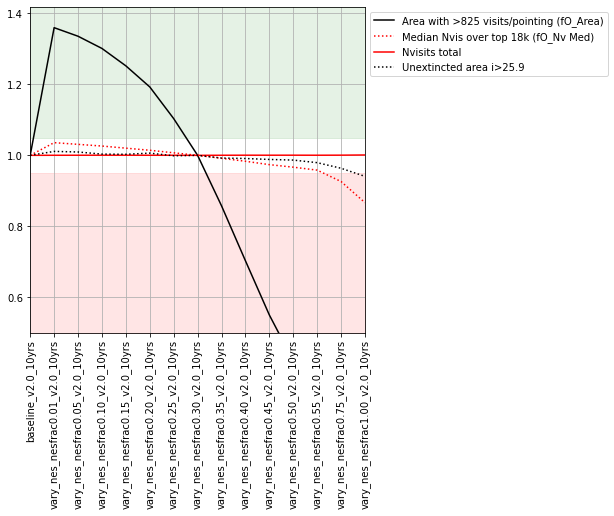

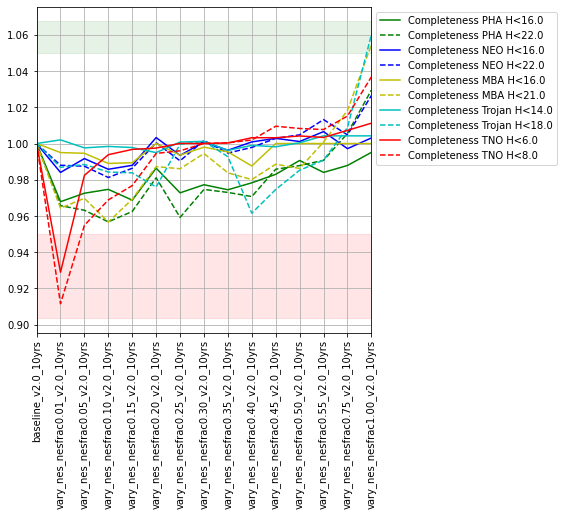

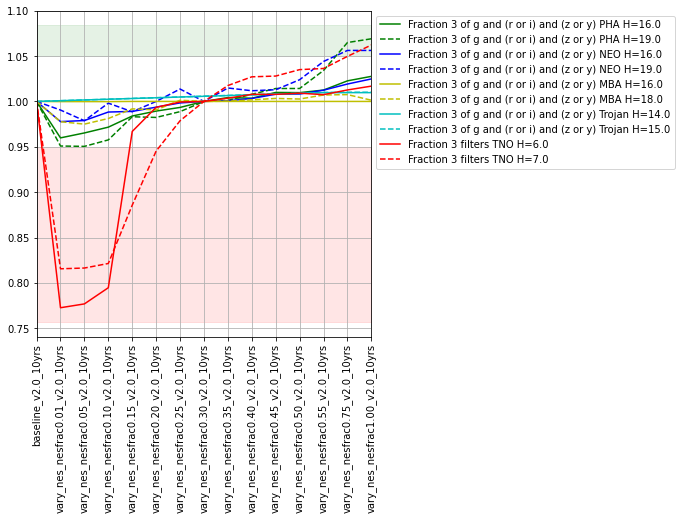

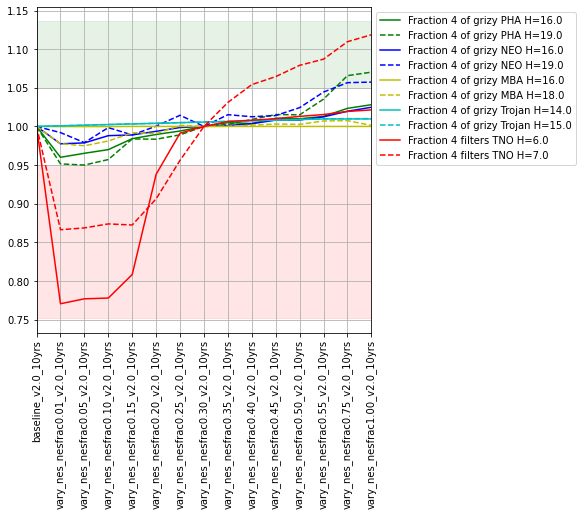

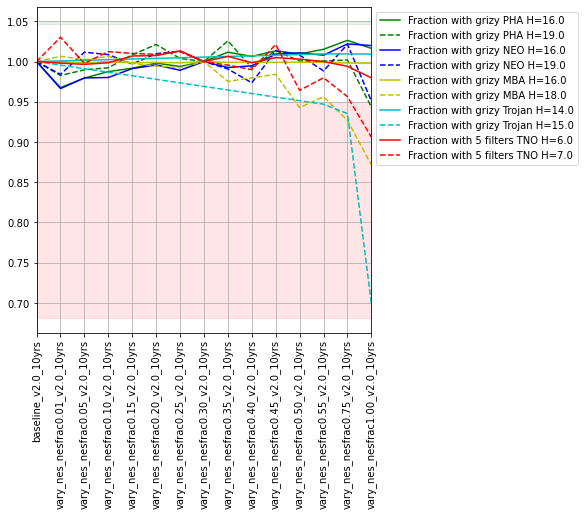

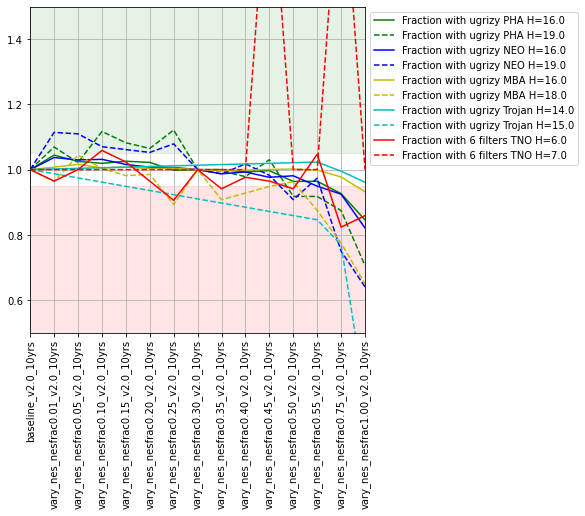

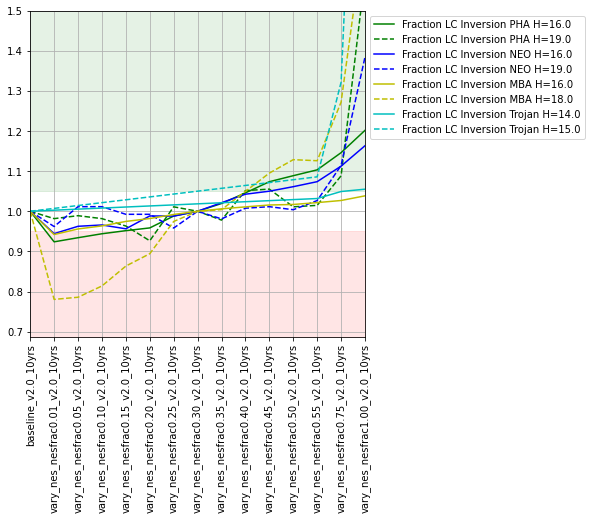

In [165]:
fam = ['vary_nes']
describe_family(fam)
for mset in sso_metrics:
    d = sso_family(fam, mset)
    IPython.display.display(d)

['rolling', 'rolling_bulge', 'rolling_bulge_6', 'rolling_six', 'rolling_early', 'rolling_all_sky']


**rolling** : The updated baseline contains a 2-band rolling cadence with strength ~90% in the dust-free WFD. These simulations extend upon and modify this rolling cadence in the dust-free WFD including using 3 regions instead of 2, and adding variable weight ("strength") to the level of rolling.

**rolling_bulge** : The updated baseline contains a 2-band rolling cadence with strength ~90% in the dust-free WFD. These simulations add a rolling cadence in the WFD-level area of the galactic plane. The rolling in the bulge is implemented in 2-regions, with varying weights (or strengths).

**rolling_bulge_6** : The updated baseline contains a 2-band rolling cadence with strength ~90% in the dust-free WFD. This simulation add a 6-region rolling cadence to the galactic bulge WFD-level area in addition.

**rolling_six** : The updated baseline contains a 2-band rolling cadence with strength ~90% in the dust-free WFD. These simulations modify this rolling cadence in the dust-free WFD to use 6 regions instead of 2, with variable weight ("strength") to the level of rolling.

**rolling_early** : The updated baseline contains a 2-band rolling cadence with strength ~90% in the dust-free WFD. In the baseline, rolling cadence starts at year 1.5 and ends at 8.5, so that each rolling "season" is an entire season length. This simulation modifies the timing, so that rolling starts at the end of year 1 and ends at year 9. The time available for rolling is longer, although may be split; the time available for all-sky surveying for astrometric purposes is maintained. Data releases may be potentially more uniform (TBD).

**rolling_all_sky** : The updated baseline contains a 2-band rolling cadence with strength ~90% in the dust-free WFD. This simulations adds a 2-region rolling cadence on all parts of the sky, including all parts of the galactic plane, the northern ecliptic spur, and the south celestial pole.

Area with >825 visits/pointing (fO_Area)  \
run                                                                              
baseline_v2.0_10yrs                                               12893.228978   
rolling_ns2_rw0.5_v2.0_10yrs                                      12614.583488   
rolling_ns3_rw0.5_v2.0_10yrs                                      12729.566717   
rolling_ns2_rw0.9_v2.0_10yrs                                      12893.228978   
rolling_ns3_rw0.9_v2.0_10yrs                                      13255.803832   
rolling_bulge_ns2_rw0.5_v2.0_10yrs                                12600.315496   
rolling_bulge_ns2_rw0.8_v2.0_10yrs                                12733.763185   
rolling_bulge_ns2_rw0.9_v2.0_10yrs                                12940.229422   
rolling_bulge_6_v2.0_10yrs                                        12492.885909   
six_rolling_ns6_rw0.5_v2.0_10yrs                                  12342.652346   
six_rolling_ns6_rw0.9_v2.0_10yrs                                  12735.441772   
roll_early_v2.0_10yrs                                             12999.819271   
rolling_all_sky_ns2_rw0.9_v2.0_10yrs                              12900.782621   

                                      Unextincted area i>25.9  Nvisits total  \
run                                                                            
baseline_v2.0_10yrs                              16711.175770      2086980.0   
rolling_ns2_rw0.5_v2.0_10yrs                     16807.694539      2084510.0   
rolling_ns3_rw0.5_v2.0_10yrs                     16873.159443      2085499.0   
rolling_ns2_rw0.9_v2.0_10yrs                     16711.175770      2086980.0   
rolling_ns3_rw0.9_v2.0_10yrs                     16568.495850      2090909.0   
rolling_bulge_ns2_rw0.5_v2.0_10yrs               16868.962975      2084413.0   
rolling_bulge_ns2_rw0.8_v2.0_10yrs               16664.175326      2086550.0   
rolling_bulge_ns2_rw0.9_v2.0_10yrs               16706.140008      2087907.0   
rolling_bulge_6_v2.0_10yrs                       16606.264064      2085745.0   
six_rolling_ns6_rw0.5_v2.0_10yrs                 16665.014619      2084148.0   
six_rolling_ns6_rw0.9_v2.0_10yrs                 16336.011510      2089610.0   
roll_early_v2.0_10yrs                            16536.602692      2088889.0   
rolling_all_sky_ns2_rw0.9_v2.0_10yrs             16599.549715      2088105.0   

                                      Median Nvis over top 18k (fO_Nv Med)  \
run                                                                          
baseline_v2.0_10yrs                                                  839.0   
rolling_ns2_rw0.5_v2.0_10yrs                                         838.0   
rolling_ns3_rw0.5_v2.0_10yrs                                         838.0   
rolling_ns2_rw0.9_v2.0_10yrs                                         839.0   
rolling_ns3_rw0.9_v2.0_10yrs                                         841.0   
rolling_bulge_ns2_rw0.5_v2.0_10yrs                                   838.0   
rolling_bulge_ns2_rw0.8_v2.0_10yrs                                   838.0   
rolling_bulge_ns2_rw0.9_v2.0_10yrs                                   840.0   
rolling_bulge_6_v2.0_10yrs                                           838.0   
six_rolling_ns6_rw0.5_v2.0_10yrs                                     837.0   
six_rolling_ns6_rw0.9_v2.0_10yrs                                     841.0   
roll_early_v2.0_10yrs                                                840.0   
rolling_all_sky_ns2_rw0.9_v2.0_10yrs                                 839.0   

                                      Median Nvis u band  Median Nvis g band  \
run                                                                            
baseline_v2.0_10yrs                                 54.0                70.0   
rolling_ns2_rw0.5_v2.0_10yrs                        54.0                69.0   
rolling_ns3_rw0.5_v2.0_10yrs                        54.0                70.0   
rolling_ns2_rw0.9_v2.0_10yrs       

short_name                            Completeness PHA H<16.0  \
run                                                             
baseline_v2.0_10yrs                                    0.9404   
rolling_ns2_rw0.5_v2.0_10yrs                           0.9116   
rolling_ns3_rw0.5_v2.0_10yrs                           0.9180   
rolling_ns2_rw0.9_v2.0_10yrs                           0.9178   
rolling_ns3_rw0.9_v2.0_10yrs                           0.9242   
rolling_bulge_ns2_rw0.5_v2.0_10yrs                     0.9166   
rolling_bulge_ns2_rw0.8_v2.0_10yrs                     0.9196   
rolling_bulge_ns2_rw0.9_v2.0_10yrs                     0.9254   
rolling_bulge_6_v2.0_10yrs                             0.9272   
six_rolling_ns6_rw0.5_v2.0_10yrs                       0.9164   
six_rolling_ns6_rw0.9_v2.0_10yrs                       0.9250   
roll_early_v2.0_10yrs                                  0.9268   
rolling_all_sky_ns2_rw0.9_v2.0_10yrs                   0.9272   

short_name                            Completeness PHA H<22.0  \
run                                                             
baseline_v2.0_10yrs                                  0.589618   
rolling_ns2_rw0.5_v2.0_10yrs                         0.574203   
rolling_ns3_rw0.5_v2.0_10yrs                         0.575223   
rolling_ns2_rw0.9_v2.0_10yrs                         0.573627   
rolling_ns3_rw0.9_v2.0_10yrs                         0.567986   
rolling_bulge_ns2_rw0.5_v2.0_10yrs                   0.581411   
rolling_bulge_ns2_rw0.8_v2.0_10yrs                   0.573749   
rolling_bulge_ns2_rw0.9_v2.0_10yrs                   0.576378   
rolling_bulge_6_v2.0_10yrs                           0.571644   
six_rolling_ns6_rw0.5_v2.0_10yrs                     0.560699   
six_rolling_ns6_rw0.9_v2.0_10yrs                     0.536456   
roll_early_v2.0_10yrs                                0.581784   
rolling_all_sky_ns2_rw0.9_v2.0_10yrs                 0.580304   

short_name                            Completeness NEO H<16.0  \
run                                                             
baseline_v2.0_10yrs                                    0.9138   
rolling_ns2_rw0.5_v2.0_10yrs                           0.9094   
rolling_ns3_rw0.5_v2.0_10yrs                           0.9040   
rolling_ns2_rw0.9_v2.0_10yrs                           0.9136   
rolling_ns3_rw0.9_v2.0_10yrs                           0.9116   
rolling_bulge_ns2_rw0.5_v2.0_10yrs                     0.9078   
rolling_bulge_ns2_rw0.8_v2.0_10yrs                     0.9092   
rolling_bulge_ns2_rw0.9_v2.0_10yrs                     0.9140   
rolling_bulge_6_v2.0_10yrs                             0.9116   
six_rolling_ns6_rw0.5_v2.0_10yrs                       0.8998   
six_rolling_ns6_rw0.9_v2.0_10yrs                       0.9148   
roll_early_v2.0_10yrs                                  0.9160   
rolling_all_sky_ns2_rw0.9_v2.0_10yrs                   0.9114   

short_name                            Completeness NEO H<22.0  \
run                                                             
baseline_v2.0_10yrs                                  0.565072   
rolling_ns2_rw0.5_v2.0_10yrs                         0.562540   
rolling_ns3_rw0.5_v2.0_10yrs                         0.563599   
rolling_ns2_rw0.9_v2.0_10yrs                         0.563888   
rolling_ns3_rw0.9_v2.0_10yrs                         0.554720   
rolling_bulge_ns2_rw0.5_v2.0_10yrs                   0.567118   
rolling_bulge_ns2_rw0.8_v2.0_10yrs                   0.561981   
rolling_bulge_ns2_rw0.9_v2.0_10yrs                   0.563505   
rolling_bulge_6_v2.0_10yrs                           0.559971   
six_rolling_ns6_rw0.5_v2.0_10yrs                     0.544361   
six_rolling_ns6_rw0.9_v2.0_10yrs                     0.528154   
roll_early_v2.0_10yrs                                0.563088   
rolling_all_sky_ns2_rw0.9_v2.0_10yrs                 0.560360   

short_name                            Completeness MBA H<16.0  \
run                            

short_name                            Fraction 3 of g and (r or i) and (z or y) PHA H=16.0  \
run                                                                                          
baseline_v2.0_10yrs                                                              0.8468      
rolling_ns2_rw0.5_v2.0_10yrs                                                     0.8474      
rolling_ns3_rw0.5_v2.0_10yrs                                                     0.8450      
rolling_ns2_rw0.9_v2.0_10yrs                                                     0.8468      
rolling_ns3_rw0.9_v2.0_10yrs                                                     0.8460      
rolling_bulge_ns2_rw0.5_v2.0_10yrs                                               0.8454      
rolling_bulge_ns2_rw0.8_v2.0_10yrs                                               0.8426      
rolling_bulge_ns2_rw0.9_v2.0_10yrs                                               0.8446      
rolling_bulge_6_v2.0_10yrs                                                       0.8514      
six_rolling_ns6_rw0.5_v2.0_10yrs                                                 0.8396      
six_rolling_ns6_rw0.9_v2.0_10yrs                                                 0.8346      
roll_early_v2.0_10yrs                                                            0.8486      
rolling_all_sky_ns2_rw0.9_v2.0_10yrs                                             0.8456      

short_name                            Fraction 3 of g and (r or i) and (z or y) PHA H=19.0  \
run                                                                                          
baseline_v2.0_10yrs                                                              0.5332      
rolling_ns2_rw0.5_v2.0_10yrs                                                     0.5402      
rolling_ns3_rw0.5_v2.0_10yrs                                                     0.5396      
rolling_ns2_rw0.9_v2.0_10yrs                                                     0.5332      
rolling_ns3_rw0.9_v2.0_10yrs                                                     0.5188      
rolling_bulge_ns2_rw0.5_v2.0_10yrs                                               0.5340      
rolling_bulge_ns2_rw0.8_v2.0_10yrs                                               0.5302      
rolling_bulge_ns2_rw0.9_v2.0_10yrs                                               0.5268      
rolling_bulge_6_v2.0_10yrs                                                       0.5308      
six_rolling_ns6_rw0.5_v2.0_10yrs                                                 0.5168      
six_rolling_ns6_rw0.9_v2.0_10yrs                                                 0.4900      
roll_early_v2.0_10yrs                                                            0.5338      
rolling_all_sky_ns2_rw0.9_v2.0_10yrs                                             0.5274      

short_name                            Fraction 3 of g and (r or i) and (z or y) NEO H=16.0  \
run                                                                                          
baseline_v2.0_10yrs                                                              0.8552      
rolling_ns2_rw0.5_v2.0_10yrs                                                     0.8558      
rolling_ns3_rw0.5_v2.0_10yrs                                                     0.8548      
rolling_ns2_rw0.9_v2.0_10yrs                                                     0.8552      
rolling_ns3_rw0.9_v2.0_10yrs                                                     0.8510      
rolling_bulge_ns2_rw0.5_v2.0_10yrs                                               0.8564      
rolling_bulge_ns2_rw0.8_v2.0_10yrs                                               0.8546      
rolling_bulge_ns2_rw0.9_v2.0_10yrs                                               0.8568      
rolling_bulge_6_v2.0_10yrs                                                       0.8584      
six_rolling_ns6_rw0.5_v2.0_10yrs                                                 0.8482      
six_rolling_ns6_rw0.9_v2.0_10yrs                  

short_name                            Fraction 4 of grizy PHA H=16.0  \
run                                                                    
baseline_v2.0_10yrs                                           0.8462   
rolling_ns2_rw0.5_v2.0_10yrs                                  0.8466   
rolling_ns3_rw0.5_v2.0_10yrs                                  0.8446   
rolling_ns2_rw0.9_v2.0_10yrs                                  0.8462   
rolling_ns3_rw0.9_v2.0_10yrs                                  0.8452   
rolling_bulge_ns2_rw0.5_v2.0_10yrs                            0.8454   
rolling_bulge_ns2_rw0.8_v2.0_10yrs                            0.8422   
rolling_bulge_ns2_rw0.9_v2.0_10yrs                            0.8444   
rolling_bulge_6_v2.0_10yrs                                    0.8510   
six_rolling_ns6_rw0.5_v2.0_10yrs                              0.8392   
six_rolling_ns6_rw0.9_v2.0_10yrs                              0.8338   
roll_early_v2.0_10yrs                                         0.8482   
rolling_all_sky_ns2_rw0.9_v2.0_10yrs                          0.8456   

short_name                            Fraction 4 of grizy PHA H=19.0  \
run                                                                    
baseline_v2.0_10yrs                                           0.5322   
rolling_ns2_rw0.5_v2.0_10yrs                                  0.5398   
rolling_ns3_rw0.5_v2.0_10yrs                                  0.5396   
rolling_ns2_rw0.9_v2.0_10yrs                                  0.5322   
rolling_ns3_rw0.9_v2.0_10yrs                                  0.5182   
rolling_bulge_ns2_rw0.5_v2.0_10yrs                            0.5338   
rolling_bulge_ns2_rw0.8_v2.0_10yrs                            0.5298   
rolling_bulge_ns2_rw0.9_v2.0_10yrs                            0.5262   
rolling_bulge_6_v2.0_10yrs                                    0.5298   
six_rolling_ns6_rw0.5_v2.0_10yrs                              0.5162   
six_rolling_ns6_rw0.9_v2.0_10yrs                              0.4892   
roll_early_v2.0_10yrs                                         0.5336   
rolling_all_sky_ns2_rw0.9_v2.0_10yrs                          0.5270   

short_name                            Fraction 4 of grizy NEO H=16.0  \
run                                                                    
baseline_v2.0_10yrs                                           0.8548   
rolling_ns2_rw0.5_v2.0_10yrs                                  0.8552   
rolling_ns3_rw0.5_v2.0_10yrs                                  0.8548   
rolling_ns2_rw0.9_v2.0_10yrs                                  0.8548   
rolling_ns3_rw0.9_v2.0_10yrs                                  0.8504   
rolling_bulge_ns2_rw0.5_v2.0_10yrs                            0.8564   
rolling_bulge_ns2_rw0.8_v2.0_10yrs                            0.8542   
rolling_bulge_ns2_rw0.9_v2.0_10yrs                            0.8568   
rolling_bulge_6_v2.0_10yrs                                    0.8582   
six_rolling_ns6_rw0.5_v2.0_10yrs                              0.8480   
six_rolling_ns6_rw0.9_v2.0_10yrs                              0.8408   
roll_early_v2.0_10yrs                                         0.8586   
rolling_all_sky_ns2_rw0.9_v2.0_10yrs                          0.8558   

short_name                            Fraction 4 of grizy NEO H=19.0  \
run                                                                    
baseline_v2.0_10yrs                                           0.5260   
rolling_ns2_rw0.5_v2.0_10yrs                                  0.5316   
rolling_ns3_rw0.5_v2.0_10yrs                                  0.5308   
rolling_ns2_rw0.9_v2.0_10yrs                                  0.5260   
rolling_ns3_rw0.9_v2.0_10yrs                                  0.5190   
rolling_bulge_ns2_rw0.5_v2.0_10yrs                            0.5336   
rolling_bulge_ns2_rw0.8_v2.0_10yrs                            0.5268   
rolling_bulge_ns2_rw0.9_v2.0_10yrs                            0.5328   
rolling_bulge_6_v2.0_10yrs           

short_name                            Fraction with grizy PHA H=16.0  \
run                                                                    
baseline_v2.0_10yrs                                           0.7216   
rolling_ns2_rw0.5_v2.0_10yrs                                  0.7272   
rolling_ns3_rw0.5_v2.0_10yrs                                  0.7162   
rolling_ns2_rw0.9_v2.0_10yrs                                  0.7216   
rolling_ns3_rw0.9_v2.0_10yrs                                  0.7198   
rolling_bulge_ns2_rw0.5_v2.0_10yrs                            0.7244   
rolling_bulge_ns2_rw0.8_v2.0_10yrs                            0.7200   
rolling_bulge_ns2_rw0.9_v2.0_10yrs                            0.7286   
rolling_bulge_6_v2.0_10yrs                                    0.7326   
six_rolling_ns6_rw0.5_v2.0_10yrs                              0.7150   
six_rolling_ns6_rw0.9_v2.0_10yrs                              0.6964   
roll_early_v2.0_10yrs                                         0.7234   
rolling_all_sky_ns2_rw0.9_v2.0_10yrs                          0.7230   

short_name                            Fraction with grizy PHA H=19.0  \
run                                                                    
baseline_v2.0_10yrs                                           0.3112   
rolling_ns2_rw0.5_v2.0_10yrs                                  0.3198   
rolling_ns3_rw0.5_v2.0_10yrs                                  0.3116   
rolling_ns2_rw0.9_v2.0_10yrs                                  0.3112   
rolling_ns3_rw0.9_v2.0_10yrs                                  0.3074   
rolling_bulge_ns2_rw0.5_v2.0_10yrs                            0.3126   
rolling_bulge_ns2_rw0.8_v2.0_10yrs                            0.3082   
rolling_bulge_ns2_rw0.9_v2.0_10yrs                            0.3158   
rolling_bulge_6_v2.0_10yrs                                    0.3180   
six_rolling_ns6_rw0.5_v2.0_10yrs                              0.3068   
six_rolling_ns6_rw0.9_v2.0_10yrs                              0.2836   
roll_early_v2.0_10yrs                                         0.3200   
rolling_all_sky_ns2_rw0.9_v2.0_10yrs                          0.3114   

short_name                            Fraction with grizy NEO H=16.0  \
run                                                                    
baseline_v2.0_10yrs                                           0.7564   
rolling_ns2_rw0.5_v2.0_10yrs                                  0.7524   
rolling_ns3_rw0.5_v2.0_10yrs                                  0.7464   
rolling_ns2_rw0.9_v2.0_10yrs                                  0.7564   
rolling_ns3_rw0.9_v2.0_10yrs                                  0.7514   
rolling_bulge_ns2_rw0.5_v2.0_10yrs                            0.7520   
rolling_bulge_ns2_rw0.8_v2.0_10yrs                            0.7522   
rolling_bulge_ns2_rw0.9_v2.0_10yrs                            0.7540   
rolling_bulge_6_v2.0_10yrs                                    0.7604   
six_rolling_ns6_rw0.5_v2.0_10yrs                              0.7412   
six_rolling_ns6_rw0.9_v2.0_10yrs                              0.7250   
roll_early_v2.0_10yrs                                         0.7512   
rolling_all_sky_ns2_rw0.9_v2.0_10yrs                          0.7516   

short_name                            Fraction with grizy NEO H=19.0  \
run                                                                    
baseline_v2.0_10yrs                                           0.3258   
rolling_ns2_rw0.5_v2.0_10yrs                                  0.3240   
rolling_ns3_rw0.5_v2.0_10yrs                                  0.3244   
rolling_ns2_rw0.9_v2.0_10yrs                                  0.3258   
rolling_ns3_rw0.9_v2.0_10yrs                                  0.3246   
rolling_bulge_ns2_rw0.5_v2.0_10yrs                            0.3272   
rolling_bulge_ns2_rw0.8_v2.0_10yrs                            0.3200   
rolling_bulge_ns2_rw0.9_v2.0_10yrs                            0.3276   
rolling_bulge_6_v2.0_10yrs           

short_name                            Fraction with ugrizy PHA H=16.0  \
run                                                                     
baseline_v2.0_10yrs                                            0.4458   
rolling_ns2_rw0.5_v2.0_10yrs                                   0.4494   
rolling_ns3_rw0.5_v2.0_10yrs                                   0.4526   
rolling_ns2_rw0.9_v2.0_10yrs                                   0.4458   
rolling_ns3_rw0.9_v2.0_10yrs                                   0.4566   
rolling_bulge_ns2_rw0.5_v2.0_10yrs                             0.4398   
rolling_bulge_ns2_rw0.8_v2.0_10yrs                             0.4534   
rolling_bulge_ns2_rw0.9_v2.0_10yrs                             0.4516   
rolling_bulge_6_v2.0_10yrs                                     0.4678   
six_rolling_ns6_rw0.5_v2.0_10yrs                               0.4424   
six_rolling_ns6_rw0.9_v2.0_10yrs                               0.4350   
roll_early_v2.0_10yrs                                          0.4560   
rolling_all_sky_ns2_rw0.9_v2.0_10yrs                           0.4508   

short_name                            Fraction with ugrizy PHA H=19.0  \
run                                                                     
baseline_v2.0_10yrs                                            0.0462   
rolling_ns2_rw0.5_v2.0_10yrs                                   0.0496   
rolling_ns3_rw0.5_v2.0_10yrs                                   0.0478   
rolling_ns2_rw0.9_v2.0_10yrs                                   0.0462   
rolling_ns3_rw0.9_v2.0_10yrs                                   0.0458   
rolling_bulge_ns2_rw0.5_v2.0_10yrs                             0.0480   
rolling_bulge_ns2_rw0.8_v2.0_10yrs                             0.0478   
rolling_bulge_ns2_rw0.9_v2.0_10yrs                             0.0472   
rolling_bulge_6_v2.0_10yrs                                     0.0464   
six_rolling_ns6_rw0.5_v2.0_10yrs                               0.0494   
six_rolling_ns6_rw0.9_v2.0_10yrs                               0.0536   
roll_early_v2.0_10yrs                                          0.0452   
rolling_all_sky_ns2_rw0.9_v2.0_10yrs                           0.0478   

short_name                            Fraction with ugrizy NEO H=16.0  \
run                                                                     
baseline_v2.0_10yrs                                            0.4648   
rolling_ns2_rw0.5_v2.0_10yrs                                   0.4648   
rolling_ns3_rw0.5_v2.0_10yrs                                   0.4704   
rolling_ns2_rw0.9_v2.0_10yrs                                   0.4648   
rolling_ns3_rw0.9_v2.0_10yrs                                   0.4766   
rolling_bulge_ns2_rw0.5_v2.0_10yrs                             0.4570   
rolling_bulge_ns2_rw0.8_v2.0_10yrs                             0.4652   
rolling_bulge_ns2_rw0.9_v2.0_10yrs                             0.4682   
rolling_bulge_6_v2.0_10yrs                                     0.4830   
six_rolling_ns6_rw0.5_v2.0_10yrs                               0.4660   
six_rolling_ns6_rw0.9_v2.0_10yrs                               0.4566   
roll_early_v2.0_10yrs                                          0.4680   
rolling_all_sky_ns2_rw0.9_v2.0_10yrs                           0.4650   

short_name                            Fraction with ugrizy NEO H=19.0  \
run                                                                     
baseline_v2.0_10yrs                                            0.0456   
rolling_ns2_rw0.5_v2.0_10yrs                                   0.0472   
rolling_ns3_rw0.5_v2.0_10yrs                                   0.0476   
rolling_ns2_rw0.9_v2.0_10yrs                                   0.0456   
rolling_ns3_rw0.9_v2.0_10yrs                                   0.0492   
rolling_bulge_ns2_rw0.5_v2.0_10yrs                             0.0486   
rolling_bulge_ns2_rw0.8_v2.0_10yrs                             0.0468   
rolling_bulge_ns2_rw0.9_v2.0_10yrs                     

short_name                            Fraction LC Inversion PHA H=16.0  \
run                                                                      
baseline_v2.0_10yrs                                             0.4674   
rolling_ns2_rw0.5_v2.0_10yrs                                    0.4674   
rolling_ns3_rw0.5_v2.0_10yrs                                    0.4668   
rolling_ns2_rw0.9_v2.0_10yrs                                    0.4674   
rolling_ns3_rw0.9_v2.0_10yrs                                    0.4612   
rolling_bulge_ns2_rw0.5_v2.0_10yrs                              0.4712   
rolling_bulge_ns2_rw0.8_v2.0_10yrs                              0.4670   
rolling_bulge_ns2_rw0.9_v2.0_10yrs                              0.4686   
rolling_bulge_6_v2.0_10yrs                                      0.4638   
six_rolling_ns6_rw0.5_v2.0_10yrs                                0.4526   
six_rolling_ns6_rw0.9_v2.0_10yrs                                0.4180   
roll_early_v2.0_10yrs                                           0.4700   
rolling_all_sky_ns2_rw0.9_v2.0_10yrs                            0.4670   

short_name                            Fraction LC Inversion PHA H=19.0  \
run                                                                      
baseline_v2.0_10yrs                                             0.0544   
rolling_ns2_rw0.5_v2.0_10yrs                                    0.0498   
rolling_ns3_rw0.5_v2.0_10yrs                                    0.0516   
rolling_ns2_rw0.9_v2.0_10yrs                                    0.0544   
rolling_ns3_rw0.9_v2.0_10yrs                                    0.0530   
rolling_bulge_ns2_rw0.5_v2.0_10yrs                              0.0524   
rolling_bulge_ns2_rw0.8_v2.0_10yrs                              0.0532   
rolling_bulge_ns2_rw0.9_v2.0_10yrs                              0.0536   
rolling_bulge_6_v2.0_10yrs                                      0.0544   
six_rolling_ns6_rw0.5_v2.0_10yrs                                0.0564   
six_rolling_ns6_rw0.9_v2.0_10yrs                                0.0656   
roll_early_v2.0_10yrs                                           0.0576   
rolling_all_sky_ns2_rw0.9_v2.0_10yrs                            0.0508   

short_name                            Fraction LC Inversion NEO H=16.0  \
run                                                                      
baseline_v2.0_10yrs                                             0.4804   
rolling_ns2_rw0.5_v2.0_10yrs                                    0.4868   
rolling_ns3_rw0.5_v2.0_10yrs                                    0.4896   
rolling_ns2_rw0.9_v2.0_10yrs                                    0.4804   
rolling_ns3_rw0.9_v2.0_10yrs                                    0.4804   
rolling_bulge_ns2_rw0.5_v2.0_10yrs                              0.4892   
rolling_bulge_ns2_rw0.8_v2.0_10yrs                              0.4860   
rolling_bulge_ns2_rw0.9_v2.0_10yrs                              0.4842   
rolling_bulge_6_v2.0_10yrs                                      0.4884   
six_rolling_ns6_rw0.5_v2.0_10yrs                                0.4684   
six_rolling_ns6_rw0.9_v2.0_10yrs                                0.4324   
roll_early_v2.0_10yrs                                           0.4904   
rolling_all_sky_ns2_rw0.9_v2.0_10yrs                            0.4800   

short_name                            Fraction LC Inversion NEO H=19.0  \
run                                                                      
baseline_v2.0_10yrs                                             0.0526   
rolling_ns2_rw0.5_v2.0_10yrs                                    0.0516   
rolling_ns3_rw0.5_v2.0_10yrs                                    0.0502   
rolling_ns2_rw0.9_v2.0_10yrs                                    0.0526   
rolling_ns3_rw0.9_v2.0_10yrs                                    0.0528   
rolling_bulge_ns2_rw0.5_v2.0_10yrs                              0.0522   
rolling_bulge_ns2_rw0.8_v2.0_10yrs                              0.0510   
r

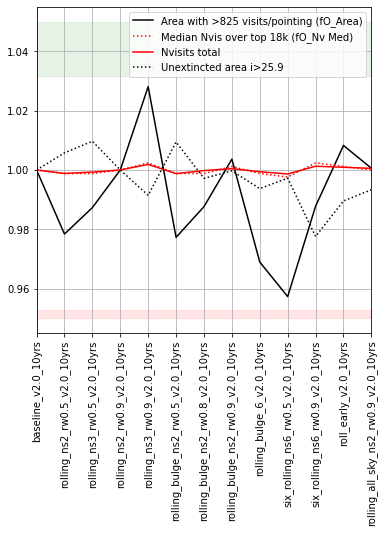

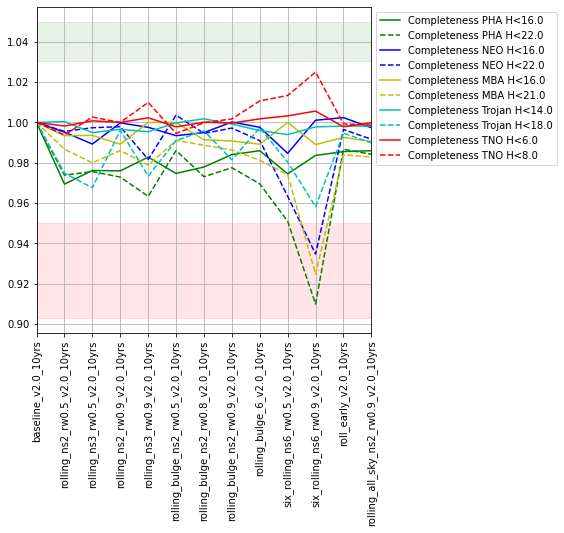

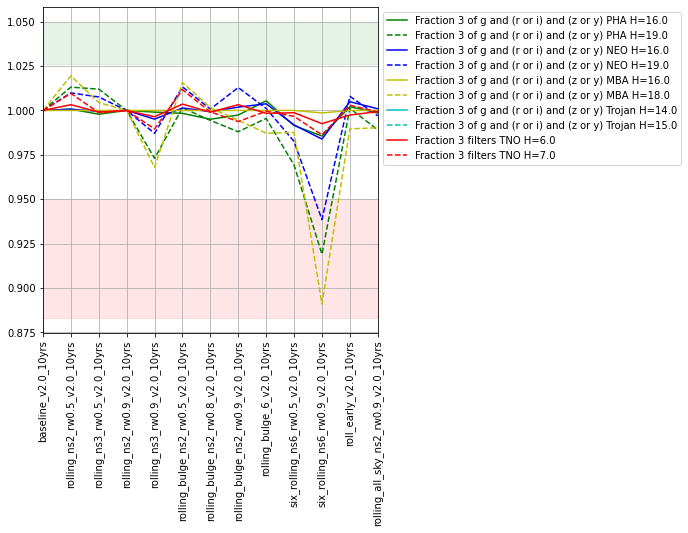

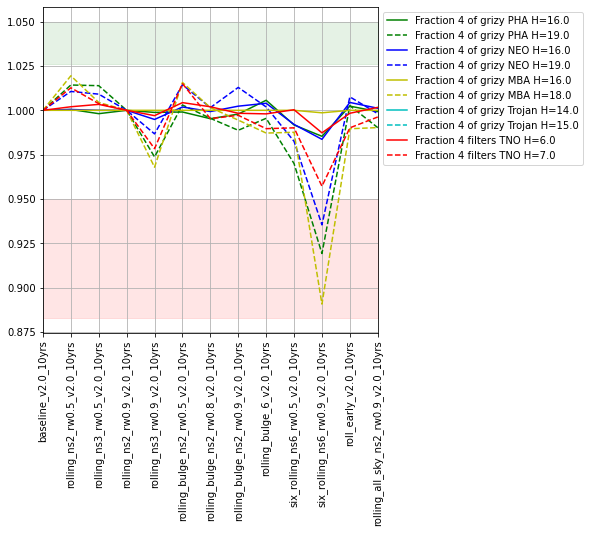

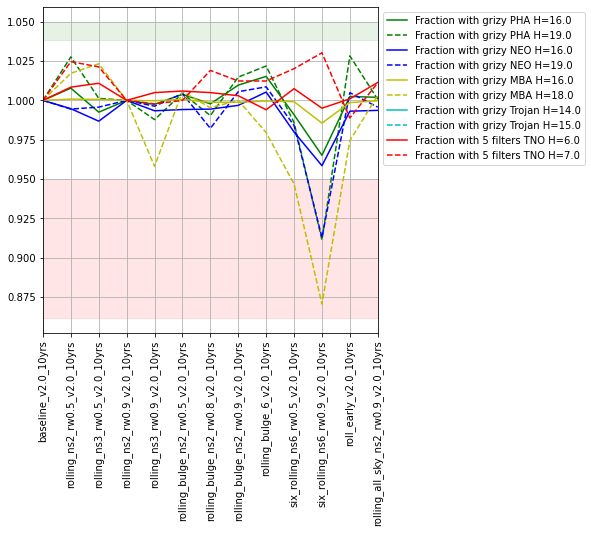

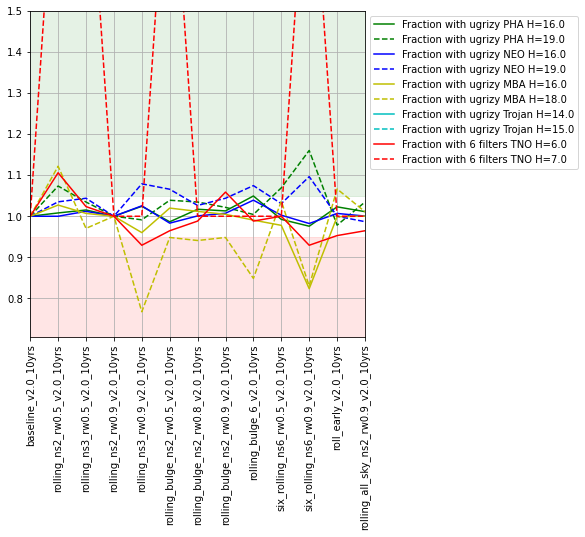

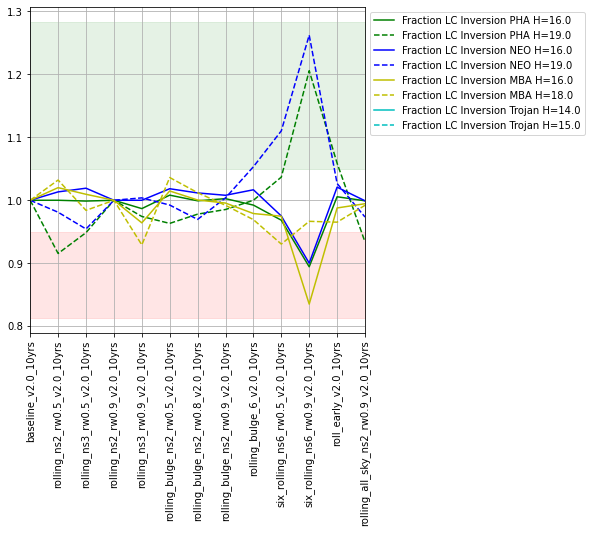

In [166]:
fam = [f for f in family_families.index if 'rolling' in f]
print(fam)
describe_family(fam)
for mset in sso_metrics:
    d = sso_family(fam, mset)
    IPython.display.display(d)

**presto_half** : The baseline survey strategy takes pairs of visits every few nights, where the pair is separated by about 33 minutes. The pairs are taken in mixed filters, for color measurements. These simulations investigate adding a third visit after a time period of between 1.5 to 4 hours. The triplet visit is in one of the same filters as the earlier pair. This set of simulations take triplets every other night, in the filter combinations described in their brief descriptions.

**presto** : The baseline survey strategy takes pairs of visits every few nights, where the pair is separated by about 33 minutes. The pairs are taken in mixed filters, for color measurements. These simulations investigate adding a third visit after a time period of between 1.5 to 4 hours. The triplet visit is in one of the same filters as the earlier pair. This set of simulations take triplets all the time, in the filter combinations described in their brief descriptions.

Area with >825 visits/pointing (fO_Area)  \
run                                                                           
baseline_v2.0_10yrs                                            12893.228978   
presto_half_gap1.5_v2.0_10yrs                                   7436.141697   
presto_half_gap2.0_v2.0_10yrs                                   9016.531631   
presto_half_gap2.5_v2.0_10yrs                                   8104.219438   
presto_half_gap3.0_v2.0_10yrs                                   8098.344383   
presto_half_gap3.5_v2.0_10yrs                                   8476.865817   
presto_half_gap4.0_v2.0_10yrs                                   8649.760308   
presto_half_gap1.5_mix_v2.0_10yrs                               7093.709889   
presto_half_gap2.0_mix_v2.0_10yrs                               8497.848158   
presto_half_gap2.5_mix_v2.0_10yrs                               7696.322727   
presto_half_gap3.0_mix_v2.0_10yrs                               7722.340830   
presto_half_gap3.5_mix_v2.0_10yrs                               7698.001314   
presto_half_gap4.0_mix_v2.0_10yrs                               8021.129367   
presto_gap1.5_v2.0_10yrs                                        2177.967009   
presto_gap2.0_v2.0_10yrs                                        3255.620050   
presto_gap2.5_v2.0_10yrs                                        2386.951127   
presto_gap3.0_v2.0_10yrs                                        2732.740109   
presto_gap3.5_v2.0_10yrs                                        3034.046527   
presto_gap4.0_v2.0_10yrs                                        3530.069072   
presto_gap1.5_mix_v2.0_10yrs                                    1400.781094   
presto_gap2.0_mix_v2.0_10yrs                                    2426.397928   
presto_gap2.5_mix_v2.0_10yrs                                    1822.106504   
presto_gap3.0_mix_v2.0_10yrs                                    2256.860612   
presto_gap3.5_mix_v2.0_10yrs                                    2491.023539   
presto_gap4.0_mix_v2.0_10yrs                                    2961.867274   

                                   Unextincted area i>25.9  Nvisits total  \
run                                                                         
baseline_v2.0_10yrs                           16711.175770      2086980.0   
presto_half_gap1.5_v2.0_10yrs                 14974.677218      2039120.0   
presto_half_gap2.0_v2.0_10yrs                 15079.588924      2052706.0   
presto_half_gap2.5_v2.0_10yrs                 15095.535503      2044849.0   
presto_half_gap3.0_v2.0_10yrs                 15230.661780      2044562.0   
presto_half_gap3.5_v2.0_10yrs                 15317.948319      2046991.0   
presto_half_gap4.0_v2.0_10yrs                 15407.752739      2049239.0   
presto_half_gap1.5_mix_v2.0_10yrs             16329.297161      2035981.0   
presto_half_gap2.0_mix_v2.0_10yrs             16212.635345      2048771.0   
presto_half_gap2.5_mix_v2.0_10yrs             16372.940431      2040752.0   
presto_half_gap3.0_mix_v2.0_10yrs             16278.100249      2040738.0   
presto_half_gap3.5_mix_v2.0_10yrs             16508.066708      2041673.0   
presto_half_gap4.0_mix_v2.0_10yrs             16507.227414      2043518.0   
presto_gap1.5_v2.0_10yrs                      12137.025403      1991926.0   
presto_gap2.0_v2.0_10yrs                      11658.628026      2004698.0   
presto_gap2.5_v2.0_10yrs                      12485.332266      1986054.0   
presto_gap3.0_v2.0_10yrs                      12722.013074      1986782.0   
presto_gap3.5_v2.0_10yrs                      12541.564940      1992713.0   
presto_gap4.0_v2.0_10yrs                      12735.441772      1998152.0   
presto_gap1.5_mix_v2.0_10yrs                  15687.237523      1977886.0   
presto_gap2.0_mix_v2.0_10yrs                  15796.345697      1995049.0   
presto_gap2.5_mix_v2.0_10yrs                  15860.132014      1978530.0   
presto_gap3.0_mix_v2.0_10yrs                  15829.9

short_name                         Completeness PHA H<16.0  \
run                                                          
baseline_v2.0_10yrs                                 0.9404   
presto_half_gap1.5_v2.0_10yrs                       0.9318   
presto_half_gap2.0_v2.0_10yrs                       0.9226   
presto_half_gap2.5_v2.0_10yrs                       0.9262   
presto_half_gap3.0_v2.0_10yrs                       0.9228   
presto_half_gap3.5_v2.0_10yrs                       0.9262   
presto_half_gap4.0_v2.0_10yrs                       0.9176   
presto_half_gap1.5_mix_v2.0_10yrs                   0.9232   
presto_half_gap2.0_mix_v2.0_10yrs                   0.9380   
presto_half_gap2.5_mix_v2.0_10yrs                   0.9224   
presto_half_gap3.0_mix_v2.0_10yrs                   0.9222   
presto_half_gap3.5_mix_v2.0_10yrs                   0.9232   
presto_half_gap4.0_mix_v2.0_10yrs                   0.9264   
presto_gap1.5_v2.0_10yrs                            0.9364   
presto_gap2.0_v2.0_10yrs                            0.9246   
presto_gap2.5_v2.0_10yrs                            0.9254   
presto_gap3.0_v2.0_10yrs                            0.9212   
presto_gap3.5_v2.0_10yrs                            0.9188   
presto_gap4.0_v2.0_10yrs                            0.9184   
presto_gap1.5_mix_v2.0_10yrs                        0.9418   
presto_gap2.0_mix_v2.0_10yrs                        0.9336   
presto_gap2.5_mix_v2.0_10yrs                        0.9230   
presto_gap3.0_mix_v2.0_10yrs                        0.9178   
presto_gap3.5_mix_v2.0_10yrs                        0.9232   
presto_gap4.0_mix_v2.0_10yrs                        0.9182   

short_name                         Completeness PHA H<22.0  \
run                                                          
baseline_v2.0_10yrs                               0.589618   
presto_half_gap1.5_v2.0_10yrs                     0.556691   
presto_half_gap2.0_v2.0_10yrs                     0.549876   
presto_half_gap2.5_v2.0_10yrs                     0.542112   
presto_half_gap3.0_v2.0_10yrs                     0.542418   
presto_half_gap3.5_v2.0_10yrs                     0.548695   
presto_half_gap4.0_v2.0_10yrs                     0.541690   
presto_half_gap1.5_mix_v2.0_10yrs                 0.548755   
presto_half_gap2.0_mix_v2.0_10yrs                 0.549201   
presto_half_gap2.5_mix_v2.0_10yrs                 0.535762   
presto_half_gap3.0_mix_v2.0_10yrs                 0.536461   
presto_half_gap3.5_mix_v2.0_10yrs                 0.537818   
presto_half_gap4.0_mix_v2.0_10yrs                 0.544289   
presto_gap1.5_v2.0_10yrs                          0.569504   
presto_gap2.0_v2.0_10yrs                          0.562682   
presto_gap2.5_v2.0_10yrs                          0.531064   
presto_gap3.0_v2.0_10yrs                          0.529773   
presto_gap3.5_v2.0_10yrs                          0.529343   
presto_gap4.0_v2.0_10yrs                          0.532239   
presto_gap1.5_mix_v2.0_10yrs                      0.556615   
presto_gap2.0_mix_v2.0_10yrs                      0.543684   
presto_gap2.5_mix_v2.0_10yrs                      0.519625   
presto_gap3.0_mix_v2.0_10yrs                      0.514922   
presto_gap3.5_mix_v2.0_10yrs                      0.522148   
presto_gap4.0_mix_v2.0_10yrs                      0.514793   

short_name                         Completeness NEO H<16.0  \
run                                                          
baseline_v2.0_10yrs                                 0.9138   
presto_half_gap1.5_v2.0_10yrs                       0.9176   
presto_half_gap2.0_v2.0_10yrs                       0.9168   
presto_half_gap2.5_v2.0_10yrs                       0.9176   
presto_half_gap3.0_v2.0_10yrs                       0.9102   
presto_half_gap3.5_v2.0_10yrs                       0.9050   
presto_half_gap4.0_v2.0_10yrs                       0.9170   
presto_half_gap1.5_mix_v2.0_10yrs                   0.9202   
presto_half_gap2.0_mix_v2.0_10

short_name                         Fraction 3 of g and (r or i) and (z or y) PHA H=16.0  \
run                                                                                       
baseline_v2.0_10yrs                                                           0.8468      
presto_half_gap1.5_v2.0_10yrs                                                 0.8566      
presto_half_gap2.0_v2.0_10yrs                                                 0.8526      
presto_half_gap2.5_v2.0_10yrs                                                 0.8484      
presto_half_gap3.0_v2.0_10yrs                                                 0.8444      
presto_half_gap3.5_v2.0_10yrs                                                 0.8434      
presto_half_gap4.0_v2.0_10yrs                                                 0.8404      
presto_half_gap1.5_mix_v2.0_10yrs                                             0.8580      
presto_half_gap2.0_mix_v2.0_10yrs                                             0.8510      
presto_half_gap2.5_mix_v2.0_10yrs                                             0.8472      
presto_half_gap3.0_mix_v2.0_10yrs                                             0.8448      
presto_half_gap3.5_mix_v2.0_10yrs                                             0.8404      
presto_half_gap4.0_mix_v2.0_10yrs                                             0.8416      
presto_gap1.5_v2.0_10yrs                                                      0.8568      
presto_gap2.0_v2.0_10yrs                                                      0.8390      
presto_gap2.5_v2.0_10yrs                                                      0.8294      
presto_gap3.0_v2.0_10yrs                                                      0.8230      
presto_gap3.5_v2.0_10yrs                                                      0.8222      
presto_gap4.0_v2.0_10yrs                                                      0.8180      
presto_gap1.5_mix_v2.0_10yrs                                                  0.8778      
presto_gap2.0_mix_v2.0_10yrs                                                  0.8618      
presto_gap2.5_mix_v2.0_10yrs                                                  0.8480      
presto_gap3.0_mix_v2.0_10yrs                                                  0.8394      
presto_gap3.5_mix_v2.0_10yrs                                                  0.8360      
presto_gap4.0_mix_v2.0_10yrs                                                  0.8288      

short_name                         Fraction 3 of g and (r or i) and (z or y) PHA H=19.0  \
run                                                                                       
baseline_v2.0_10yrs                                                           0.5332      
presto_half_gap1.5_v2.0_10yrs                                                 0.5250      
presto_half_gap2.0_v2.0_10yrs                                                 0.5182      
presto_half_gap2.5_v2.0_10yrs                                                 0.5160      
presto_half_gap3.0_v2.0_10yrs                                                 0.5154      
presto_half_gap3.5_v2.0_10yrs                                                 0.5172      
presto_half_gap4.0_v2.0_10yrs                                                 0.5118      
presto_half_gap1.5_mix_v2.0_10yrs                                             0.5266      
presto_half_gap2.0_mix_v2.0_10yrs                                             0.5220      
presto_half_gap2.5_mix_v2.0_10yrs                                             0.5156      
presto_half_gap3.0_mix_v2.0_10yrs                                             0.5144      
presto_half_gap3.5_mix_v2.0_10yrs                                             0.5186      
presto_half_gap4.0_mix_v2.0_10yrs                                             0.5154      
presto_gap1.5_v2.0_10yrs                                                      0.5156      
presto_gap2.0_v2.0_10yrs                                                      0.5110  

short_name                         Fraction 4 of grizy PHA H=16.0  \
run                                                                 
baseline_v2.0_10yrs                                        0.8462   
presto_half_gap1.5_v2.0_10yrs                              0.8562   
presto_half_gap2.0_v2.0_10yrs                              0.8524   
presto_half_gap2.5_v2.0_10yrs                              0.8480   
presto_half_gap3.0_v2.0_10yrs                              0.8442   
presto_half_gap3.5_v2.0_10yrs                              0.8426   
presto_half_gap4.0_v2.0_10yrs                              0.8400   
presto_half_gap1.5_mix_v2.0_10yrs                          0.8574   
presto_half_gap2.0_mix_v2.0_10yrs                          0.8508   
presto_half_gap2.5_mix_v2.0_10yrs                          0.8468   
presto_half_gap3.0_mix_v2.0_10yrs                          0.8442   
presto_half_gap3.5_mix_v2.0_10yrs                          0.8400   
presto_half_gap4.0_mix_v2.0_10yrs                          0.8408   
presto_gap1.5_v2.0_10yrs                                   0.8562   
presto_gap2.0_v2.0_10yrs                                   0.8382   
presto_gap2.5_v2.0_10yrs                                   0.8294   
presto_gap3.0_v2.0_10yrs                                   0.8226   
presto_gap3.5_v2.0_10yrs                                   0.8220   
presto_gap4.0_v2.0_10yrs                                   0.8172   
presto_gap1.5_mix_v2.0_10yrs                               0.8776   
presto_gap2.0_mix_v2.0_10yrs                               0.8614   
presto_gap2.5_mix_v2.0_10yrs                               0.8476   
presto_gap3.0_mix_v2.0_10yrs                               0.8394   
presto_gap3.5_mix_v2.0_10yrs                               0.8356   
presto_gap4.0_mix_v2.0_10yrs                               0.8284   

short_name                         Fraction 4 of grizy PHA H=19.0  \
run                                                                 
baseline_v2.0_10yrs                                        0.5322   
presto_half_gap1.5_v2.0_10yrs                              0.5246   
presto_half_gap2.0_v2.0_10yrs                              0.5178   
presto_half_gap2.5_v2.0_10yrs                              0.5154   
presto_half_gap3.0_v2.0_10yrs                              0.5146   
presto_half_gap3.5_v2.0_10yrs                              0.5162   
presto_half_gap4.0_v2.0_10yrs                              0.5112   
presto_half_gap1.5_mix_v2.0_10yrs                          0.5260   
presto_half_gap2.0_mix_v2.0_10yrs                          0.5214   
presto_half_gap2.5_mix_v2.0_10yrs                          0.5150   
presto_half_gap3.0_mix_v2.0_10yrs                          0.5136   
presto_half_gap3.5_mix_v2.0_10yrs                          0.5172   
presto_half_gap4.0_mix_v2.0_10yrs                          0.5140   
presto_gap1.5_v2.0_10yrs                                   0.5146   
presto_gap2.0_v2.0_10yrs                                   0.5108   
presto_gap2.5_v2.0_10yrs                                   0.4928   
presto_gap3.0_v2.0_10yrs                                   0.4948   
presto_gap3.5_v2.0_10yrs                                   0.4890   
presto_gap4.0_v2.0_10yrs                                   0.4856   
presto_gap1.5_mix_v2.0_10yrs                               0.5436   
presto_gap2.0_mix_v2.0_10yrs                               0.5316   
presto_gap2.5_mix_v2.0_10yrs                               0.5204   
presto_gap3.0_mix_v2.0_10yrs                               0.5104   
presto_gap3.5_mix_v2.0_10yrs                               0.5044   
presto_gap4.0_mix_v2.0_10yrs                               0.4980   

short_name                         Fraction 4 of grizy NEO H=16.0  \
run                                                                 
baseline_v2.0_10yrs                                        0.8548   
presto_half_gap1.5_v2.0_10yrs                              0.8678

short_name                         Fraction with grizy PHA H=16.0  \
run                                                                 
baseline_v2.0_10yrs                                        0.7216   
presto_half_gap1.5_v2.0_10yrs                              0.7318   
presto_half_gap2.0_v2.0_10yrs                              0.7222   
presto_half_gap2.5_v2.0_10yrs                              0.7194   
presto_half_gap3.0_v2.0_10yrs                              0.7166   
presto_half_gap3.5_v2.0_10yrs                              0.7176   
presto_half_gap4.0_v2.0_10yrs                              0.7138   
presto_half_gap1.5_mix_v2.0_10yrs                          0.7272   
presto_half_gap2.0_mix_v2.0_10yrs                          0.7196   
presto_half_gap2.5_mix_v2.0_10yrs                          0.7182   
presto_half_gap3.0_mix_v2.0_10yrs                          0.7120   
presto_half_gap3.5_mix_v2.0_10yrs                          0.7138   
presto_half_gap4.0_mix_v2.0_10yrs                          0.7122   
presto_gap1.5_v2.0_10yrs                                   0.7172   
presto_gap2.0_v2.0_10yrs                                   0.7084   
presto_gap2.5_v2.0_10yrs                                   0.6924   
presto_gap3.0_v2.0_10yrs                                   0.6900   
presto_gap3.5_v2.0_10yrs                                   0.6872   
presto_gap4.0_v2.0_10yrs                                   0.6892   
presto_gap1.5_mix_v2.0_10yrs                               0.7480   
presto_gap2.0_mix_v2.0_10yrs                               0.7310   
presto_gap2.5_mix_v2.0_10yrs                               0.7154   
presto_gap3.0_mix_v2.0_10yrs                               0.7062   
presto_gap3.5_mix_v2.0_10yrs                               0.6948   
presto_gap4.0_mix_v2.0_10yrs                               0.6902   

short_name                         Fraction with grizy PHA H=19.0  \
run                                                                 
baseline_v2.0_10yrs                                        0.3112   
presto_half_gap1.5_v2.0_10yrs                              0.3120   
presto_half_gap2.0_v2.0_10yrs                              0.3026   
presto_half_gap2.5_v2.0_10yrs                              0.3010   
presto_half_gap3.0_v2.0_10yrs                              0.2976   
presto_half_gap3.5_v2.0_10yrs                              0.2988   
presto_half_gap4.0_v2.0_10yrs                              0.2996   
presto_half_gap1.5_mix_v2.0_10yrs                          0.3126   
presto_half_gap2.0_mix_v2.0_10yrs                          0.3040   
presto_half_gap2.5_mix_v2.0_10yrs                          0.3026   
presto_half_gap3.0_mix_v2.0_10yrs                          0.2956   
presto_half_gap3.5_mix_v2.0_10yrs                          0.2874   
presto_half_gap4.0_mix_v2.0_10yrs                          0.2996   
presto_gap1.5_v2.0_10yrs                                   0.2690   
presto_gap2.0_v2.0_10yrs                                   0.2652   
presto_gap2.5_v2.0_10yrs                                   0.2580   
presto_gap3.0_v2.0_10yrs                                   0.2616   
presto_gap3.5_v2.0_10yrs                                   0.2606   
presto_gap4.0_v2.0_10yrs                                   0.2652   
presto_gap1.5_mix_v2.0_10yrs                               0.3116   
presto_gap2.0_mix_v2.0_10yrs                               0.3004   
presto_gap2.5_mix_v2.0_10yrs                               0.2934   
presto_gap3.0_mix_v2.0_10yrs                               0.2888   
presto_gap3.5_mix_v2.0_10yrs                               0.2770   
presto_gap4.0_mix_v2.0_10yrs                               0.2734   

short_name                         Fraction with grizy NEO H=16.0  \
run                                                                 
baseline_v2.0_10yrs                                        0.7564   
presto_half_gap1.5_v2.0_10yrs                              0.7592

short_name                         Fraction with ugrizy PHA H=16.0  \
run                                                                  
baseline_v2.0_10yrs                                         0.4458   
presto_half_gap1.5_v2.0_10yrs                               0.4350   
presto_half_gap2.0_v2.0_10yrs                               0.4350   
presto_half_gap2.5_v2.0_10yrs                               0.4366   
presto_half_gap3.0_v2.0_10yrs                               0.4366   
presto_half_gap3.5_v2.0_10yrs                               0.4366   
presto_half_gap4.0_v2.0_10yrs                               0.4292   
presto_half_gap1.5_mix_v2.0_10yrs                           0.4180   
presto_half_gap2.0_mix_v2.0_10yrs                           0.4306   
presto_half_gap2.5_mix_v2.0_10yrs                           0.4350   
presto_half_gap3.0_mix_v2.0_10yrs                           0.4298   
presto_half_gap3.5_mix_v2.0_10yrs                           0.4234   
presto_half_gap4.0_mix_v2.0_10yrs                           0.4220   
presto_gap1.5_v2.0_10yrs                                    0.0900   
presto_gap2.0_v2.0_10yrs                                    0.1878   
presto_gap2.5_v2.0_10yrs                                    0.2008   
presto_gap3.0_v2.0_10yrs                                    0.2234   
presto_gap3.5_v2.0_10yrs                                    0.2396   
presto_gap4.0_v2.0_10yrs                                    0.2780   
presto_gap1.5_mix_v2.0_10yrs                                0.0884   
presto_gap2.0_mix_v2.0_10yrs                                0.1782   
presto_gap2.5_mix_v2.0_10yrs                                0.2254   
presto_gap3.0_mix_v2.0_10yrs                                0.2536   
presto_gap3.5_mix_v2.0_10yrs                                0.2644   
presto_gap4.0_mix_v2.0_10yrs                                0.3038   

short_name                         Fraction with ugrizy PHA H=19.0  \
run                                                                  
baseline_v2.0_10yrs                                         0.0462   
presto_half_gap1.5_v2.0_10yrs                               0.0408   
presto_half_gap2.0_v2.0_10yrs                               0.0396   
presto_half_gap2.5_v2.0_10yrs                               0.0412   
presto_half_gap3.0_v2.0_10yrs                               0.0412   
presto_half_gap3.5_v2.0_10yrs                               0.0422   
presto_half_gap4.0_v2.0_10yrs                               0.0396   
presto_half_gap1.5_mix_v2.0_10yrs                           0.0400   
presto_half_gap2.0_mix_v2.0_10yrs                           0.0444   
presto_half_gap2.5_mix_v2.0_10yrs                           0.0408   
presto_half_gap3.0_mix_v2.0_10yrs                           0.0392   
presto_half_gap3.5_mix_v2.0_10yrs                           0.0418   
presto_half_gap4.0_mix_v2.0_10yrs                           0.0420   
presto_gap1.5_v2.0_10yrs                                    0.0056   
presto_gap2.0_v2.0_10yrs                                    0.0086   
presto_gap2.5_v2.0_10yrs                                    0.0116   
presto_gap3.0_v2.0_10yrs                                    0.0140   
presto_gap3.5_v2.0_10yrs                                    0.0142   
presto_gap4.0_v2.0_10yrs                                    0.0176   
presto_gap1.5_mix_v2.0_10yrs                                0.0070   
presto_gap2.0_mix_v2.0_10yrs                                0.0094   
presto_gap2.5_mix_v2.0_10yrs                                0.0142   
presto_gap3.0_mix_v2.0_10yrs                                0.0174   
presto_gap3.5_mix_v2.0_10yrs                                0.0176   
presto_gap4.0_mix_v2.0_10yrs                                0.0206   

short_name                         Fraction with ugrizy NEO H=16.0  \
run                                                                  
baseline_v2.0_10yrs                                         0.4648   
presto_h

short_name                         Fraction LC Inversion PHA H=16.0  \
run                                                                   
baseline_v2.0_10yrs                                          0.4674   
presto_half_gap1.5_v2.0_10yrs                                0.4876   
presto_half_gap2.0_v2.0_10yrs                                0.4724   
presto_half_gap2.5_v2.0_10yrs                                0.4640   
presto_half_gap3.0_v2.0_10yrs                                0.4596   
presto_half_gap3.5_v2.0_10yrs                                0.4572   
presto_half_gap4.0_v2.0_10yrs                                0.4500   
presto_half_gap1.5_mix_v2.0_10yrs                            0.4730   
presto_half_gap2.0_mix_v2.0_10yrs                            0.4666   
presto_half_gap2.5_mix_v2.0_10yrs                            0.4542   
presto_half_gap3.0_mix_v2.0_10yrs                            0.4530   
presto_half_gap3.5_mix_v2.0_10yrs                            0.4436   
presto_half_gap4.0_mix_v2.0_10yrs                            0.4450   
presto_gap1.5_v2.0_10yrs                                     0.4874   
presto_gap2.0_v2.0_10yrs                                     0.4610   
presto_gap2.5_v2.0_10yrs                                     0.4424   
presto_gap3.0_v2.0_10yrs                                     0.4256   
presto_gap3.5_v2.0_10yrs                                     0.4228   
presto_gap4.0_v2.0_10yrs                                     0.4128   
presto_gap1.5_mix_v2.0_10yrs                                 0.5000   
presto_gap2.0_mix_v2.0_10yrs                                 0.4688   
presto_gap2.5_mix_v2.0_10yrs                                 0.4468   
presto_gap3.0_mix_v2.0_10yrs                                 0.4276   
presto_gap3.5_mix_v2.0_10yrs                                 0.4152   
presto_gap4.0_mix_v2.0_10yrs                                 0.4078   

short_name                         Fraction LC Inversion PHA H=19.0  \
run                                                                   
baseline_v2.0_10yrs                                          0.0544   
presto_half_gap1.5_v2.0_10yrs                                0.0484   
presto_half_gap2.0_v2.0_10yrs                                0.0486   
presto_half_gap2.5_v2.0_10yrs                                0.0470   
presto_half_gap3.0_v2.0_10yrs                                0.0450   
presto_half_gap3.5_v2.0_10yrs                                0.0466   
presto_half_gap4.0_v2.0_10yrs                                0.0450   
presto_half_gap1.5_mix_v2.0_10yrs                            0.0414   
presto_half_gap2.0_mix_v2.0_10yrs                            0.0432   
presto_half_gap2.5_mix_v2.0_10yrs                            0.0410   
presto_half_gap3.0_mix_v2.0_10yrs                            0.0430   
presto_half_gap3.5_mix_v2.0_10yrs                            0.0426   
presto_half_gap4.0_mix_v2.0_10yrs                            0.0438   
presto_gap1.5_v2.0_10yrs                                     0.0492   
presto_gap2.0_v2.0_10yrs                                     0.0440   
presto_gap2.5_v2.0_10yrs                                     0.0396   
presto_gap3.0_v2.0_10yrs                                     0.0408   
presto_gap3.5_v2.0_10yrs                                     0.0412   
presto_gap4.0_v2.0_10yrs                                     0.0366   
presto_gap1.5_mix_v2.0_10yrs                                 0.0378   
presto_gap2.0_mix_v2.0_10yrs                                 0.0378   
presto_gap2.5_mix_v2.0_10yrs                                 0.0330   
presto_gap3.0_mix_v2.0_10yrs                                 0.0332   
presto_gap3.5_mix_v2.0_10yrs                                 0.0354   
presto_gap4.0_mix_v2.0_10yrs                                 0.0322   

short_name                         Fraction LC Inversion NEO H=16.0  \
run                                                                   
baseline_v2.0_10yrs   

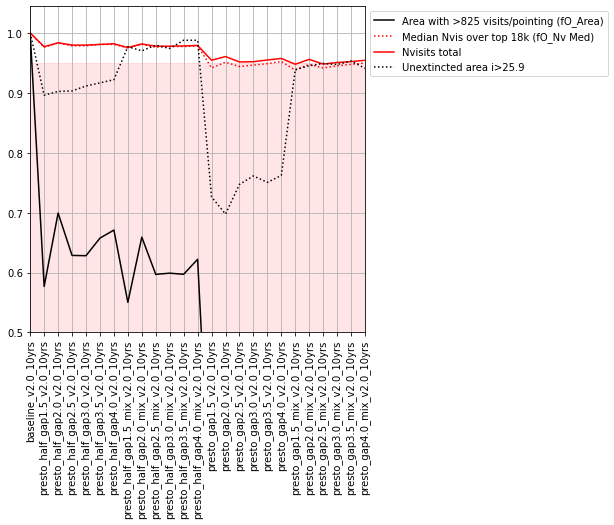

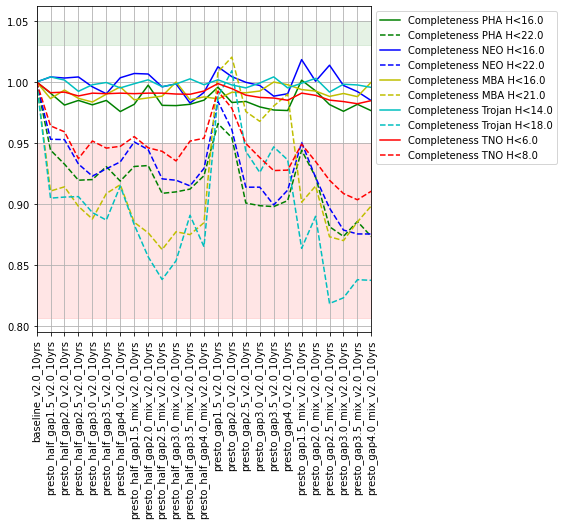

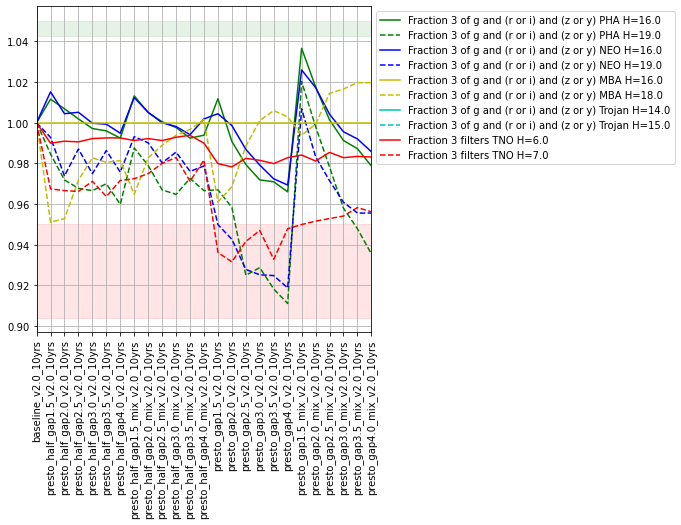

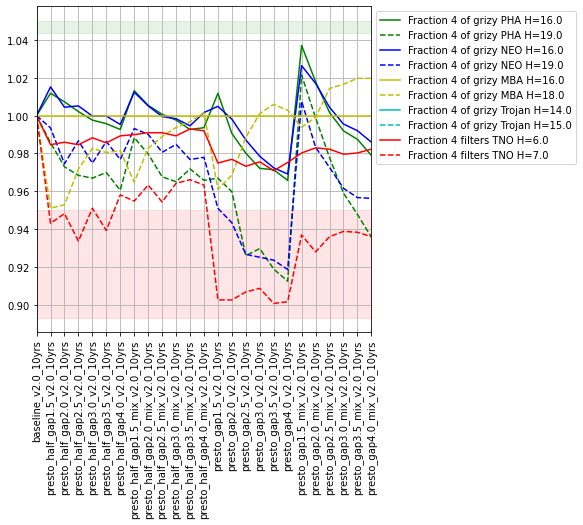

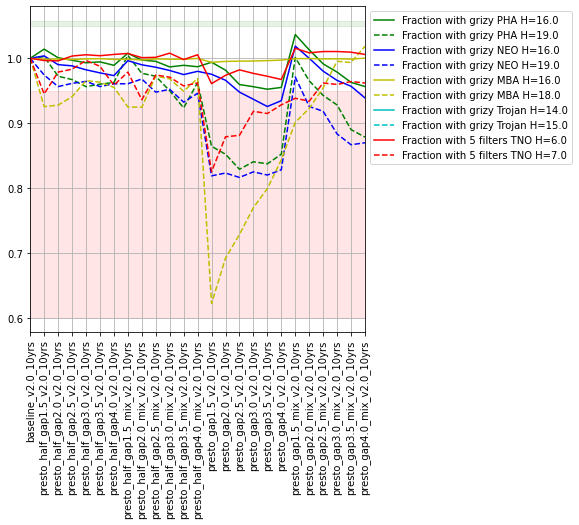

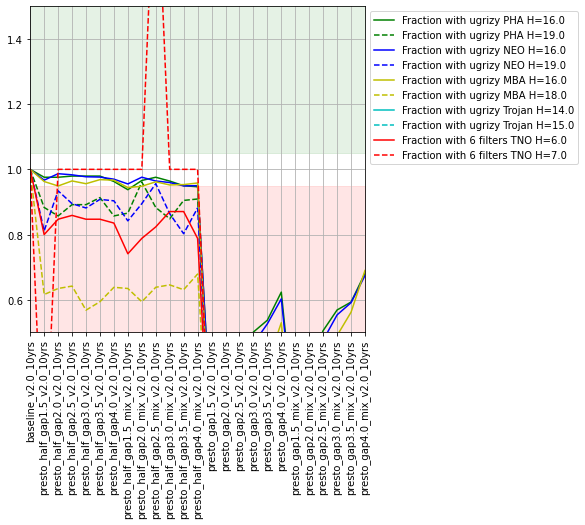

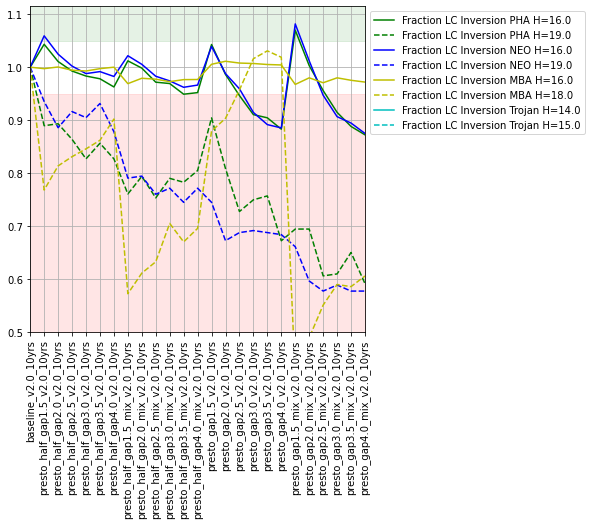

In [167]:
fam = ['presto_half', 'presto']
describe_family(fam)
for mset in sso_metrics:
    d = sso_family(fam, mset)
    IPython.display.display(d)

**long_gaps** : The baseline survey strategy takes pairs of visits every few nights, wherethe pair is separated by about 33 minutes. The pairs are taken in mixed filters, for color measurements. These simulations add a third visit after a variable time period of between 2 to 7 hours. The triplet visit is in one of the same filters as the earlier pair, and only occurs if the first pair is in contained within griz filters. In some of the simulations, these triplet visits are obtained throughout the survey, while for other simulations the triplets do not start until year 5.

Area with >825 visits/pointing (fO_Area)  \
run                                                                                     
baseline_v2.0_10yrs                                                      12893.228978   
long_gaps_nightsoff7_delayed1827_v2.0_10yrs                              12702.709320   
long_gaps_nightsoff6_delayed1827_v2.0_10yrs                              12451.760520   
long_gaps_nightsoff5_delayed1827_v2.0_10yrs                              12548.279290   
long_gaps_nightsoff4_delayed1827_v2.0_10yrs                              12463.510631   
long_gaps_nightsoff3_delayed1827_v2.0_10yrs                              12372.866918   
long_gaps_nightsoff2_delayed1827_v2.0_10yrs                              12188.222316   
long_gaps_nightsoff1_delayed1827_v2.0_10yrs                              11770.254080   
long_gaps_nightsoff0_delayed1827_v2.0_10yrs                              10288.900797   
long_gaps_nightsoff7_delayed-1_v2.0_10yrs                                12377.902680   
long_gaps_nightsoff6_delayed-1_v2.0_10yrs                                12266.276625   
long_gaps_nightsoff5_delayed-1_v2.0_10yrs                                12234.383466   
long_gaps_nightsoff4_delayed-1_v2.0_10yrs                                12098.417896   
long_gaps_nightsoff3_delayed-1_v2.0_10yrs                                12009.452769   
long_gaps_nightsoff2_delayed-1_v2.0_10yrs                                11510.912344   
long_gaps_nightsoff1_delayed-1_v2.0_10yrs                                10896.549396   
long_gaps_nightsoff0_delayed-1_v2.0_10yrs                                 7792.841496   

                                             Unextincted area i>25.9  \
run                                                                    
baseline_v2.0_10yrs                                     16711.175770   
long_gaps_nightsoff7_delayed1827_v2.0_10yrs             16691.032722   
long_gaps_nightsoff6_delayed1827_v2.0_10yrs             16642.353691   
long_gaps_nightsoff5_delayed1827_v2.0_10yrs             16660.818151   
long_gaps_nightsoff4_delayed1827_v2.0_10yrs             16612.139120   
long_gaps_nightsoff3_delayed1827_v2.0_10yrs             16570.174437   
long_gaps_nightsoff2_delayed1827_v2.0_10yrs             16565.977969   
long_gaps_nightsoff1_delayed1827_v2.0_10yrs             16421.619462   
long_gaps_nightsoff0_delayed1827_v2.0_10yrs             15954.132902   
long_gaps_nightsoff7_delayed-1_v2.0_10yrs               16499.673771   
long_gaps_nightsoff6_delayed-1_v2.0_10yrs               16465.262732   
long_gaps_nightsoff5_delayed-1_v2.0_10yrs               16602.067596   
long_gaps_nightsoff4_delayed-1_v2.0_10yrs               16466.102025   
long_gaps_nightsoff3_delayed-1_v2.0_10yrs               16392.244185   
long_gaps_nightsoff2_delayed-1_v2.0_10yrs               16227.742630   
long_gaps_nightsoff1_delayed-1_v2.0_10yrs               15849.221196   
long_gaps_nightsoff0_delayed-1_v2.0_10yrs               14019.561050   

                                             Nvisits total  \
run                                                          
baseline_v2.0_10yrs                              2086980.0   
long_gaps_nightsoff7_delayed1827_v2.0_10yrs      2085109.0   
long_gaps_nightsoff6_delayed1827_v2.0_10yrs      2084436.0   
long_gaps_nightsoff5_delayed1827_v2.0_10yrs      2084570.0   
long_gaps_nightsoff4_delayed1827_v2.0_10yrs      2083856.0   
long_gaps_nightsoff3_delayed1827_v2.0_10yrs      2082889.0   
long_gaps_nightsoff2_delayed1827_v2.0_10yrs      2081844.0   
long_gaps_nightsoff1_delayed1827_v2.0_10yrs      2078434.0   
long_gaps_nightsoff0_delayed1827_v2.0_10yrs      2067452.0   
long_gaps_nightsoff7_delayed-1_v2.0_10yrs        2083825.0   
long_gaps_nightsoff6_delayed-1_v2.0_10yrs        2081933.0   
long_gaps_nightsoff5_delayed-1_v2.0_10yrs        2082106.0   
long_gaps_nightsoff4_delayed-1_v2.0_10yrs        2080392.0   
long_gaps_nightsoff3_delayed-1_v2.0_10yrs        20793

short_name                                   Completeness PHA H<16.0  \
run                                                                    
baseline_v2.0_10yrs                                           0.9404   
long_gaps_nightsoff7_delayed1827_v2.0_10yrs                   0.9412   
long_gaps_nightsoff6_delayed1827_v2.0_10yrs                   0.9416   
long_gaps_nightsoff5_delayed1827_v2.0_10yrs                   0.9412   
long_gaps_nightsoff4_delayed1827_v2.0_10yrs                   0.9424   
long_gaps_nightsoff3_delayed1827_v2.0_10yrs                   0.9418   
long_gaps_nightsoff2_delayed1827_v2.0_10yrs                   0.9404   
long_gaps_nightsoff1_delayed1827_v2.0_10yrs                   0.9414   
long_gaps_nightsoff0_delayed1827_v2.0_10yrs                   0.9394   
long_gaps_nightsoff7_delayed-1_v2.0_10yrs                     0.9394   
long_gaps_nightsoff6_delayed-1_v2.0_10yrs                     0.9446   
long_gaps_nightsoff5_delayed-1_v2.0_10yrs                     0.9420   
long_gaps_nightsoff4_delayed-1_v2.0_10yrs                     0.9394   
long_gaps_nightsoff3_delayed-1_v2.0_10yrs                     0.9430   
long_gaps_nightsoff2_delayed-1_v2.0_10yrs                     0.9410   
long_gaps_nightsoff1_delayed-1_v2.0_10yrs                     0.9388   
long_gaps_nightsoff0_delayed-1_v2.0_10yrs                     0.9426   

short_name                                   Completeness PHA H<22.0  \
run                                                                    
baseline_v2.0_10yrs                                         0.589618   
long_gaps_nightsoff7_delayed1827_v2.0_10yrs                 0.588540   
long_gaps_nightsoff6_delayed1827_v2.0_10yrs                 0.587396   
long_gaps_nightsoff5_delayed1827_v2.0_10yrs                 0.586616   
long_gaps_nightsoff4_delayed1827_v2.0_10yrs                 0.584890   
long_gaps_nightsoff3_delayed1827_v2.0_10yrs                 0.583807   
long_gaps_nightsoff2_delayed1827_v2.0_10yrs                 0.583702   
long_gaps_nightsoff1_delayed1827_v2.0_10yrs                 0.579818   
long_gaps_nightsoff0_delayed1827_v2.0_10yrs                 0.574465   
long_gaps_nightsoff7_delayed-1_v2.0_10yrs                   0.582443   
long_gaps_nightsoff6_delayed-1_v2.0_10yrs                   0.585084   
long_gaps_nightsoff5_delayed-1_v2.0_10yrs                   0.583004   
long_gaps_nightsoff4_delayed-1_v2.0_10yrs                   0.584482   
long_gaps_nightsoff3_delayed-1_v2.0_10yrs                   0.580202   
long_gaps_nightsoff2_delayed-1_v2.0_10yrs                   0.573789   
long_gaps_nightsoff1_delayed-1_v2.0_10yrs                   0.572276   
long_gaps_nightsoff0_delayed-1_v2.0_10yrs                   0.558315   

short_name                                   Completeness NEO H<16.0  \
run                                                                    
baseline_v2.0_10yrs                                           0.9138   
long_gaps_nightsoff7_delayed1827_v2.0_10yrs                   0.9112   
long_gaps_nightsoff6_delayed1827_v2.0_10yrs                   0.9074   
long_gaps_nightsoff5_delayed1827_v2.0_10yrs                   0.9174   
long_gaps_nightsoff4_delayed1827_v2.0_10yrs                   0.9070   
long_gaps_nightsoff3_delayed1827_v2.0_10yrs                   0.9108   
long_gaps_nightsoff2_delayed1827_v2.0_10yrs                   0.9144   
long_gaps_nightsoff1_delayed1827_v2.0_10yrs                   0.9044   
long_gaps_nightsoff0_delayed1827_v2.0_10yrs                   0.9018   
long_gaps_nightsoff7_delayed-1_v2.0_10yrs                     0.9066   
long_gaps_nightsoff6_delayed-1_v2.0_10yrs                     0.9142   
long_gaps_nightsoff5_delayed-1_v2.0_10yrs                     0.9182   
long_gaps_nightsoff4_delayed-1_v2.0_10yrs                     0.9158   
long_gaps_nightsoff3_delayed-1_v2.0_10yrs                     0.9226   
long_gaps_nightsoff2_delayed-1_v2.0_10yrs                     0.9102   
long_gaps_nightsoff1_delayed-1_v2.0_10

short_name                                   Fraction 3 of g and (r or i) and (z or y) PHA H=16.0  \
run                                                                                                 
baseline_v2.0_10yrs                                                                     0.8468      
long_gaps_nightsoff7_delayed1827_v2.0_10yrs                                             0.8490      
long_gaps_nightsoff6_delayed1827_v2.0_10yrs                                             0.8470      
long_gaps_nightsoff5_delayed1827_v2.0_10yrs                                             0.8476      
long_gaps_nightsoff4_delayed1827_v2.0_10yrs                                             0.8438      
long_gaps_nightsoff3_delayed1827_v2.0_10yrs                                             0.8446      
long_gaps_nightsoff2_delayed1827_v2.0_10yrs                                             0.8456      
long_gaps_nightsoff1_delayed1827_v2.0_10yrs                                             0.8448      
long_gaps_nightsoff0_delayed1827_v2.0_10yrs                                             0.8410      
long_gaps_nightsoff7_delayed-1_v2.0_10yrs                                               0.8482      
long_gaps_nightsoff6_delayed-1_v2.0_10yrs                                               0.8442      
long_gaps_nightsoff5_delayed-1_v2.0_10yrs                                               0.8444      
long_gaps_nightsoff4_delayed-1_v2.0_10yrs                                               0.8464      
long_gaps_nightsoff3_delayed-1_v2.0_10yrs                                               0.8474      
long_gaps_nightsoff2_delayed-1_v2.0_10yrs                                               0.8434      
long_gaps_nightsoff1_delayed-1_v2.0_10yrs                                               0.8452      
long_gaps_nightsoff0_delayed-1_v2.0_10yrs                                               0.8400      

short_name                                   Fraction 3 of g and (r or i) and (z or y) PHA H=19.0  \
run                                                                                                 
baseline_v2.0_10yrs                                                                     0.5332      
long_gaps_nightsoff7_delayed1827_v2.0_10yrs                                             0.5324      
long_gaps_nightsoff6_delayed1827_v2.0_10yrs                                             0.5290      
long_gaps_nightsoff5_delayed1827_v2.0_10yrs                                             0.5282      
long_gaps_nightsoff4_delayed1827_v2.0_10yrs                                             0.5250      
long_gaps_nightsoff3_delayed1827_v2.0_10yrs                                             0.5282      
long_gaps_nightsoff2_delayed1827_v2.0_10yrs                                             0.5294      
long_gaps_nightsoff1_delayed1827_v2.0_10yrs                                             0.5256      
long_gaps_nightsoff0_delayed1827_v2.0_10yrs                                             0.5184      
long_gaps_nightsoff7_delayed-1_v2.0_10yrs                                               0.5314      
long_gaps_nightsoff6_delayed-1_v2.0_10yrs                                               0.5242      
long_gaps_nightsoff5_delayed-1_v2.0_10yrs                                               0.5316      
long_gaps_nightsoff4_delayed-1_v2.0_10yrs                                               0.5270      
long_gaps_nightsoff3_delayed-1_v2.0_10yrs                                               0.5252      
long_gaps_nightsoff2_delayed-1_v2.0_10yrs                                               0.5250      
long_gaps_nightsoff1_delayed-1_v2.0_10yrs                                               0.5144      
long_gaps_nightsoff0_delayed-1_v2.0_10yrs                                               0.5040      

short_name                                   Fraction 3 of g and (r or i) and (z or y) NEO H=16.0  \
run                                                        

short_name                                   Fraction 4 of grizy PHA H=16.0  \
run                                                                           
baseline_v2.0_10yrs                                                  0.8462   
long_gaps_nightsoff7_delayed1827_v2.0_10yrs                          0.8482   
long_gaps_nightsoff6_delayed1827_v2.0_10yrs                          0.8468   
long_gaps_nightsoff5_delayed1827_v2.0_10yrs                          0.8470   
long_gaps_nightsoff4_delayed1827_v2.0_10yrs                          0.8436   
long_gaps_nightsoff3_delayed1827_v2.0_10yrs                          0.8442   
long_gaps_nightsoff2_delayed1827_v2.0_10yrs                          0.8452   
long_gaps_nightsoff1_delayed1827_v2.0_10yrs                          0.8440   
long_gaps_nightsoff0_delayed1827_v2.0_10yrs                          0.8404   
long_gaps_nightsoff7_delayed-1_v2.0_10yrs                            0.8476   
long_gaps_nightsoff6_delayed-1_v2.0_10yrs                            0.8438   
long_gaps_nightsoff5_delayed-1_v2.0_10yrs                            0.8444   
long_gaps_nightsoff4_delayed-1_v2.0_10yrs                            0.8462   
long_gaps_nightsoff3_delayed-1_v2.0_10yrs                            0.8470   
long_gaps_nightsoff2_delayed-1_v2.0_10yrs                            0.8432   
long_gaps_nightsoff1_delayed-1_v2.0_10yrs                            0.8452   
long_gaps_nightsoff0_delayed-1_v2.0_10yrs                            0.8394   

short_name                                   Fraction 4 of grizy PHA H=19.0  \
run                                                                           
baseline_v2.0_10yrs                                                  0.5322   
long_gaps_nightsoff7_delayed1827_v2.0_10yrs                          0.5322   
long_gaps_nightsoff6_delayed1827_v2.0_10yrs                          0.5284   
long_gaps_nightsoff5_delayed1827_v2.0_10yrs                          0.5268   
long_gaps_nightsoff4_delayed1827_v2.0_10yrs                          0.5242   
long_gaps_nightsoff3_delayed1827_v2.0_10yrs                          0.5274   
long_gaps_nightsoff2_delayed1827_v2.0_10yrs                          0.5290   
long_gaps_nightsoff1_delayed1827_v2.0_10yrs                          0.5250   
long_gaps_nightsoff0_delayed1827_v2.0_10yrs                          0.5174   
long_gaps_nightsoff7_delayed-1_v2.0_10yrs                            0.5308   
long_gaps_nightsoff6_delayed-1_v2.0_10yrs                            0.5236   
long_gaps_nightsoff5_delayed-1_v2.0_10yrs                            0.5312   
long_gaps_nightsoff4_delayed-1_v2.0_10yrs                            0.5268   
long_gaps_nightsoff3_delayed-1_v2.0_10yrs                            0.5248   
long_gaps_nightsoff2_delayed-1_v2.0_10yrs                            0.5248   
long_gaps_nightsoff1_delayed-1_v2.0_10yrs                            0.5142   
long_gaps_nightsoff0_delayed-1_v2.0_10yrs                            0.5036   

short_name                                   Fraction 4 of grizy NEO H=16.0  \
run                                                                           
baseline_v2.0_10yrs                                                  0.8548   
long_gaps_nightsoff7_delayed1827_v2.0_10yrs                          0.8568   
long_gaps_nightsoff6_delayed1827_v2.0_10yrs                          0.8552   
long_gaps_nightsoff5_delayed1827_v2.0_10yrs                          0.8594   
long_gaps_nightsoff4_delayed1827_v2.0_10yrs                          0.8534   
long_gaps_nightsoff3_delayed1827_v2.0_10yrs                          0.8532   
long_gaps_nightsoff2_delayed1827_v2.0_10yrs                          0.8536   
long_gaps_nightsoff1_delayed1827_v2.0_10yrs                          0.8556   
long_gaps_nightsoff0_delayed1827_v2.0_10yrs                          0.8482   
long_gaps_nightsoff7_delayed-1_v2.0_10yrs                            0.8538   
long_gaps_nightsoff6_delayed-1_v2.0_10yrs       

short_name                                   Fraction with grizy PHA H=16.0  \
run                                                                           
baseline_v2.0_10yrs                                                  0.7216   
long_gaps_nightsoff7_delayed1827_v2.0_10yrs                          0.7230   
long_gaps_nightsoff6_delayed1827_v2.0_10yrs                          0.7216   
long_gaps_nightsoff5_delayed1827_v2.0_10yrs                          0.7242   
long_gaps_nightsoff4_delayed1827_v2.0_10yrs                          0.7220   
long_gaps_nightsoff3_delayed1827_v2.0_10yrs                          0.7210   
long_gaps_nightsoff2_delayed1827_v2.0_10yrs                          0.7190   
long_gaps_nightsoff1_delayed1827_v2.0_10yrs                          0.7188   
long_gaps_nightsoff0_delayed1827_v2.0_10yrs                          0.7082   
long_gaps_nightsoff7_delayed-1_v2.0_10yrs                            0.7222   
long_gaps_nightsoff6_delayed-1_v2.0_10yrs                            0.7262   
long_gaps_nightsoff5_delayed-1_v2.0_10yrs                            0.7204   
long_gaps_nightsoff4_delayed-1_v2.0_10yrs                            0.7212   
long_gaps_nightsoff3_delayed-1_v2.0_10yrs                            0.7248   
long_gaps_nightsoff2_delayed-1_v2.0_10yrs                            0.7200   
long_gaps_nightsoff1_delayed-1_v2.0_10yrs                            0.7210   
long_gaps_nightsoff0_delayed-1_v2.0_10yrs                            0.7042   

short_name                                   Fraction with grizy PHA H=19.0  \
run                                                                           
baseline_v2.0_10yrs                                                  0.3112   
long_gaps_nightsoff7_delayed1827_v2.0_10yrs                          0.3090   
long_gaps_nightsoff6_delayed1827_v2.0_10yrs                          0.3076   
long_gaps_nightsoff5_delayed1827_v2.0_10yrs                          0.3066   
long_gaps_nightsoff4_delayed1827_v2.0_10yrs                          0.3116   
long_gaps_nightsoff3_delayed1827_v2.0_10yrs                          0.3070   
long_gaps_nightsoff2_delayed1827_v2.0_10yrs                          0.3108   
long_gaps_nightsoff1_delayed1827_v2.0_10yrs                          0.3070   
long_gaps_nightsoff0_delayed1827_v2.0_10yrs                          0.2954   
long_gaps_nightsoff7_delayed-1_v2.0_10yrs                            0.3134   
long_gaps_nightsoff6_delayed-1_v2.0_10yrs                            0.3076   
long_gaps_nightsoff5_delayed-1_v2.0_10yrs                            0.3094   
long_gaps_nightsoff4_delayed-1_v2.0_10yrs                            0.3120   
long_gaps_nightsoff3_delayed-1_v2.0_10yrs                            0.3132   
long_gaps_nightsoff2_delayed-1_v2.0_10yrs                            0.3100   
long_gaps_nightsoff1_delayed-1_v2.0_10yrs                            0.3078   
long_gaps_nightsoff0_delayed-1_v2.0_10yrs                            0.2926   

short_name                                   Fraction with grizy NEO H=16.0  \
run                                                                           
baseline_v2.0_10yrs                                                  0.7564   
long_gaps_nightsoff7_delayed1827_v2.0_10yrs                          0.7510   
long_gaps_nightsoff6_delayed1827_v2.0_10yrs                          0.7550   
long_gaps_nightsoff5_delayed1827_v2.0_10yrs                          0.7546   
long_gaps_nightsoff4_delayed1827_v2.0_10yrs                          0.7526   
long_gaps_nightsoff3_delayed1827_v2.0_10yrs                          0.7548   
long_gaps_nightsoff2_delayed1827_v2.0_10yrs                          0.7538   
long_gaps_nightsoff1_delayed1827_v2.0_10yrs                          0.7496   
long_gaps_nightsoff0_delayed1827_v2.0_10yrs                          0.7432   
long_gaps_nightsoff7_delayed-1_v2.0_10yrs                            0.7474   
long_gaps_nightsoff6_delayed-1_v2.0_10yrs       

short_name                                   Fraction with ugrizy PHA H=16.0  \
run                                                                            
baseline_v2.0_10yrs                                                   0.4458   
long_gaps_nightsoff7_delayed1827_v2.0_10yrs                           0.4454   
long_gaps_nightsoff6_delayed1827_v2.0_10yrs                           0.4470   
long_gaps_nightsoff5_delayed1827_v2.0_10yrs                           0.4422   
long_gaps_nightsoff4_delayed1827_v2.0_10yrs                           0.4400   
long_gaps_nightsoff3_delayed1827_v2.0_10yrs                           0.4504   
long_gaps_nightsoff2_delayed1827_v2.0_10yrs                           0.4482   
long_gaps_nightsoff1_delayed1827_v2.0_10yrs                           0.4388   
long_gaps_nightsoff0_delayed1827_v2.0_10yrs                           0.4164   
long_gaps_nightsoff7_delayed-1_v2.0_10yrs                             0.4416   
long_gaps_nightsoff6_delayed-1_v2.0_10yrs                             0.4432   
long_gaps_nightsoff5_delayed-1_v2.0_10yrs                             0.4430   
long_gaps_nightsoff4_delayed-1_v2.0_10yrs                             0.4456   
long_gaps_nightsoff3_delayed-1_v2.0_10yrs                             0.4514   
long_gaps_nightsoff2_delayed-1_v2.0_10yrs                             0.4420   
long_gaps_nightsoff1_delayed-1_v2.0_10yrs                             0.4370   
long_gaps_nightsoff0_delayed-1_v2.0_10yrs                             0.4056   

short_name                                   Fraction with ugrizy PHA H=19.0  \
run                                                                            
baseline_v2.0_10yrs                                                   0.0462   
long_gaps_nightsoff7_delayed1827_v2.0_10yrs                           0.0506   
long_gaps_nightsoff6_delayed1827_v2.0_10yrs                           0.0456   
long_gaps_nightsoff5_delayed1827_v2.0_10yrs                           0.0472   
long_gaps_nightsoff4_delayed1827_v2.0_10yrs                           0.0458   
long_gaps_nightsoff3_delayed1827_v2.0_10yrs                           0.0478   
long_gaps_nightsoff2_delayed1827_v2.0_10yrs                           0.0494   
long_gaps_nightsoff1_delayed1827_v2.0_10yrs                           0.0438   
long_gaps_nightsoff0_delayed1827_v2.0_10yrs                           0.0386   
long_gaps_nightsoff7_delayed-1_v2.0_10yrs                             0.0476   
long_gaps_nightsoff6_delayed-1_v2.0_10yrs                             0.0450   
long_gaps_nightsoff5_delayed-1_v2.0_10yrs                             0.0474   
long_gaps_nightsoff4_delayed-1_v2.0_10yrs                             0.0460   
long_gaps_nightsoff3_delayed-1_v2.0_10yrs                             0.0512   
long_gaps_nightsoff2_delayed-1_v2.0_10yrs                             0.0472   
long_gaps_nightsoff1_delayed-1_v2.0_10yrs                             0.0438   
long_gaps_nightsoff0_delayed-1_v2.0_10yrs                             0.0338   

short_name                                   Fraction with ugrizy NEO H=16.0  \
run                                                                            
baseline_v2.0_10yrs                                                   0.4648   
long_gaps_nightsoff7_delayed1827_v2.0_10yrs                           0.4726   
long_gaps_nightsoff6_delayed1827_v2.0_10yrs                           0.4708   
long_gaps_nightsoff5_delayed1827_v2.0_10yrs                           0.4650   
long_gaps_nightsoff4_delayed1827_v2.0_10yrs                           0.4754   
long_gaps_nightsoff3_delayed1827_v2.0_10yrs                           0.4678   
long_gaps_nightsoff2_delayed1827_v2.0_10yrs                           0.4696   
long_gaps_nightsoff1_delayed1827_v2.0_10yrs                           0.4692   
long_gaps_nightsoff0_delayed1827_v2.0_10yrs                           0.4446   
long_gaps_nightsoff7_delayed-1_v2.0_10yrs                             0.4702  

short_name                                   Fraction LC Inversion PHA H=16.0  \
run                                                                             
baseline_v2.0_10yrs                                                    0.4674   
long_gaps_nightsoff7_delayed1827_v2.0_10yrs                            0.4714   
long_gaps_nightsoff6_delayed1827_v2.0_10yrs                            0.4674   
long_gaps_nightsoff5_delayed1827_v2.0_10yrs                            0.4672   
long_gaps_nightsoff4_delayed1827_v2.0_10yrs                            0.4670   
long_gaps_nightsoff3_delayed1827_v2.0_10yrs                            0.4670   
long_gaps_nightsoff2_delayed1827_v2.0_10yrs                            0.4642   
long_gaps_nightsoff1_delayed1827_v2.0_10yrs                            0.4656   
long_gaps_nightsoff0_delayed1827_v2.0_10yrs                            0.4536   
long_gaps_nightsoff7_delayed-1_v2.0_10yrs                              0.4712   
long_gaps_nightsoff6_delayed-1_v2.0_10yrs                              0.4670   
long_gaps_nightsoff5_delayed-1_v2.0_10yrs                              0.4636   
long_gaps_nightsoff4_delayed-1_v2.0_10yrs                              0.4670   
long_gaps_nightsoff3_delayed-1_v2.0_10yrs                              0.4694   
long_gaps_nightsoff2_delayed-1_v2.0_10yrs                              0.4662   
long_gaps_nightsoff1_delayed-1_v2.0_10yrs                              0.4582   
long_gaps_nightsoff0_delayed-1_v2.0_10yrs                              0.4380   

short_name                                   Fraction LC Inversion PHA H=19.0  \
run                                                                             
baseline_v2.0_10yrs                                                    0.0544   
long_gaps_nightsoff7_delayed1827_v2.0_10yrs                            0.0530   
long_gaps_nightsoff6_delayed1827_v2.0_10yrs                            0.0512   
long_gaps_nightsoff5_delayed1827_v2.0_10yrs                            0.0520   
long_gaps_nightsoff4_delayed1827_v2.0_10yrs                            0.0528   
long_gaps_nightsoff3_delayed1827_v2.0_10yrs                            0.0530   
long_gaps_nightsoff2_delayed1827_v2.0_10yrs                            0.0516   
long_gaps_nightsoff1_delayed1827_v2.0_10yrs                            0.0526   
long_gaps_nightsoff0_delayed1827_v2.0_10yrs                            0.0472   
long_gaps_nightsoff7_delayed-1_v2.0_10yrs                              0.0502   
long_gaps_nightsoff6_delayed-1_v2.0_10yrs                              0.0520   
long_gaps_nightsoff5_delayed-1_v2.0_10yrs                              0.0528   
long_gaps_nightsoff4_delayed-1_v2.0_10yrs                              0.0530   
long_gaps_nightsoff3_delayed-1_v2.0_10yrs                              0.0512   
long_gaps_nightsoff2_delayed-1_v2.0_10yrs                              0.0514   
long_gaps_nightsoff1_delayed-1_v2.0_10yrs                              0.0478   
long_gaps_nightsoff0_delayed-1_v2.0_10yrs                              0.0414   

short_name                                   Fraction LC Inversion NEO H=16.0  \
run                                                                             
baseline_v2.0_10yrs                                                    0.4804   
long_gaps_nightsoff7_delayed1827_v2.0_10yrs                            0.4818   
long_gaps_nightsoff6_delayed1827_v2.0_10yrs                            0.4820   
long_gaps_nightsoff5_delayed1827_v2.0_10yrs                            0.4850   
long_gaps_nightsoff4_delayed1827_v2.0_10yrs                            0.4796   
long_gaps_nightsoff3_delayed1827_v2.0_10yrs                            0.4802   
long_gaps_nightsoff2_delayed1827_v2.0_10yrs                            0.4796   
long_gaps_nightsoff1_delayed1827_v2.0_10yrs                            0.4780   
long_gaps_nightsoff0_delayed1827_v2.0_10yrs                            0.4628   
long_gaps_nightsoff7_delayed-

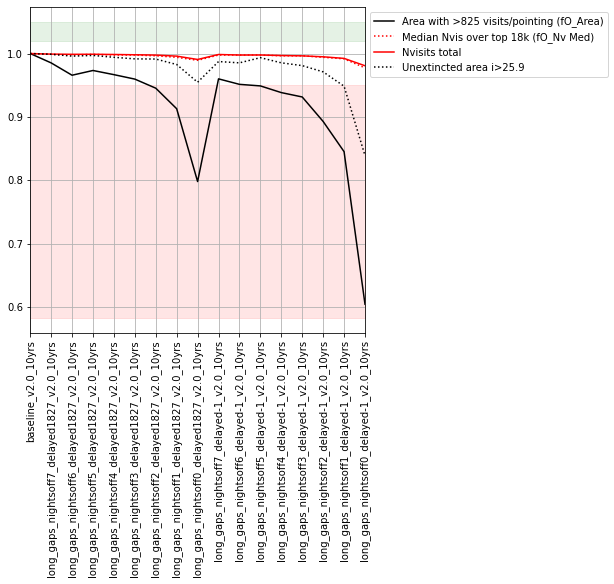

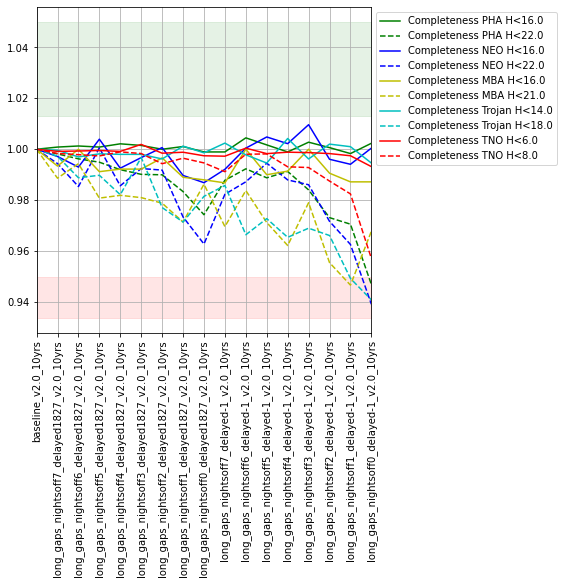

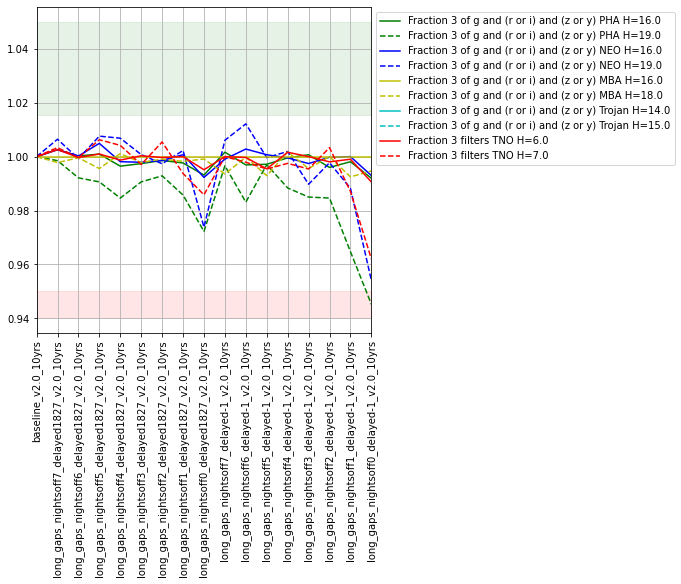

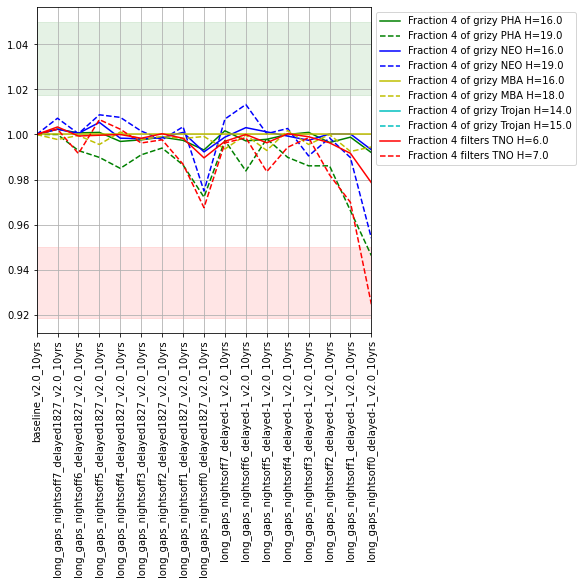

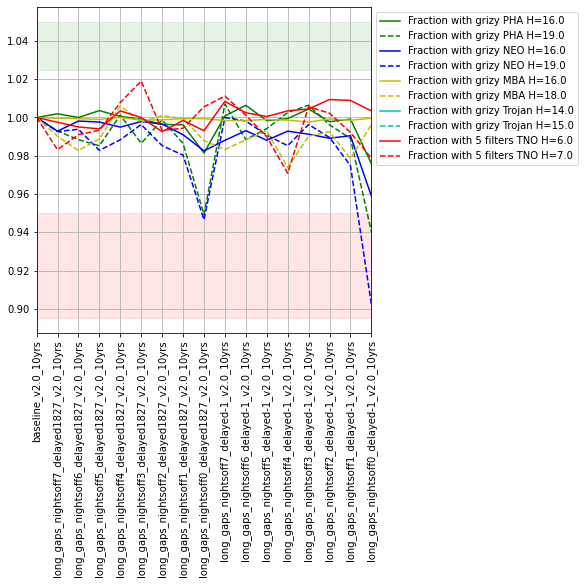

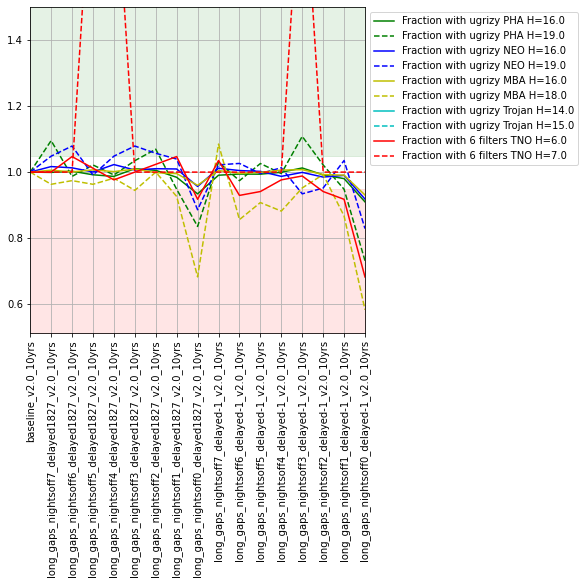

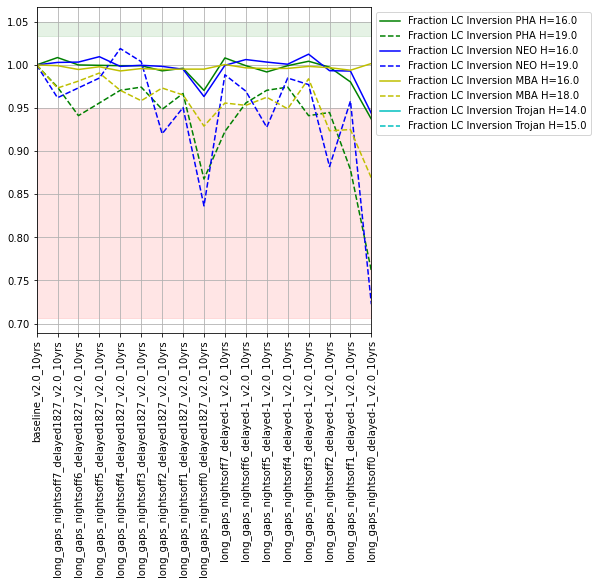

In [168]:
fam = ['long_gaps']
describe_family(fam)
for mset in sso_metrics:
    d = sso_family(fam, mset)
    IPython.display.display(d)

**long_gaps_nopair** : The baseline survey strategy takes pairs of visits every few nights, wherethe pair is separated by about 33 minutes. The pairs are taken in mixed filters, for color measurements. These simulations extend the gap between the pair of visits, modifying it to a variable time period of between 2 to 7 hours. The pair of visits are both in the same filter, in any of griz (g+r, r+i, or i+z pairs). In some of the simulations, these triplet visits are obtained throughout the survey, while for other simulations the triplets do not start until year 5.

Area with >825 visits/pointing (fO_Area)  \
run                                                                                        
baseline_v2.0_10yrs                                                         12893.228978   
long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs                              12520.582599   
long_gaps_np_nightsoff6_delayed1827_v2.0_10yrs                              12443.367584   
long_gaps_np_nightsoff5_delayed1827_v2.0_10yrs                              12414.831600   
long_gaps_np_nightsoff4_delayed1827_v2.0_10yrs                              12335.937997   
long_gaps_np_nightsoff3_delayed1827_v2.0_10yrs                              12362.795394   
long_gaps_np_nightsoff2_delayed1827_v2.0_10yrs                              12073.239086   
long_gaps_np_nightsoff1_delayed1827_v2.0_10yrs                              11339.696440   
long_gaps_np_nightsoff0_delayed1827_v2.0_10yrs                               9217.122812   
long_gaps_np_nightsoff7_delayed-1_v2.0_10yrs                                12246.972871   
long_gaps_np_nightsoff6_delayed-1_v2.0_10yrs                                12208.365363   
long_gaps_np_nightsoff5_delayed-1_v2.0_10yrs                                12104.292951   
long_gaps_np_nightsoff4_delayed-1_v2.0_10yrs                                11866.772850   
long_gaps_np_nightsoff3_delayed-1_v2.0_10yrs                                11928.880579   
long_gaps_np_nightsoff2_delayed-1_v2.0_10yrs                                11296.053171   
long_gaps_np_nightsoff1_delayed-1_v2.0_10yrs                                10262.043400   
long_gaps_np_nightsoff0_delayed-1_v2.0_10yrs                                 6166.290411   

                                                Unextincted area i>25.9  \
run                                                                       
baseline_v2.0_10yrs                                        16711.175770   
long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs             16675.925437   
long_gaps_np_nightsoff6_delayed1827_v2.0_10yrs             16766.569150   
long_gaps_np_nightsoff5_delayed1827_v2.0_10yrs             16655.782389   
long_gaps_np_nightsoff4_delayed1827_v2.0_10yrs             16678.443318   
long_gaps_np_nightsoff3_delayed1827_v2.0_10yrs             16618.853469   
long_gaps_np_nightsoff2_delayed1827_v2.0_10yrs             16607.103358   
long_gaps_np_nightsoff1_delayed1827_v2.0_10yrs             16539.120573   
long_gaps_np_nightsoff0_delayed1827_v2.0_10yrs             15952.454315   
long_gaps_np_nightsoff7_delayed-1_v2.0_10yrs               16623.889231   
long_gaps_np_nightsoff6_delayed-1_v2.0_10yrs               16626.407112   
long_gaps_np_nightsoff5_delayed-1_v2.0_10yrs               16581.085255   
long_gaps_np_nightsoff4_delayed-1_v2.0_10yrs               16498.834478   
long_gaps_np_nightsoff3_delayed-1_v2.0_10yrs               16479.530724   
long_gaps_np_nightsoff2_delayed-1_v2.0_10yrs               16405.672883   
long_gaps_np_nightsoff1_delayed-1_v2.0_10yrs               16146.331147   
long_gaps_np_nightsoff0_delayed-1_v2.0_10yrs               13863.452432   

                                                Nvisits total  \
run                                                             
baseline_v2.0_10yrs                                 2086980.0   
long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs      2084679.0   
long_gaps_np_nightsoff6_delayed1827_v2.0_10yrs      2083998.0   
long_gaps_np_nightsoff5_delayed1827_v2.0_10yrs      2083679.0   
long_gaps_np_nightsoff4_delayed1827_v2.0_10yrs      2082707.0   
long_gaps_np_nightsoff3_delayed1827_v2.0_10yrs      2082329.0   
long_gaps_np_nightsoff2_delayed1827_v2.0_10yrs      2080554.0   
long_gaps_np_nightsoff1_delayed1827_v2.0_10yrs      2075040.0   
long_gaps_np_nightsoff0_delayed1827_v2.0_10yrs      2059335.0   
long_gaps_np_nightsoff7_delayed-1_v2.0_10yrs        2082384.0   
long_gaps_np_nightsoff6_delayed-1_v2.0_10yrs        2080974.0   
long_gaps_np_nightsoff5_dela

short_name                                      Completeness PHA H<16.0  \
run                                                                       
baseline_v2.0_10yrs                                              0.9404   
long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs                   0.9204   
long_gaps_np_nightsoff6_delayed1827_v2.0_10yrs                   0.9248   
long_gaps_np_nightsoff5_delayed1827_v2.0_10yrs                   0.9212   
long_gaps_np_nightsoff4_delayed1827_v2.0_10yrs                   0.9190   
long_gaps_np_nightsoff3_delayed1827_v2.0_10yrs                   0.9178   
long_gaps_np_nightsoff2_delayed1827_v2.0_10yrs                   0.9384   
long_gaps_np_nightsoff1_delayed1827_v2.0_10yrs                   0.9412   
long_gaps_np_nightsoff0_delayed1827_v2.0_10yrs                   0.9356   
long_gaps_np_nightsoff7_delayed-1_v2.0_10yrs                     0.9146   
long_gaps_np_nightsoff6_delayed-1_v2.0_10yrs                     0.9140   
long_gaps_np_nightsoff5_delayed-1_v2.0_10yrs                     0.9216   
long_gaps_np_nightsoff4_delayed-1_v2.0_10yrs                     0.9210   
long_gaps_np_nightsoff3_delayed-1_v2.0_10yrs                     0.9138   
long_gaps_np_nightsoff2_delayed-1_v2.0_10yrs                     0.9180   
long_gaps_np_nightsoff1_delayed-1_v2.0_10yrs                     0.9380   
long_gaps_np_nightsoff0_delayed-1_v2.0_10yrs                     0.9324   

short_name                                      Completeness PHA H<22.0  \
run                                                                       
baseline_v2.0_10yrs                                            0.589618   
long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs                 0.572063   
long_gaps_np_nightsoff6_delayed1827_v2.0_10yrs                 0.572863   
long_gaps_np_nightsoff5_delayed1827_v2.0_10yrs                 0.569905   
long_gaps_np_nightsoff4_delayed1827_v2.0_10yrs                 0.568067   
long_gaps_np_nightsoff3_delayed1827_v2.0_10yrs                 0.566304   
long_gaps_np_nightsoff2_delayed1827_v2.0_10yrs                 0.579152   
long_gaps_np_nightsoff1_delayed1827_v2.0_10yrs                 0.574184   
long_gaps_np_nightsoff0_delayed1827_v2.0_10yrs                 0.561872   
long_gaps_np_nightsoff7_delayed-1_v2.0_10yrs                   0.568008   
long_gaps_np_nightsoff6_delayed-1_v2.0_10yrs                   0.561963   
long_gaps_np_nightsoff5_delayed-1_v2.0_10yrs                   0.570057   
long_gaps_np_nightsoff4_delayed-1_v2.0_10yrs                   0.564702   
long_gaps_np_nightsoff3_delayed-1_v2.0_10yrs                   0.558535   
long_gaps_np_nightsoff2_delayed-1_v2.0_10yrs                   0.554995   
long_gaps_np_nightsoff1_delayed-1_v2.0_10yrs                   0.557908   
long_gaps_np_nightsoff0_delayed-1_v2.0_10yrs                   0.527988   

short_name                                      Completeness NEO H<16.0  \
run                                                                       
baseline_v2.0_10yrs                                              0.9138   
long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs                   0.9076   
long_gaps_np_nightsoff6_delayed1827_v2.0_10yrs                   0.9150   
long_gaps_np_nightsoff5_delayed1827_v2.0_10yrs                   0.9078   
long_gaps_np_nightsoff4_delayed1827_v2.0_10yrs                   0.9110   
long_gaps_np_nightsoff3_delayed1827_v2.0_10yrs                   0.9160   
long_gaps_np_nightsoff2_delayed1827_v2.0_10yrs                   0.9108   
long_gaps_np_nightsoff1_delayed1827_v2.0_10yrs                   0.9120   
long_gaps_np_nightsoff0_delayed1827_v2.0_10yrs                   0.9134   
long_gaps_np_nightsoff7_delayed-1_v2.0_10yrs                     0.9098   
long_gaps_np_nightsoff6_delayed-1_v2.0_10yrs                     0.9024   
long_gaps_np_nightsoff5_delayed-1_v2.0_10yrs                     0.9060   
long_gaps_np_nightsoff4_delayed-1_v2.0_10yrs                     0.9054   
long_gaps_np_nightsoff3

short_name                                      Fraction 3 of g and (r or i) and (z or y) PHA H=16.0  \
run                                                                                                    
baseline_v2.0_10yrs                                                                        0.8468      
long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs                                             0.8456      
long_gaps_np_nightsoff6_delayed1827_v2.0_10yrs                                             0.8460      
long_gaps_np_nightsoff5_delayed1827_v2.0_10yrs                                             0.8464      
long_gaps_np_nightsoff4_delayed1827_v2.0_10yrs                                             0.8466      
long_gaps_np_nightsoff3_delayed1827_v2.0_10yrs                                             0.8456      
long_gaps_np_nightsoff2_delayed1827_v2.0_10yrs                                             0.8456      
long_gaps_np_nightsoff1_delayed1827_v2.0_10yrs                                             0.8430      
long_gaps_np_nightsoff0_delayed1827_v2.0_10yrs                                             0.8348      
long_gaps_np_nightsoff7_delayed-1_v2.0_10yrs                                               0.8448      
long_gaps_np_nightsoff6_delayed-1_v2.0_10yrs                                               0.8444      
long_gaps_np_nightsoff5_delayed-1_v2.0_10yrs                                               0.8422      
long_gaps_np_nightsoff4_delayed-1_v2.0_10yrs                                               0.8408      
long_gaps_np_nightsoff3_delayed-1_v2.0_10yrs                                               0.8422      
long_gaps_np_nightsoff2_delayed-1_v2.0_10yrs                                               0.8422      
long_gaps_np_nightsoff1_delayed-1_v2.0_10yrs                                               0.8406      
long_gaps_np_nightsoff0_delayed-1_v2.0_10yrs                                               0.8200      

short_name                                      Fraction 3 of g and (r or i) and (z or y) PHA H=19.0  \
run                                                                                                    
baseline_v2.0_10yrs                                                                        0.5332      
long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs                                             0.5276      
long_gaps_np_nightsoff6_delayed1827_v2.0_10yrs                                             0.5292      
long_gaps_np_nightsoff5_delayed1827_v2.0_10yrs                                             0.5298      
long_gaps_np_nightsoff4_delayed1827_v2.0_10yrs                                             0.5280      
long_gaps_np_nightsoff3_delayed1827_v2.0_10yrs                                             0.5262      
long_gaps_np_nightsoff2_delayed1827_v2.0_10yrs                                             0.5264      
long_gaps_np_nightsoff1_delayed1827_v2.0_10yrs                                             0.5182      
long_gaps_np_nightsoff0_delayed1827_v2.0_10yrs                                             0.5082      
long_gaps_np_nightsoff7_delayed-1_v2.0_10yrs                                               0.5212      
long_gaps_np_nightsoff6_delayed-1_v2.0_10yrs                                               0.5246      
long_gaps_np_nightsoff5_delayed-1_v2.0_10yrs                                               0.5210      
long_gaps_np_nightsoff4_delayed-1_v2.0_10yrs                                               0.5194      
long_gaps_np_nightsoff3_delayed-1_v2.0_10yrs                                               0.5262      
long_gaps_np_nightsoff2_delayed-1_v2.0_10yrs                                               0.5166      
long_gaps_np_nightsoff1_delayed-1_v2.0_10yrs                                               0.5094      
long_gaps_np_nightsoff0_delayed-1_v2.0_10yrs                                               0.4840      

short_name                                    

short_name                                      Fraction 4 of grizy PHA H=16.0  \
run                                                                              
baseline_v2.0_10yrs                                                     0.8462   
long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs                          0.8450   
long_gaps_np_nightsoff6_delayed1827_v2.0_10yrs                          0.8460   
long_gaps_np_nightsoff5_delayed1827_v2.0_10yrs                          0.8456   
long_gaps_np_nightsoff4_delayed1827_v2.0_10yrs                          0.8462   
long_gaps_np_nightsoff3_delayed1827_v2.0_10yrs                          0.8452   
long_gaps_np_nightsoff2_delayed1827_v2.0_10yrs                          0.8452   
long_gaps_np_nightsoff1_delayed1827_v2.0_10yrs                          0.8424   
long_gaps_np_nightsoff0_delayed1827_v2.0_10yrs                          0.8342   
long_gaps_np_nightsoff7_delayed-1_v2.0_10yrs                            0.8446   
long_gaps_np_nightsoff6_delayed-1_v2.0_10yrs                            0.8440   
long_gaps_np_nightsoff5_delayed-1_v2.0_10yrs                            0.8418   
long_gaps_np_nightsoff4_delayed-1_v2.0_10yrs                            0.8404   
long_gaps_np_nightsoff3_delayed-1_v2.0_10yrs                            0.8416   
long_gaps_np_nightsoff2_delayed-1_v2.0_10yrs                            0.8414   
long_gaps_np_nightsoff1_delayed-1_v2.0_10yrs                            0.8406   
long_gaps_np_nightsoff0_delayed-1_v2.0_10yrs                            0.8196   

short_name                                      Fraction 4 of grizy PHA H=19.0  \
run                                                                              
baseline_v2.0_10yrs                                                     0.5322   
long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs                          0.5268   
long_gaps_np_nightsoff6_delayed1827_v2.0_10yrs                          0.5290   
long_gaps_np_nightsoff5_delayed1827_v2.0_10yrs                          0.5292   
long_gaps_np_nightsoff4_delayed1827_v2.0_10yrs                          0.5274   
long_gaps_np_nightsoff3_delayed1827_v2.0_10yrs                          0.5256   
long_gaps_np_nightsoff2_delayed1827_v2.0_10yrs                          0.5258   
long_gaps_np_nightsoff1_delayed1827_v2.0_10yrs                          0.5174   
long_gaps_np_nightsoff0_delayed1827_v2.0_10yrs                          0.5068   
long_gaps_np_nightsoff7_delayed-1_v2.0_10yrs                            0.5206   
long_gaps_np_nightsoff6_delayed-1_v2.0_10yrs                            0.5236   
long_gaps_np_nightsoff5_delayed-1_v2.0_10yrs                            0.5208   
long_gaps_np_nightsoff4_delayed-1_v2.0_10yrs                            0.5186   
long_gaps_np_nightsoff3_delayed-1_v2.0_10yrs                            0.5258   
long_gaps_np_nightsoff2_delayed-1_v2.0_10yrs                            0.5160   
long_gaps_np_nightsoff1_delayed-1_v2.0_10yrs                            0.5086   
long_gaps_np_nightsoff0_delayed-1_v2.0_10yrs                            0.4826   

short_name                                      Fraction 4 of grizy NEO H=16.0  \
run                                                                              
baseline_v2.0_10yrs                                                     0.8548   
long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs                          0.8544   
long_gaps_np_nightsoff6_delayed1827_v2.0_10yrs                          0.8552   
long_gaps_np_nightsoff5_delayed1827_v2.0_10yrs                          0.8560   
long_gaps_np_nightsoff4_delayed1827_v2.0_10yrs                          0.8546   
long_gaps_np_nightsoff3_delayed1827_v2.0_10yrs                          0.8562   
long_gaps_np_nightsoff2_delayed1827_v2.0_10yrs                          0.8536   
long_gaps_np_nightsoff1_delayed1827_v2.0_10yrs                          0.8514   
long_gaps_np_nightsoff0_delayed1827_v2.0_10yrs                

short_name                                      Fraction with grizy PHA H=16.0  \
run                                                                              
baseline_v2.0_10yrs                                                     0.7216   
long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs                          0.7224   
long_gaps_np_nightsoff6_delayed1827_v2.0_10yrs                          0.7188   
long_gaps_np_nightsoff5_delayed1827_v2.0_10yrs                          0.7192   
long_gaps_np_nightsoff4_delayed1827_v2.0_10yrs                          0.7222   
long_gaps_np_nightsoff3_delayed1827_v2.0_10yrs                          0.7198   
long_gaps_np_nightsoff2_delayed1827_v2.0_10yrs                          0.7192   
long_gaps_np_nightsoff1_delayed1827_v2.0_10yrs                          0.7160   
long_gaps_np_nightsoff0_delayed1827_v2.0_10yrs                          0.6966   
long_gaps_np_nightsoff7_delayed-1_v2.0_10yrs                            0.7196   
long_gaps_np_nightsoff6_delayed-1_v2.0_10yrs                            0.7216   
long_gaps_np_nightsoff5_delayed-1_v2.0_10yrs                            0.7218   
long_gaps_np_nightsoff4_delayed-1_v2.0_10yrs                            0.7198   
long_gaps_np_nightsoff3_delayed-1_v2.0_10yrs                            0.7250   
long_gaps_np_nightsoff2_delayed-1_v2.0_10yrs                            0.7162   
long_gaps_np_nightsoff1_delayed-1_v2.0_10yrs                            0.7110   
long_gaps_np_nightsoff0_delayed-1_v2.0_10yrs                            0.6852   

short_name                                      Fraction with grizy PHA H=19.0  \
run                                                                              
baseline_v2.0_10yrs                                                     0.3112   
long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs                          0.3096   
long_gaps_np_nightsoff6_delayed1827_v2.0_10yrs                          0.3092   
long_gaps_np_nightsoff5_delayed1827_v2.0_10yrs                          0.3114   
long_gaps_np_nightsoff4_delayed1827_v2.0_10yrs                          0.3088   
long_gaps_np_nightsoff3_delayed1827_v2.0_10yrs                          0.3072   
long_gaps_np_nightsoff2_delayed1827_v2.0_10yrs                          0.3040   
long_gaps_np_nightsoff1_delayed1827_v2.0_10yrs                          0.3044   
long_gaps_np_nightsoff0_delayed1827_v2.0_10yrs                          0.2872   
long_gaps_np_nightsoff7_delayed-1_v2.0_10yrs                            0.3096   
long_gaps_np_nightsoff6_delayed-1_v2.0_10yrs                            0.3090   
long_gaps_np_nightsoff5_delayed-1_v2.0_10yrs                            0.3120   
long_gaps_np_nightsoff4_delayed-1_v2.0_10yrs                            0.3094   
long_gaps_np_nightsoff3_delayed-1_v2.0_10yrs                            0.3070   
long_gaps_np_nightsoff2_delayed-1_v2.0_10yrs                            0.3064   
long_gaps_np_nightsoff1_delayed-1_v2.0_10yrs                            0.2936   
long_gaps_np_nightsoff0_delayed-1_v2.0_10yrs                            0.2680   

short_name                                      Fraction with grizy NEO H=16.0  \
run                                                                              
baseline_v2.0_10yrs                                                     0.7564   
long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs                          0.7508   
long_gaps_np_nightsoff6_delayed1827_v2.0_10yrs                          0.7534   
long_gaps_np_nightsoff5_delayed1827_v2.0_10yrs                          0.7490   
long_gaps_np_nightsoff4_delayed1827_v2.0_10yrs                          0.7480   
long_gaps_np_nightsoff3_delayed1827_v2.0_10yrs                          0.7484   
long_gaps_np_nightsoff2_delayed1827_v2.0_10yrs                          0.7454   
long_gaps_np_nightsoff1_delayed1827_v2.0_10yrs                          0.7442   
long_gaps_np_nightsoff0_delayed1827_v2.0_10yrs                

short_name                                      Fraction with ugrizy PHA H=16.0  \
run                                                                               
baseline_v2.0_10yrs                                                      0.4458   
long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs                           0.4468   
long_gaps_np_nightsoff6_delayed1827_v2.0_10yrs                           0.4434   
long_gaps_np_nightsoff5_delayed1827_v2.0_10yrs                           0.4480   
long_gaps_np_nightsoff4_delayed1827_v2.0_10yrs                           0.4448   
long_gaps_np_nightsoff3_delayed1827_v2.0_10yrs                           0.4422   
long_gaps_np_nightsoff2_delayed1827_v2.0_10yrs                           0.4356   
long_gaps_np_nightsoff1_delayed1827_v2.0_10yrs                           0.4228   
long_gaps_np_nightsoff0_delayed1827_v2.0_10yrs                           0.3876   
long_gaps_np_nightsoff7_delayed-1_v2.0_10yrs                             0.4444   
long_gaps_np_nightsoff6_delayed-1_v2.0_10yrs                             0.4444   
long_gaps_np_nightsoff5_delayed-1_v2.0_10yrs                             0.4456   
long_gaps_np_nightsoff4_delayed-1_v2.0_10yrs                             0.4364   
long_gaps_np_nightsoff3_delayed-1_v2.0_10yrs                             0.4396   
long_gaps_np_nightsoff2_delayed-1_v2.0_10yrs                             0.4360   
long_gaps_np_nightsoff1_delayed-1_v2.0_10yrs                             0.4256   
long_gaps_np_nightsoff0_delayed-1_v2.0_10yrs                             0.3694   

short_name                                      Fraction with ugrizy PHA H=19.0  \
run                                                                               
baseline_v2.0_10yrs                                                      0.0462   
long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs                           0.0470   
long_gaps_np_nightsoff6_delayed1827_v2.0_10yrs                           0.0436   
long_gaps_np_nightsoff5_delayed1827_v2.0_10yrs                           0.0484   
long_gaps_np_nightsoff4_delayed1827_v2.0_10yrs                           0.0476   
long_gaps_np_nightsoff3_delayed1827_v2.0_10yrs                           0.0472   
long_gaps_np_nightsoff2_delayed1827_v2.0_10yrs                           0.0430   
long_gaps_np_nightsoff1_delayed1827_v2.0_10yrs                           0.0460   
long_gaps_np_nightsoff0_delayed1827_v2.0_10yrs                           0.0360   
long_gaps_np_nightsoff7_delayed-1_v2.0_10yrs                             0.0480   
long_gaps_np_nightsoff6_delayed-1_v2.0_10yrs                             0.0438   
long_gaps_np_nightsoff5_delayed-1_v2.0_10yrs                             0.0472   
long_gaps_np_nightsoff4_delayed-1_v2.0_10yrs                             0.0450   
long_gaps_np_nightsoff3_delayed-1_v2.0_10yrs                             0.0454   
long_gaps_np_nightsoff2_delayed-1_v2.0_10yrs                             0.0448   
long_gaps_np_nightsoff1_delayed-1_v2.0_10yrs                             0.0418   
long_gaps_np_nightsoff0_delayed-1_v2.0_10yrs                             0.0300   

short_name                                      Fraction with ugrizy NEO H=16.0  \
run                                                                               
baseline_v2.0_10yrs                                                      0.4648   
long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs                           0.4680   
long_gaps_np_nightsoff6_delayed1827_v2.0_10yrs                           0.4694   
long_gaps_np_nightsoff5_delayed1827_v2.0_10yrs                           0.4680   
long_gaps_np_nightsoff4_delayed1827_v2.0_10yrs                           0.4632   
long_gaps_np_nightsoff3_delayed1827_v2.0_10yrs                           0.4664   
long_gaps_np_nightsoff2_delayed1827_v2.0_10yrs                           0.4628   
long_gaps_np_nightsoff1_delayed1827_v2.0_10yrs                           0.4576   
long_gaps_np_n

short_name                                      Fraction LC Inversion PHA H=16.0  \
run                                                                                
baseline_v2.0_10yrs                                                       0.4674   
long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs                            0.4672   
long_gaps_np_nightsoff6_delayed1827_v2.0_10yrs                            0.4684   
long_gaps_np_nightsoff5_delayed1827_v2.0_10yrs                            0.4676   
long_gaps_np_nightsoff4_delayed1827_v2.0_10yrs                            0.4614   
long_gaps_np_nightsoff3_delayed1827_v2.0_10yrs                            0.4644   
long_gaps_np_nightsoff2_delayed1827_v2.0_10yrs                            0.4640   
long_gaps_np_nightsoff1_delayed1827_v2.0_10yrs                            0.4604   
long_gaps_np_nightsoff0_delayed1827_v2.0_10yrs                            0.4430   
long_gaps_np_nightsoff7_delayed-1_v2.0_10yrs                              0.4662   
long_gaps_np_nightsoff6_delayed-1_v2.0_10yrs                              0.4642   
long_gaps_np_nightsoff5_delayed-1_v2.0_10yrs                              0.4616   
long_gaps_np_nightsoff4_delayed-1_v2.0_10yrs                              0.4662   
long_gaps_np_nightsoff3_delayed-1_v2.0_10yrs                              0.4606   
long_gaps_np_nightsoff2_delayed-1_v2.0_10yrs                              0.4604   
long_gaps_np_nightsoff1_delayed-1_v2.0_10yrs                              0.4578   
long_gaps_np_nightsoff0_delayed-1_v2.0_10yrs                              0.4202   

short_name                                      Fraction LC Inversion PHA H=19.0  \
run                                                                                
baseline_v2.0_10yrs                                                       0.0544   
long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs                            0.0506   
long_gaps_np_nightsoff6_delayed1827_v2.0_10yrs                            0.0516   
long_gaps_np_nightsoff5_delayed1827_v2.0_10yrs                            0.0516   
long_gaps_np_nightsoff4_delayed1827_v2.0_10yrs                            0.0506   
long_gaps_np_nightsoff3_delayed1827_v2.0_10yrs                            0.0514   
long_gaps_np_nightsoff2_delayed1827_v2.0_10yrs                            0.0512   
long_gaps_np_nightsoff1_delayed1827_v2.0_10yrs                            0.0498   
long_gaps_np_nightsoff0_delayed1827_v2.0_10yrs                            0.0456   
long_gaps_np_nightsoff7_delayed-1_v2.0_10yrs                              0.0520   
long_gaps_np_nightsoff6_delayed-1_v2.0_10yrs                              0.0500   
long_gaps_np_nightsoff5_delayed-1_v2.0_10yrs                              0.0532   
long_gaps_np_nightsoff4_delayed-1_v2.0_10yrs                              0.0504   
long_gaps_np_nightsoff3_delayed-1_v2.0_10yrs                              0.0512   
long_gaps_np_nightsoff2_delayed-1_v2.0_10yrs                              0.0482   
long_gaps_np_nightsoff1_delayed-1_v2.0_10yrs                              0.0478   
long_gaps_np_nightsoff0_delayed-1_v2.0_10yrs                              0.0410   

short_name                                      Fraction LC Inversion NEO H=16.0  \
run                                                                                
baseline_v2.0_10yrs                                                       0.4804   
long_gaps_np_nightsoff7_delayed1827_v2.0_10yrs                            0.4822   
long_gaps_np_nightsoff6_delayed1827_v2.0_10yrs                            0.4776   
long_gaps_np_nightsoff5_delayed1827_v2.0_10yrs                            0.4794   
long_gaps_np_nightsoff4_delayed1827_v2.0_10yrs                            0.4784   
long_gaps_np_nightsoff3_delayed1827_v2.0_10yrs                            0.4774   
long_gaps_np_nightsoff2_delayed1827_v2.0_10yrs                            0.4786   
long_gaps_np_nightsoff1_delayed1827_v2.0_10yrs    

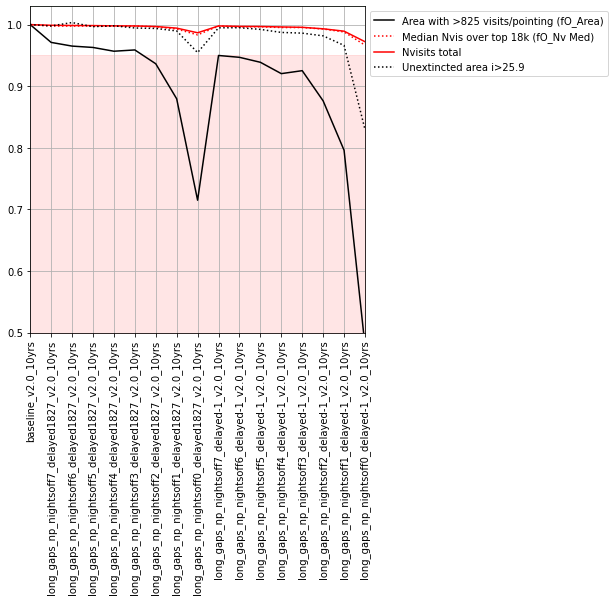

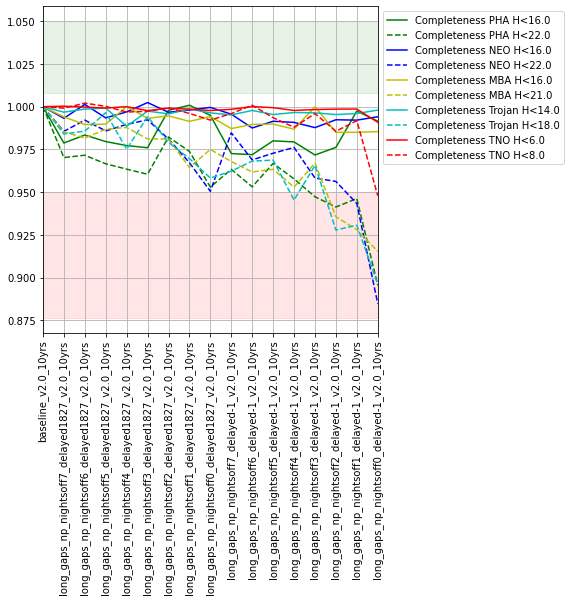

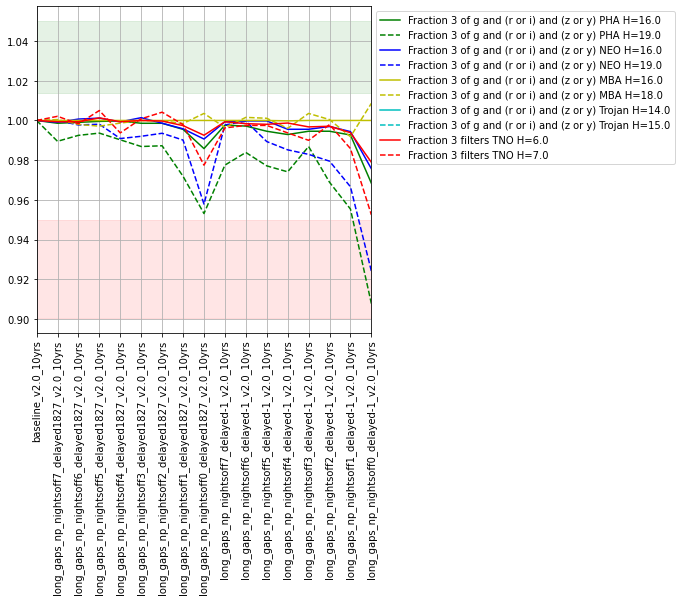

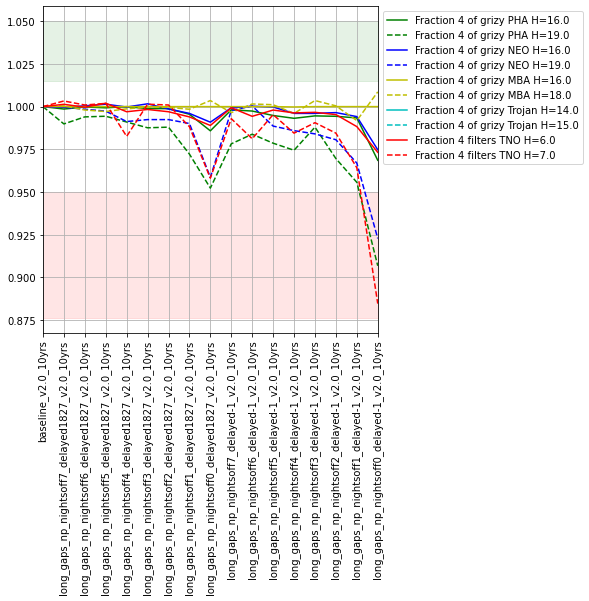

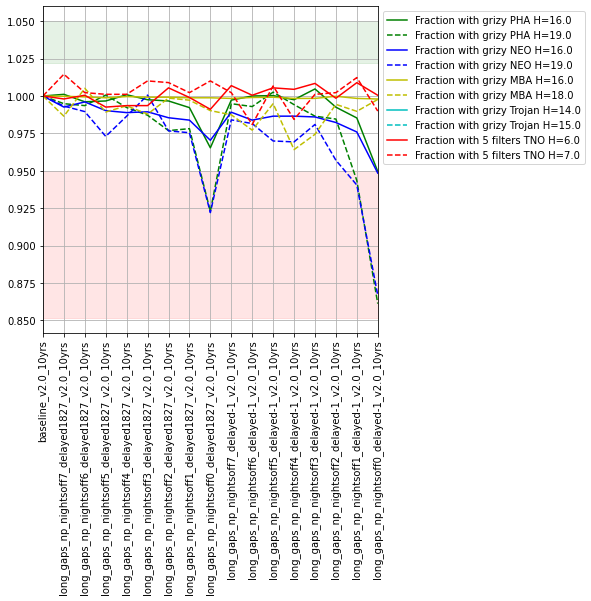

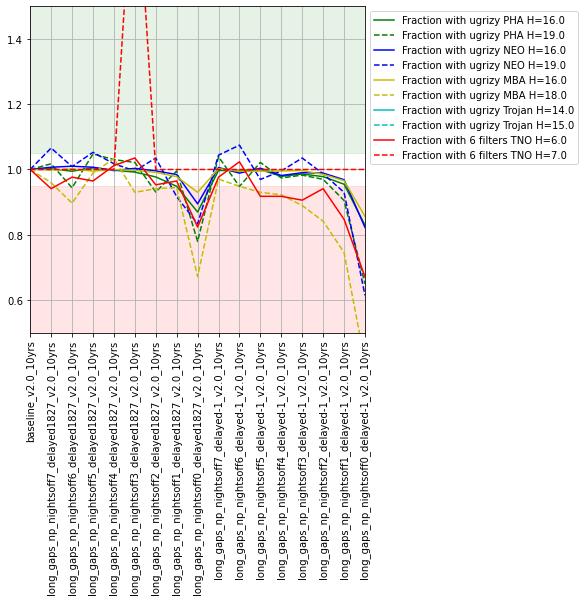

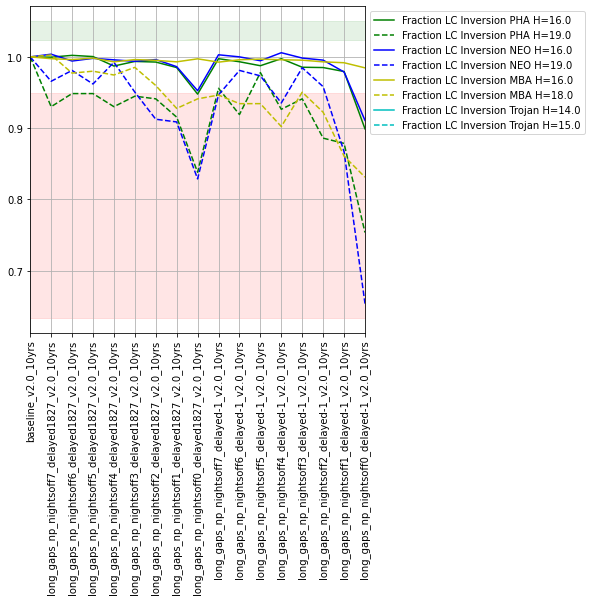

In [169]:
fam = ['long_gaps_nopair']
describe_family(fam)
for mset in sso_metrics:
    d = sso_family(fam, mset)
    IPython.display.display(d)

**bluer** : The standard filter balance in the dust-free WFD in the baseline is {'u': 0.07, 'g': 0.09, 'r': 0.22, 'i': 0.22, 'z': 0.20, 'y': 0.20}. These simulations vary the filter balance, skewing it bluer. One simulation adds visits to g band,while the other adds visits to both u and g band, in each case by taking some visits from rizy.

**long_u** : The baseline survey uses 2x15s visits for all bands except u band. In the baseline, u band visits are 1x30s to reduce the effects of readnoise (which are most extreme in u, due to the low sky-background). These simulations extend the u band visit time further, to 1x50s. In one simulation, the total amount of survey time spent on u band is kept the same, so the number of visits is reduced accordingly. In the other simulation, more survey time is spent in u band in order to maintain the number of visits in u.

Area with >825 visits/pointing (fO_Area)  \
run                                                                
baseline_v2.0_10yrs                                 12893.228978   
bluer_indx0_v2.0_10yrs                              12849.585708   
bluer_indx1_v2.0_10yrs                              12876.443105   
long_u1_v2.0_10yrs                                  17197.966084   
long_u2_v2.0_10yrs                                  15840.828260   

                        Unextincted area i>25.9  Nvisits total  \
run                                                              
baseline_v2.0_10yrs                16711.175770      2086980.0   
bluer_indx0_v2.0_10yrs             16155.563377      2088051.0   
bluer_indx1_v2.0_10yrs             16210.117464      2089107.0   
long_u1_v2.0_10yrs                 16420.780169      2021286.0   
long_u2_v2.0_10yrs                 16687.675548      2040731.0   

                        Median Nvis over top 18k (fO_Nv Med)  \
run                                                            
baseline_v2.0_10yrs                                    839.0   
bluer_indx0_v2.0_10yrs                                 839.0   
bluer_indx1_v2.0_10yrs                                 839.0   
long_u1_v2.0_10yrs                                     866.0   
long_u2_v2.0_10yrs                                     854.0   

                        Median Nvis u band  Median Nvis g band  \
run                                                              
baseline_v2.0_10yrs                   54.0                70.0   
bluer_indx0_v2.0_10yrs                53.0                94.0   
bluer_indx1_v2.0_10yrs                61.0                86.0   
long_u1_v2.0_10yrs                    52.0                67.0   
long_u2_v2.0_10yrs                    33.0                70.0   

                        Median Nvis r band  Median Nvis i band  \
run                                                              
baseline_v2.0_10yrs                  178.0               180.0   
bluer_indx0_v2.0_10yrs               170.0               171.0   
bluer_indx1_v2.0_10yrs               170.0               171.0   
long_u1_v2.0_10yrs                   171.0               174.0   
long_u2_v2.0_10yrs                   177.0               181.0   

                        Median Nvis z band  Median Nvis y band  \
run                                                              
baseline_v2.0_10yrs                  160.0               166.0   
bluer_indx0_v2.0_10yrs               152.0               166.0   
bluer_indx1_v2.0_10yrs               152.0               167.0   
long_u1_v2.0_10yrs                   155.0               161.0   
long_u2_v2.0_10yrs                   160.0               167.0   

                                                                  Briefly  
run                                                                        
baseline_v2.0_10yrs                                         v2.0 baseline  
bluer_indx0_v2.0_10yrs  More g - filter ratio in WFD of {'u': 0.07, 'g...  
bluer_indx1_v2.0_10yrs  More u and g - filter ratio in WFD of {'u': 0....  
long_u1_v2.0_10yrs      u band visits 1x50s, number of u visits same a...  
long_u2_v2.0_10yrs          u band visits 1x50s, fewer number of u visits

short_name              Completeness PHA H<16.0  Completeness PHA H<22.0  \
run                                                                        
baseline_v2.0_10yrs                      0.9404                 0.589618   
bluer_indx0_v2.0_10yrs                   0.9382                 0.590292   
bluer_indx1_v2.0_10yrs                   0.9406                 0.587108   
long_u1_v2.0_10yrs                       0.9242                 0.575762   
long_u2_v2.0_10yrs                       0.9208                 0.580722   

short_name              Completeness NEO H<16.0  Completeness NEO H<22.0  \
run                                                                        
baseline_v2.0_10yrs                      0.9138                 0.565072   
bluer_indx0_v2.0_10yrs                   0.9102                 0.560075   
bluer_indx1_v2.0_10yrs                   0.9074                 0.553286   
long_u1_v2.0_10yrs                       0.9126                 0.557753   
long_u2_v2.0_10yrs                       0.9170                 0.573240   

short_name              Completeness MBA H<16.0  Completeness MBA H<21.0  \
run                                                                        
baseline_v2.0_10yrs                    1.000000                 0.536388   
bluer_indx0_v2.0_10yrs                 1.000000                 0.529990   
bluer_indx1_v2.0_10yrs                 0.996599                 0.524482   
long_u1_v2.0_10yrs                     0.990598                 0.524645   
long_u2_v2.0_10yrs                     1.000000                 0.541587   

short_name              Completeness Trojan H<14.0  \
run                                                  
baseline_v2.0_10yrs                         0.9958   
bluer_indx0_v2.0_10yrs                      0.9948   
bluer_indx1_v2.0_10yrs                      0.9958   
long_u1_v2.0_10yrs                          0.9930   
long_u2_v2.0_10yrs                          0.9948   

short_name              Completeness Trojan H<18.0  Completeness TNO H<6.0  \
run                                                                          
baseline_v2.0_10yrs                       0.425381                0.695976   
bluer_indx0_v2.0_10yrs                    0.418319                0.693743   
bluer_indx1_v2.0_10yrs                    0.410554                0.696328   
long_u1_v2.0_10yrs                        0.420846                0.695451   
long_u2_v2.0_10yrs                        0.432339                0.695742   

short_name              Completeness TNO H<8.0  
run                                             
baseline_v2.0_10yrs                   0.471819  
bluer_indx0_v2.0_10yrs                0.465246  
bluer_indx1_v2.0_10yrs                0.468987  
long_u1_v2.0_10yrs                    0.468040  
long_u2_v2.0_10yrs                    0.472711

short_name              Fraction 3 of g and (r or i) and (z or y) PHA H=16.0  \
run                                                                            
baseline_v2.0_10yrs                                                0.8468      
bluer_indx0_v2.0_10yrs                                             0.8478      
bluer_indx1_v2.0_10yrs                                             0.8456      
long_u1_v2.0_10yrs                                                 0.8396      
long_u2_v2.0_10yrs                                                 0.8478      

short_name              Fraction 3 of g and (r or i) and (z or y) PHA H=19.0  \
run                                                                            
baseline_v2.0_10yrs                                                0.5332      
bluer_indx0_v2.0_10yrs                                             0.5480      
bluer_indx1_v2.0_10yrs                                             0.5406      
long_u1_v2.0_10yrs                                                 0.5124      
long_u2_v2.0_10yrs                                                 0.5330      

short_name              Fraction 3 of g and (r or i) and (z or y) NEO H=16.0  \
run                                                                            
baseline_v2.0_10yrs                                                0.8552      
bluer_indx0_v2.0_10yrs                                             0.8614      
bluer_indx1_v2.0_10yrs                                             0.8548      
long_u1_v2.0_10yrs                                                 0.8514      
long_u2_v2.0_10yrs                                                 0.8562      

short_name              Fraction 3 of g and (r or i) and (z or y) NEO H=19.0  \
run                                                                            
baseline_v2.0_10yrs                                                0.5268      
bluer_indx0_v2.0_10yrs                                             0.5488      
bluer_indx1_v2.0_10yrs                                             0.5404      
long_u1_v2.0_10yrs                                                 0.5178      
long_u2_v2.0_10yrs                                                 0.5366      

short_name              Fraction 3 of g and (r or i) and (z or y) MBA H=16.0  \
run                                                                            
baseline_v2.0_10yrs                                                   1.0      
bluer_indx0_v2.0_10yrs                                                1.0      
bluer_indx1_v2.0_10yrs                                                1.0      
long_u1_v2.0_10yrs                                                    1.0      
long_u2_v2.0_10yrs                                                    1.0      

short_name              Fraction 3 of g and (r or i) and (z or y) MBA H=18.0  \
run                                                                            
baseline_v2.0_10yrs                                              0.903581      
bluer_indx0_v2.0_10yrs                                           0.902781      
bluer_indx1_v2.0_10yrs                                           0.897980      
long_u1_v2.0_10yrs                                               0.896379      
long_u2_v2.0_10yrs                                               0.900380      

short_name              Fraction 3 of g and (r or i) and (z or y) Trojan H=14.0  \
run                                                                               
baseline_v2.0_10yrs                                                0.9904         
bluer_indx0_v2.0_10yrs                                                NaN         
bluer_indx1_v2.0_10yrs                                                NaN         
long_u1_v2.0_10yrs                                                    NaN         
long_u2_v2.0_10yrs                                                    NaN         

short_name              Fraction 3 of g and (r or i)

short_name              Fraction 4 of grizy PHA H=16.0  \
run                                                      
baseline_v2.0_10yrs                             0.8462   
bluer_indx0_v2.0_10yrs                          0.8470   
bluer_indx1_v2.0_10yrs                          0.8452   
long_u1_v2.0_10yrs                              0.8396   
long_u2_v2.0_10yrs                              0.8478   

short_name              Fraction 4 of grizy PHA H=19.0  \
run                                                      
baseline_v2.0_10yrs                             0.5322   
bluer_indx0_v2.0_10yrs                          0.5468   
bluer_indx1_v2.0_10yrs                          0.5398   
long_u1_v2.0_10yrs                              0.5118   
long_u2_v2.0_10yrs                              0.5328   

short_name              Fraction 4 of grizy NEO H=16.0  \
run                                                      
baseline_v2.0_10yrs                             0.8548   
bluer_indx0_v2.0_10yrs                          0.8598   
bluer_indx1_v2.0_10yrs                          0.8540   
long_u1_v2.0_10yrs                              0.8512   
long_u2_v2.0_10yrs                              0.8560   

short_name              Fraction 4 of grizy NEO H=19.0  \
run                                                      
baseline_v2.0_10yrs                             0.5260   
bluer_indx0_v2.0_10yrs                          0.5476   
bluer_indx1_v2.0_10yrs                          0.5394   
long_u1_v2.0_10yrs                              0.5176   
long_u2_v2.0_10yrs                              0.5366   

short_name              Fraction 4 of grizy MBA H=16.0  \
run                                                      
baseline_v2.0_10yrs                                1.0   
bluer_indx0_v2.0_10yrs                             1.0   
bluer_indx1_v2.0_10yrs                             1.0   
long_u1_v2.0_10yrs                                 1.0   
long_u2_v2.0_10yrs                                 1.0   

short_name              Fraction 4 of grizy MBA H=18.0  \
run                                                      
baseline_v2.0_10yrs                           0.903581   
bluer_indx0_v2.0_10yrs                        0.902781   
bluer_indx1_v2.0_10yrs                        0.897980   
long_u1_v2.0_10yrs                            0.896379   
long_u2_v2.0_10yrs                            0.900380   

short_name              Fraction 4 of grizy Trojan H=14.0  \
run                                                         
baseline_v2.0_10yrs                                0.9904   
bluer_indx0_v2.0_10yrs                                NaN   
bluer_indx1_v2.0_10yrs                                NaN   
long_u1_v2.0_10yrs                                    NaN   
long_u2_v2.0_10yrs                                    NaN   

short_name              Fraction 4 of grizy Trojan H=15.0  \
run                                                         
baseline_v2.0_10yrs                                  0.99   
bluer_indx0_v2.0_10yrs                                NaN   
bluer_indx1_v2.0_10yrs                                NaN   
long_u1_v2.0_10yrs                                    NaN   
long_u2_v2.0_10yrs                                    NaN   

short_name              Fraction 4 filters TNO H=6.0  \
run                                                    
baseline_v2.0_10yrs                           0.5978   
bluer_indx0_v2.0_10yrs                        0.5990   
bluer_indx1_v2.0_10yrs                        0.5990   
long_u1_v2.0_10yrs                            0.5962   
long_u2_v2.0_10yrs                            0.5992   

short_name              Fraction 4 filters TNO H=7.0  
run                                                   
baseline_v2.0_10yrs                           0.4248  
bluer_indx0_v2.0_10yrs                        0.4260  
bluer_indx1_v2.0_10yrs                        0.4250  
long_u1_v2.0_10yrs                

short_name              Fraction with grizy PHA H=16.0  \
run                                                      
baseline_v2.0_10yrs                             0.7216   
bluer_indx0_v2.0_10yrs                          0.7526   
bluer_indx1_v2.0_10yrs                          0.7424   
long_u1_v2.0_10yrs                              0.7158   
long_u2_v2.0_10yrs                              0.7260   

short_name              Fraction with grizy PHA H=19.0  \
run                                                      
baseline_v2.0_10yrs                             0.3112   
bluer_indx0_v2.0_10yrs                          0.3384   
bluer_indx1_v2.0_10yrs                          0.3274   
long_u1_v2.0_10yrs                              0.3006   
long_u2_v2.0_10yrs                              0.3152   

short_name              Fraction with grizy NEO H=16.0  \
run                                                      
baseline_v2.0_10yrs                             0.7564   
bluer_indx0_v2.0_10yrs                          0.7790   
bluer_indx1_v2.0_10yrs                          0.7676   
long_u1_v2.0_10yrs                              0.7462   
long_u2_v2.0_10yrs                              0.7590   

short_name              Fraction with grizy NEO H=19.0  \
run                                                      
baseline_v2.0_10yrs                             0.3258   
bluer_indx0_v2.0_10yrs                          0.3464   
bluer_indx1_v2.0_10yrs                          0.3380   
long_u1_v2.0_10yrs                              0.3090   
long_u2_v2.0_10yrs                              0.3312   

short_name              Fraction with grizy MBA H=16.0  \
run                                                      
baseline_v2.0_10yrs                           0.996599   
bluer_indx0_v2.0_10yrs                        0.995199   
bluer_indx1_v2.0_10yrs                        0.995599   
long_u1_v2.0_10yrs                            0.994399   
long_u2_v2.0_10yrs                            0.995599   

short_name              Fraction with grizy MBA H=18.0  \
run                                                      
baseline_v2.0_10yrs                           0.429486   
bluer_indx0_v2.0_10yrs                        0.428886   
bluer_indx1_v2.0_10yrs                        0.421484   
long_u1_v2.0_10yrs                            0.416283   
long_u2_v2.0_10yrs                            0.421684   

short_name              Fraction with grizy Trojan H=14.0  \
run                                                         
baseline_v2.0_10yrs                                0.9898   
bluer_indx0_v2.0_10yrs                                NaN   
bluer_indx1_v2.0_10yrs                                NaN   
long_u1_v2.0_10yrs                                    NaN   
long_u2_v2.0_10yrs                                    NaN   

short_name              Fraction with grizy Trojan H=15.0  \
run                                                         
baseline_v2.0_10yrs                                0.5506   
bluer_indx0_v2.0_10yrs                                NaN   
bluer_indx1_v2.0_10yrs                                NaN   
long_u1_v2.0_10yrs                                    NaN   
long_u2_v2.0_10yrs                                    NaN   

short_name              Fraction with 5 filters TNO H=6.0  \
run                                                         
baseline_v2.0_10yrs                                0.4042   
bluer_indx0_v2.0_10yrs                             0.4030   
bluer_indx1_v2.0_10yrs                             0.4042   
long_u1_v2.0_10yrs                                 0.4050   
long_u2_v2.0_10yrs                                 0.4060   

short_name              Fraction with 5 filters TNO H=7.0  
run                                                        
baseline_v2.0_10yrs                                0.1786  
bluer_indx0_v2.0_10yrs                             0.1792  
bluer_indx1_v2.0_10yrs            

short_name              Fraction with ugrizy PHA H=16.0  \
run                                                       
baseline_v2.0_10yrs                              0.4458   
bluer_indx0_v2.0_10yrs                           0.4520   
bluer_indx1_v2.0_10yrs                           0.5026   
long_u1_v2.0_10yrs                               0.4838   
long_u2_v2.0_10yrs                               0.2826   

short_name              Fraction with ugrizy PHA H=19.0  \
run                                                       
baseline_v2.0_10yrs                              0.0462   
bluer_indx0_v2.0_10yrs                           0.0468   
bluer_indx1_v2.0_10yrs                           0.0640   
long_u1_v2.0_10yrs                               0.0588   
long_u2_v2.0_10yrs                               0.0230   

short_name              Fraction with ugrizy NEO H=16.0  \
run                                                       
baseline_v2.0_10yrs                              0.4648   
bluer_indx0_v2.0_10yrs                           0.4680   
bluer_indx1_v2.0_10yrs                           0.5260   
long_u1_v2.0_10yrs                               0.4954   
long_u2_v2.0_10yrs                               0.2874   

short_name              Fraction with ugrizy NEO H=19.0  \
run                                                       
baseline_v2.0_10yrs                              0.0456   
bluer_indx0_v2.0_10yrs                           0.0458   
bluer_indx1_v2.0_10yrs                           0.0624   
long_u1_v2.0_10yrs                               0.0612   
long_u2_v2.0_10yrs                               0.0218   

short_name              Fraction with ugrizy MBA H=16.0  \
run                                                       
baseline_v2.0_10yrs                            0.894779   
bluer_indx0_v2.0_10yrs                         0.897179   
bluer_indx1_v2.0_10yrs                         0.922785   
long_u1_v2.0_10yrs                             0.941588   
long_u2_v2.0_10yrs                             0.720544   

short_name              Fraction with ugrizy MBA H=18.0  \
run                                                       
baseline_v2.0_10yrs                            0.054211   
bluer_indx0_v2.0_10yrs                         0.053811   
bluer_indx1_v2.0_10yrs                         0.060612   
long_u1_v2.0_10yrs                             0.117223   
long_u2_v2.0_10yrs                             0.039208   

short_name              Fraction with ugrizy Trojan H=14.0  \
run                                                          
baseline_v2.0_10yrs                                 0.9178   
bluer_indx0_v2.0_10yrs                                 NaN   
bluer_indx1_v2.0_10yrs                                 NaN   
long_u1_v2.0_10yrs                                     NaN   
long_u2_v2.0_10yrs                                     NaN   

short_name              Fraction with ugrizy Trojan H=15.0  \
run                                                          
baseline_v2.0_10yrs                                 0.0052   
bluer_indx0_v2.0_10yrs                                 NaN   
bluer_indx1_v2.0_10yrs                                 NaN   
long_u1_v2.0_10yrs                                     NaN   
long_u2_v2.0_10yrs                                     NaN   

short_name              Fraction with 6 filters TNO H=6.0  \
run                                                         
baseline_v2.0_10yrs                                0.0170   
bluer_indx0_v2.0_10yrs                             0.0166   
bluer_indx1_v2.0_10yrs                             0.0172   
long_u1_v2.0_10yrs                                 0.0484   
long_u2_v2.0_10yrs                                 0.0308   

short_name              Fraction with 6 filters TNO H=7.0  
run                                                        
baseline_v2.0_10yrs                                0.0002  
bluer_indx0_v2.0_10yrs                

short_name              Fraction LC Inversion PHA H=16.0  \
run                                                        
baseline_v2.0_10yrs                               0.4674   
bluer_indx0_v2.0_10yrs                            0.4522   
bluer_indx1_v2.0_10yrs                            0.4534   
long_u1_v2.0_10yrs                                0.4518   
long_u2_v2.0_10yrs                                0.4656   

short_name              Fraction LC Inversion PHA H=19.0  \
run                                                        
baseline_v2.0_10yrs                               0.0544   
bluer_indx0_v2.0_10yrs                            0.0444   
bluer_indx1_v2.0_10yrs                            0.0466   
long_u1_v2.0_10yrs                                0.0458   
long_u2_v2.0_10yrs                                0.0506   

short_name              Fraction LC Inversion NEO H=16.0  \
run                                                        
baseline_v2.0_10yrs                               0.4804   
bluer_indx0_v2.0_10yrs                            0.4638   
bluer_indx1_v2.0_10yrs                            0.4650   
long_u1_v2.0_10yrs                                0.4640   
long_u2_v2.0_10yrs                                0.4874   

short_name              Fraction LC Inversion NEO H=19.0  \
run                                                        
baseline_v2.0_10yrs                               0.0526   
bluer_indx0_v2.0_10yrs                            0.0458   
bluer_indx1_v2.0_10yrs                            0.0468   
long_u1_v2.0_10yrs                                0.0460   
long_u2_v2.0_10yrs                                0.0482   

short_name              Fraction LC Inversion MBA H=16.0  \
run                                                        
baseline_v2.0_10yrs                             0.947990   
bluer_indx0_v2.0_10yrs                          0.934787   
bluer_indx1_v2.0_10yrs                          0.936187   
long_u1_v2.0_10yrs                              0.935387   
long_u2_v2.0_10yrs                              0.944389   

short_name              Fraction LC Inversion MBA H=18.0  \
run                                                        
baseline_v2.0_10yrs                             0.149430   
bluer_indx0_v2.0_10yrs                          0.135027   
bluer_indx1_v2.0_10yrs                          0.127425   
long_u1_v2.0_10yrs                              0.129226   
long_u2_v2.0_10yrs                              0.147630   

short_name              Fraction LC Inversion Trojan H=14.0  \
run                                                           
baseline_v2.0_10yrs                                  0.9276   
bluer_indx0_v2.0_10yrs                                  NaN   
bluer_indx1_v2.0_10yrs                                  NaN   
long_u1_v2.0_10yrs                                      NaN   
long_u2_v2.0_10yrs                                      NaN   

short_name              Fraction LC Inversion Trojan H=15.0  
run                                                          
baseline_v2.0_10yrs                                   0.112  
bluer_indx0_v2.0_10yrs                                  NaN  
bluer_indx1_v2.0_10yrs                                  NaN  
long_u1_v2.0_10yrs                                      NaN  
long_u2_v2.0_10yrs                                      NaN

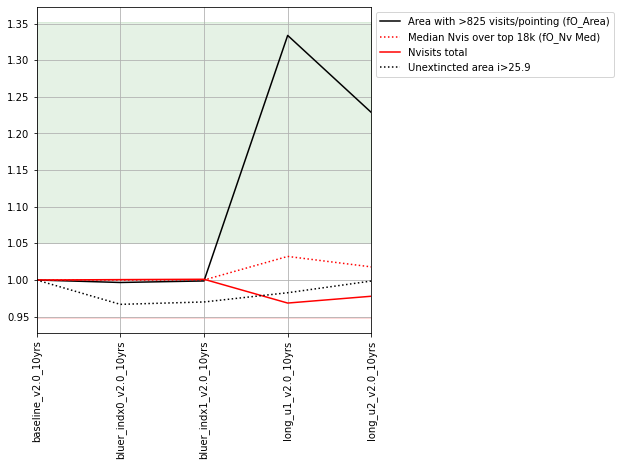

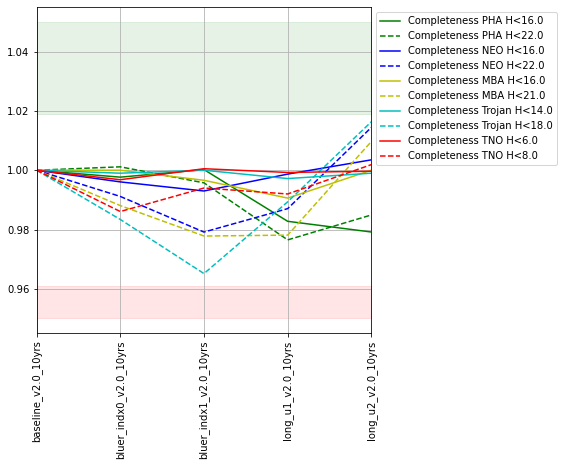

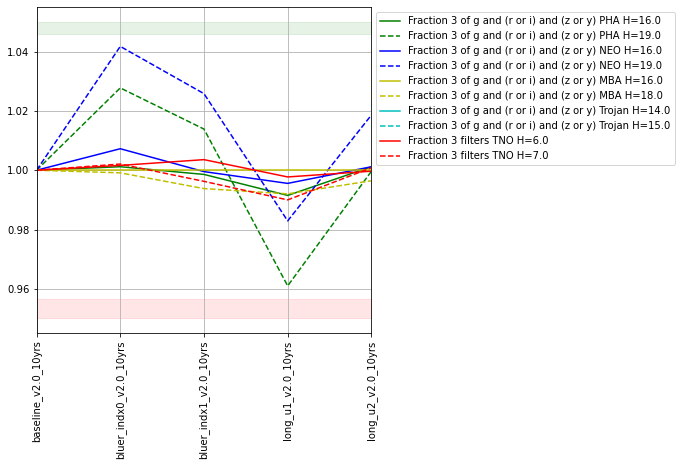

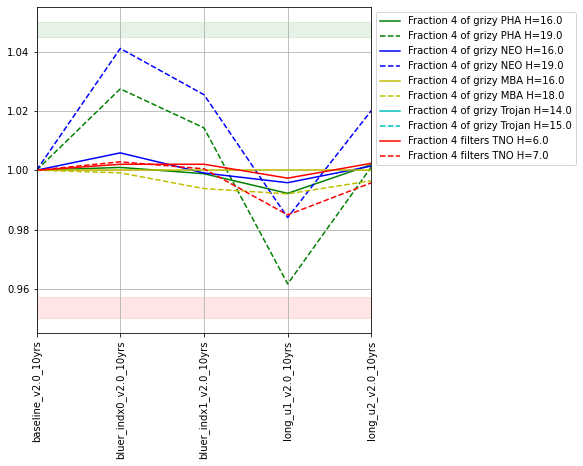

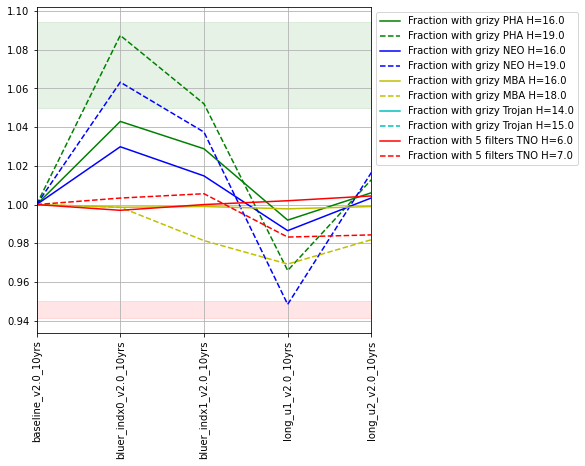

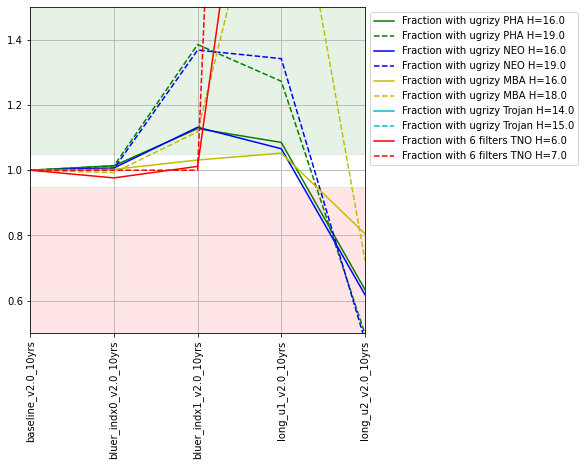

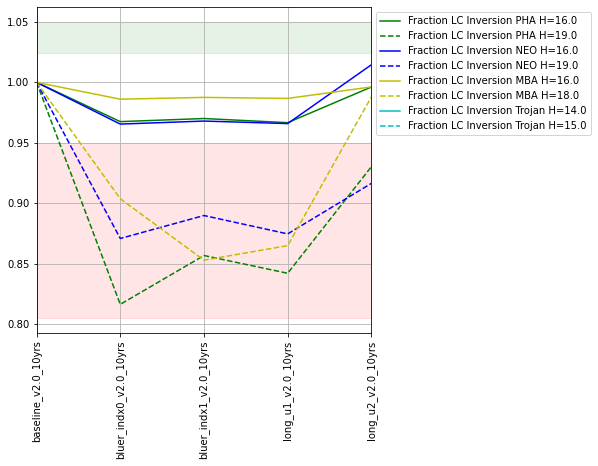

In [170]:
fam = ['bluer', 'long_u']
describe_family(fam)
for mset in sso_metrics:
    d = sso_family(fam, mset)
    IPython.display.display(d)

**vary_gp** : These simulations investigate the effect of varying the amount of survey time spent on covering the background (non-WFD-level) Galactic Plane area. The baseline characteristics, including the ratio of visits over the remainder of the footprint, are kept the same.

Area with >825 visits/pointing (fO_Area)  \
run                                                                       
baseline_v2.0_10yrs                                        12893.228978   
vary_gp_gpfrac0.01_v2.0_10yrs                              16736.354579   
vary_gp_gpfrac0.05_v2.0_10yrs                              16665.014619   
vary_gp_gpfrac0.10_v2.0_10yrs                              16511.423882   
vary_gp_gpfrac0.15_v2.0_10yrs                              15621.772618   
vary_gp_gpfrac0.20_v2.0_10yrs                              14733.799942   
vary_gp_gpfrac0.25_v2.0_10yrs                              13427.019736   
vary_gp_gpfrac0.30_v2.0_10yrs                              11804.665120   
vary_gp_gpfrac0.35_v2.0_10yrs                               9751.752864   
vary_gp_gpfrac0.40_v2.0_10yrs                               7674.501092   
vary_gp_gpfrac0.45_v2.0_10yrs                               5786.929684   
vary_gp_gpfrac0.50_v2.0_10yrs                               3880.054522   
vary_gp_gpfrac0.55_v2.0_10yrs                               2317.289754   
vary_gp_gpfrac0.75_v2.0_10yrs                                211.501999   
vary_gp_gpfrac1.00_v2.0_10yrs                                118.340404   

                               Unextincted area i>25.9  Nvisits total  \
run                                                                     
baseline_v2.0_10yrs                       16711.175770      2086980.0   
vary_gp_gpfrac0.01_v2.0_10yrs             16818.605356      2088147.0   
vary_gp_gpfrac0.05_v2.0_10yrs             16706.140008      2088534.0   
vary_gp_gpfrac0.10_v2.0_10yrs             16810.212420      2088477.0   
vary_gp_gpfrac0.15_v2.0_10yrs             16739.711754      2088838.0   
vary_gp_gpfrac0.20_v2.0_10yrs             16736.354579      2088077.0   
vary_gp_gpfrac0.25_v2.0_10yrs             16636.478635      2088389.0   
vary_gp_gpfrac0.30_v2.0_10yrs             16665.014619      2087314.0   
vary_gp_gpfrac0.35_v2.0_10yrs             16700.264952      2086873.0   
vary_gp_gpfrac0.40_v2.0_10yrs             16560.942207      2086160.0   
vary_gp_gpfrac0.45_v2.0_10yrs             16477.012843      2085954.0   
vary_gp_gpfrac0.50_v2.0_10yrs             16497.155890      2085679.0   
vary_gp_gpfrac0.55_v2.0_10yrs             16455.191208      2085386.0   
vary_gp_gpfrac0.75_v2.0_10yrs             16052.330258      2084363.0   
vary_gp_gpfrac1.00_v2.0_10yrs             15737.595141      2084391.0   

                               Median Nvis over top 18k (fO_Nv Med)  \
run                                                                   
baseline_v2.0_10yrs                                           839.0   
vary_gp_gpfrac0.01_v2.0_10yrs                                 861.0   
vary_gp_gpfrac0.05_v2.0_10yrs                                 861.0   
vary_gp_gpfrac0.10_v2.0_10yrs                                 859.0   
vary_gp_gpfrac0.15_v2.0_10yrs                                 853.0   
vary_gp_gpfrac0.20_v2.0_10yrs                                 847.0   
vary_gp_gpfrac0.25_v2.0_10yrs                                 841.0   
vary_gp_gpfrac0.30_v2.0_10yrs                                 834.0   
vary_gp_gpfrac0.35_v2.0_10yrs                                 827.0   
vary_gp_gpfrac0.40_v2.0_10yrs                                 820.0   
vary_gp_gpfrac0.45_v2.0_10yrs                                 812.0   
vary_gp_gpfrac0.50_v2.0_10yrs                                 804.0   
vary_gp_gpfrac0.55_v2.0_10yrs                                 796.0   
vary_gp_gpfrac0.75_v2.0_10yrs                                 762.0   
vary_gp_gpfrac1.00_v2.0_10yrs                                 733.0   

                               Median Nvis u band  Median Nvis g band  \
run                                                                     
baseline_v2.0_10yrs                          54.0                70.0   
vary_gp_gpfrac0.01_v2.0_10yrs                55.0                71.0   
vary_gp_gpfra

short_name                     Completeness PHA H<16.0  \
run                                                      
baseline_v2.0_10yrs                             0.9404   
vary_gp_gpfrac0.01_v2.0_10yrs                   0.9216   
vary_gp_gpfrac0.05_v2.0_10yrs                   0.9274   
vary_gp_gpfrac0.10_v2.0_10yrs                   0.9298   
vary_gp_gpfrac0.15_v2.0_10yrs                   0.9258   
vary_gp_gpfrac0.20_v2.0_10yrs                   0.9222   
vary_gp_gpfrac0.25_v2.0_10yrs                   0.9174   
vary_gp_gpfrac0.30_v2.0_10yrs                   0.9310   
vary_gp_gpfrac0.35_v2.0_10yrs                   0.9244   
vary_gp_gpfrac0.40_v2.0_10yrs                   0.9212   
vary_gp_gpfrac0.45_v2.0_10yrs                   0.9192   
vary_gp_gpfrac0.50_v2.0_10yrs                   0.9222   
vary_gp_gpfrac0.55_v2.0_10yrs                   0.9240   
vary_gp_gpfrac0.75_v2.0_10yrs                   0.9246   
vary_gp_gpfrac1.00_v2.0_10yrs                   0.9054   

short_name                     Completeness PHA H<22.0  \
run                                                      
baseline_v2.0_10yrs                           0.589618   
vary_gp_gpfrac0.01_v2.0_10yrs                 0.573893   
vary_gp_gpfrac0.05_v2.0_10yrs                 0.577124   
vary_gp_gpfrac0.10_v2.0_10yrs                 0.577580   
vary_gp_gpfrac0.15_v2.0_10yrs                 0.578116   
vary_gp_gpfrac0.20_v2.0_10yrs                 0.577955   
vary_gp_gpfrac0.25_v2.0_10yrs                 0.569762   
vary_gp_gpfrac0.30_v2.0_10yrs                 0.582197   
vary_gp_gpfrac0.35_v2.0_10yrs                 0.577767   
vary_gp_gpfrac0.40_v2.0_10yrs                 0.573340   
vary_gp_gpfrac0.45_v2.0_10yrs                 0.570131   
vary_gp_gpfrac0.50_v2.0_10yrs                 0.575165   
vary_gp_gpfrac0.55_v2.0_10yrs                 0.575283   
vary_gp_gpfrac0.75_v2.0_10yrs                 0.584027   
vary_gp_gpfrac1.00_v2.0_10yrs                 0.573064   

short_name                     Completeness NEO H<16.0  \
run                                                      
baseline_v2.0_10yrs                             0.9138   
vary_gp_gpfrac0.01_v2.0_10yrs                   0.9178   
vary_gp_gpfrac0.05_v2.0_10yrs                   0.9184   
vary_gp_gpfrac0.10_v2.0_10yrs                   0.9150   
vary_gp_gpfrac0.15_v2.0_10yrs                   0.9126   
vary_gp_gpfrac0.20_v2.0_10yrs                   0.9058   
vary_gp_gpfrac0.25_v2.0_10yrs                   0.9162   
vary_gp_gpfrac0.30_v2.0_10yrs                   0.9106   
vary_gp_gpfrac0.35_v2.0_10yrs                   0.9044   
vary_gp_gpfrac0.40_v2.0_10yrs                   0.9182   
vary_gp_gpfrac0.45_v2.0_10yrs                   0.9066   
vary_gp_gpfrac0.50_v2.0_10yrs                   0.9028   
vary_gp_gpfrac0.55_v2.0_10yrs                   0.9026   
vary_gp_gpfrac0.75_v2.0_10yrs                   0.9104   
vary_gp_gpfrac1.00_v2.0_10yrs                   0.9082   

short_name                     Completeness NEO H<22.0  \
run                                                      
baseline_v2.0_10yrs                           0.565072   
vary_gp_gpfrac0.01_v2.0_10yrs                 0.565756   
vary_gp_gpfrac0.05_v2.0_10yrs                 0.569436   
vary_gp_gpfrac0.10_v2.0_10yrs                 0.566817   
vary_gp_gpfrac0.15_v2.0_10yrs                 0.561015   
vary_gp_gpfrac0.20_v2.0_10yrs                 0.559394   
vary_gp_gpfrac0.25_v2.0_10yrs                 0.563601   
vary_gp_gpfrac0.30_v2.0_10yrs                 0.563203   
vary_gp_gpfrac0.35_v2.0_10yrs                 0.556139   
vary_gp_gpfrac0.40_v2.0_10yrs                 0.566306   
vary_gp_gpfrac0.45_v2.0_10yrs                 0.559734   
vary_gp_gpfrac0.50_v2.0_10yrs                 0.555556   
vary_gp_gpfrac0.55_v2.0_10yrs                 0.558215   
vary_gp_gpfrac0.75_v2.0_10yrs                 0.563268   
vary_gp_gpfrac1.00_v2.0_10yrs                 0.569662   

short_name                     Completeness MBA H<16

short_name                     Fraction 3 of g and (r or i) and (z or y) PHA H=16.0  \
run                                                                                   
baseline_v2.0_10yrs                                                       0.8468      
vary_gp_gpfrac0.01_v2.0_10yrs                                             0.8460      
vary_gp_gpfrac0.05_v2.0_10yrs                                             0.8446      
vary_gp_gpfrac0.10_v2.0_10yrs                                             0.8454      
vary_gp_gpfrac0.15_v2.0_10yrs                                             0.8472      
vary_gp_gpfrac0.20_v2.0_10yrs                                             0.8460      
vary_gp_gpfrac0.25_v2.0_10yrs                                             0.8466      
vary_gp_gpfrac0.30_v2.0_10yrs                                             0.8440      
vary_gp_gpfrac0.35_v2.0_10yrs                                             0.8446      
vary_gp_gpfrac0.40_v2.0_10yrs                                             0.8406      
vary_gp_gpfrac0.45_v2.0_10yrs                                             0.8468      
vary_gp_gpfrac0.50_v2.0_10yrs                                             0.8438      
vary_gp_gpfrac0.55_v2.0_10yrs                                             0.8418      
vary_gp_gpfrac0.75_v2.0_10yrs                                             0.8438      
vary_gp_gpfrac1.00_v2.0_10yrs                                             0.8424      

short_name                     Fraction 3 of g and (r or i) and (z or y) PHA H=19.0  \
run                                                                                   
baseline_v2.0_10yrs                                                       0.5332      
vary_gp_gpfrac0.01_v2.0_10yrs                                             0.5300      
vary_gp_gpfrac0.05_v2.0_10yrs                                             0.5312      
vary_gp_gpfrac0.10_v2.0_10yrs                                             0.5310      
vary_gp_gpfrac0.15_v2.0_10yrs                                             0.5370      
vary_gp_gpfrac0.20_v2.0_10yrs                                             0.5260      
vary_gp_gpfrac0.25_v2.0_10yrs                                             0.5334      
vary_gp_gpfrac0.30_v2.0_10yrs                                             0.5294      
vary_gp_gpfrac0.35_v2.0_10yrs                                             0.5322      
vary_gp_gpfrac0.40_v2.0_10yrs                                             0.5272      
vary_gp_gpfrac0.45_v2.0_10yrs                                             0.5308      
vary_gp_gpfrac0.50_v2.0_10yrs                                             0.5324      
vary_gp_gpfrac0.55_v2.0_10yrs                                             0.5280      
vary_gp_gpfrac0.75_v2.0_10yrs                                             0.5304      
vary_gp_gpfrac1.00_v2.0_10yrs                                             0.5308      

short_name                     Fraction 3 of g and (r or i) and (z or y) NEO H=16.0  \
run                                                                                   
baseline_v2.0_10yrs                                                       0.8552      
vary_gp_gpfrac0.01_v2.0_10yrs                                             0.8558      
vary_gp_gpfrac0.05_v2.0_10yrs                                             0.8556      
vary_gp_gpfrac0.10_v2.0_10yrs                                             0.8538      
vary_gp_gpfrac0.15_v2.0_10yrs                                             0.8546      
vary_gp_gpfrac0.20_v2.0_10yrs                                             0.8566      
vary_gp_gpfrac0.25_v2.0_10yrs                                             0.8568      
vary_gp_gpfrac0.30_v2.0_10yrs                                             0.8548      
vary_gp_gpfrac0.35_v2.0_10yrs                                             0.8570      
vary_gp_gpfrac0.40_v2.0_10yrs                                             0.8548   

short_name                     Fraction 4 of grizy PHA H=16.0  \
run                                                             
baseline_v2.0_10yrs                                    0.8462   
vary_gp_gpfrac0.01_v2.0_10yrs                          0.8452   
vary_gp_gpfrac0.05_v2.0_10yrs                          0.8444   
vary_gp_gpfrac0.10_v2.0_10yrs                          0.8454   
vary_gp_gpfrac0.15_v2.0_10yrs                          0.8472   
vary_gp_gpfrac0.20_v2.0_10yrs                          0.8454   
vary_gp_gpfrac0.25_v2.0_10yrs                          0.8466   
vary_gp_gpfrac0.30_v2.0_10yrs                          0.8440   
vary_gp_gpfrac0.35_v2.0_10yrs                          0.8438   
vary_gp_gpfrac0.40_v2.0_10yrs                          0.8404   
vary_gp_gpfrac0.45_v2.0_10yrs                          0.8466   
vary_gp_gpfrac0.50_v2.0_10yrs                          0.8434   
vary_gp_gpfrac0.55_v2.0_10yrs                          0.8410   
vary_gp_gpfrac0.75_v2.0_10yrs                          0.8434   
vary_gp_gpfrac1.00_v2.0_10yrs                          0.8416   

short_name                     Fraction 4 of grizy PHA H=19.0  \
run                                                             
baseline_v2.0_10yrs                                    0.5322   
vary_gp_gpfrac0.01_v2.0_10yrs                          0.5292   
vary_gp_gpfrac0.05_v2.0_10yrs                          0.5310   
vary_gp_gpfrac0.10_v2.0_10yrs                          0.5306   
vary_gp_gpfrac0.15_v2.0_10yrs                          0.5370   
vary_gp_gpfrac0.20_v2.0_10yrs                          0.5254   
vary_gp_gpfrac0.25_v2.0_10yrs                          0.5330   
vary_gp_gpfrac0.30_v2.0_10yrs                          0.5292   
vary_gp_gpfrac0.35_v2.0_10yrs                          0.5314   
vary_gp_gpfrac0.40_v2.0_10yrs                          0.5258   
vary_gp_gpfrac0.45_v2.0_10yrs                          0.5306   
vary_gp_gpfrac0.50_v2.0_10yrs                          0.5320   
vary_gp_gpfrac0.55_v2.0_10yrs                          0.5272   
vary_gp_gpfrac0.75_v2.0_10yrs                          0.5300   
vary_gp_gpfrac1.00_v2.0_10yrs                          0.5302   

short_name                     Fraction 4 of grizy NEO H=16.0  \
run                                                             
baseline_v2.0_10yrs                                    0.8548   
vary_gp_gpfrac0.01_v2.0_10yrs                          0.8556   
vary_gp_gpfrac0.05_v2.0_10yrs                          0.8556   
vary_gp_gpfrac0.10_v2.0_10yrs                          0.8532   
vary_gp_gpfrac0.15_v2.0_10yrs                          0.8540   
vary_gp_gpfrac0.20_v2.0_10yrs                          0.8564   
vary_gp_gpfrac0.25_v2.0_10yrs                          0.8568   
vary_gp_gpfrac0.30_v2.0_10yrs                          0.8548   
vary_gp_gpfrac0.35_v2.0_10yrs                          0.8564   
vary_gp_gpfrac0.40_v2.0_10yrs                          0.8546   
vary_gp_gpfrac0.45_v2.0_10yrs                          0.8540   
vary_gp_gpfrac0.50_v2.0_10yrs                          0.8558   
vary_gp_gpfrac0.55_v2.0_10yrs                          0.8528   
vary_gp_gpfrac0.75_v2.0_10yrs                          0.8554   
vary_gp_gpfrac1.00_v2.0_10yrs                          0.8572   

short_name                     Fraction 4 of grizy NEO H=19.0  \
run                                                             
baseline_v2.0_10yrs                                    0.5260   
vary_gp_gpfrac0.01_v2.0_10yrs                          0.5306   
vary_gp_gpfrac0.05_v2.0_10yrs                          0.5340   
vary_gp_gpfrac0.10_v2.0_10yrs                          0.5288   
vary_gp_gpfrac0.15_v2.0_10yrs                          0.5270   
vary_gp_gpfrac0.20_v2.0_10yrs                          0.5312   
vary_gp_gpfrac0.25_v2.0_10yrs                          0.5286   
vary_gp_gpfrac0.30_v2.0_10yrs                          0.5274   
vary_gp_gpfrac0.35_v2.0_10yrs   

short_name                     Fraction with grizy PHA H=16.0  \
run                                                             
baseline_v2.0_10yrs                                    0.7216   
vary_gp_gpfrac0.01_v2.0_10yrs                          0.7200   
vary_gp_gpfrac0.05_v2.0_10yrs                          0.7246   
vary_gp_gpfrac0.10_v2.0_10yrs                          0.7226   
vary_gp_gpfrac0.15_v2.0_10yrs                          0.7236   
vary_gp_gpfrac0.20_v2.0_10yrs                          0.7250   
vary_gp_gpfrac0.25_v2.0_10yrs                          0.7216   
vary_gp_gpfrac0.30_v2.0_10yrs                          0.7228   
vary_gp_gpfrac0.35_v2.0_10yrs                          0.7264   
vary_gp_gpfrac0.40_v2.0_10yrs                          0.7250   
vary_gp_gpfrac0.45_v2.0_10yrs                          0.7210   
vary_gp_gpfrac0.50_v2.0_10yrs                          0.7226   
vary_gp_gpfrac0.55_v2.0_10yrs                          0.7244   
vary_gp_gpfrac0.75_v2.0_10yrs                          0.7230   
vary_gp_gpfrac1.00_v2.0_10yrs                          0.7218   

short_name                     Fraction with grizy PHA H=19.0  \
run                                                             
baseline_v2.0_10yrs                                    0.3112   
vary_gp_gpfrac0.01_v2.0_10yrs                          0.3126   
vary_gp_gpfrac0.05_v2.0_10yrs                          0.3186   
vary_gp_gpfrac0.10_v2.0_10yrs                          0.3158   
vary_gp_gpfrac0.15_v2.0_10yrs                          0.3134   
vary_gp_gpfrac0.20_v2.0_10yrs                          0.3176   
vary_gp_gpfrac0.25_v2.0_10yrs                          0.3136   
vary_gp_gpfrac0.30_v2.0_10yrs                          0.3108   
vary_gp_gpfrac0.35_v2.0_10yrs                          0.3134   
vary_gp_gpfrac0.40_v2.0_10yrs                          0.3072   
vary_gp_gpfrac0.45_v2.0_10yrs                          0.3096   
vary_gp_gpfrac0.50_v2.0_10yrs                          0.3156   
vary_gp_gpfrac0.55_v2.0_10yrs                          0.3068   
vary_gp_gpfrac0.75_v2.0_10yrs                          0.3020   
vary_gp_gpfrac1.00_v2.0_10yrs                          0.2886   

short_name                     Fraction with grizy NEO H=16.0  \
run                                                             
baseline_v2.0_10yrs                                    0.7564   
vary_gp_gpfrac0.01_v2.0_10yrs                          0.7508   
vary_gp_gpfrac0.05_v2.0_10yrs                          0.7518   
vary_gp_gpfrac0.10_v2.0_10yrs                          0.7554   
vary_gp_gpfrac0.15_v2.0_10yrs                          0.7498   
vary_gp_gpfrac0.20_v2.0_10yrs                          0.7476   
vary_gp_gpfrac0.25_v2.0_10yrs                          0.7536   
vary_gp_gpfrac0.30_v2.0_10yrs                          0.7508   
vary_gp_gpfrac0.35_v2.0_10yrs                          0.7590   
vary_gp_gpfrac0.40_v2.0_10yrs                          0.7530   
vary_gp_gpfrac0.45_v2.0_10yrs                          0.7528   
vary_gp_gpfrac0.50_v2.0_10yrs                          0.7584   
vary_gp_gpfrac0.55_v2.0_10yrs                          0.7508   
vary_gp_gpfrac0.75_v2.0_10yrs                          0.7554   
vary_gp_gpfrac1.00_v2.0_10yrs                          0.7538   

short_name                     Fraction with grizy NEO H=19.0  \
run                                                             
baseline_v2.0_10yrs                                    0.3258   
vary_gp_gpfrac0.01_v2.0_10yrs                          0.3294   
vary_gp_gpfrac0.05_v2.0_10yrs                          0.3318   
vary_gp_gpfrac0.10_v2.0_10yrs                          0.3292   
vary_gp_gpfrac0.15_v2.0_10yrs                          0.3248   
vary_gp_gpfrac0.20_v2.0_10yrs                          0.3262   
vary_gp_gpfrac0.25_v2.0_10yrs                          0.3238   
vary_gp_gpfrac0.30_v2.0_10yrs                          0.3202   
vary_gp_gpfrac0.35_v2.0_10yrs   

short_name                     Fraction with ugrizy PHA H=16.0  \
run                                                              
baseline_v2.0_10yrs                                     0.4458   
vary_gp_gpfrac0.01_v2.0_10yrs                           0.4518   
vary_gp_gpfrac0.05_v2.0_10yrs                           0.4562   
vary_gp_gpfrac0.10_v2.0_10yrs                           0.4550   
vary_gp_gpfrac0.15_v2.0_10yrs                           0.4476   
vary_gp_gpfrac0.20_v2.0_10yrs                           0.4484   
vary_gp_gpfrac0.25_v2.0_10yrs                           0.4424   
vary_gp_gpfrac0.30_v2.0_10yrs                           0.4458   
vary_gp_gpfrac0.35_v2.0_10yrs                           0.4446   
vary_gp_gpfrac0.40_v2.0_10yrs                           0.4440   
vary_gp_gpfrac0.45_v2.0_10yrs                           0.4376   
vary_gp_gpfrac0.50_v2.0_10yrs                           0.4394   
vary_gp_gpfrac0.55_v2.0_10yrs                           0.4356   
vary_gp_gpfrac0.75_v2.0_10yrs                           0.4364   
vary_gp_gpfrac1.00_v2.0_10yrs                           0.4130   

short_name                     Fraction with ugrizy PHA H=19.0  \
run                                                              
baseline_v2.0_10yrs                                     0.0462   
vary_gp_gpfrac0.01_v2.0_10yrs                           0.0496   
vary_gp_gpfrac0.05_v2.0_10yrs                           0.0474   
vary_gp_gpfrac0.10_v2.0_10yrs                           0.0468   
vary_gp_gpfrac0.15_v2.0_10yrs                           0.0486   
vary_gp_gpfrac0.20_v2.0_10yrs                           0.0476   
vary_gp_gpfrac0.25_v2.0_10yrs                           0.0490   
vary_gp_gpfrac0.30_v2.0_10yrs                           0.0480   
vary_gp_gpfrac0.35_v2.0_10yrs                           0.0484   
vary_gp_gpfrac0.40_v2.0_10yrs                           0.0474   
vary_gp_gpfrac0.45_v2.0_10yrs                           0.0420   
vary_gp_gpfrac0.50_v2.0_10yrs                           0.0470   
vary_gp_gpfrac0.55_v2.0_10yrs                           0.0446   
vary_gp_gpfrac0.75_v2.0_10yrs                           0.0450   
vary_gp_gpfrac1.00_v2.0_10yrs                           0.0396   

short_name                     Fraction with ugrizy NEO H=16.0  \
run                                                              
baseline_v2.0_10yrs                                     0.4648   
vary_gp_gpfrac0.01_v2.0_10yrs                           0.4746   
vary_gp_gpfrac0.05_v2.0_10yrs                           0.4686   
vary_gp_gpfrac0.10_v2.0_10yrs                           0.4738   
vary_gp_gpfrac0.15_v2.0_10yrs                           0.4698   
vary_gp_gpfrac0.20_v2.0_10yrs                           0.4716   
vary_gp_gpfrac0.25_v2.0_10yrs                           0.4606   
vary_gp_gpfrac0.30_v2.0_10yrs                           0.4612   
vary_gp_gpfrac0.35_v2.0_10yrs                           0.4644   
vary_gp_gpfrac0.40_v2.0_10yrs                           0.4592   
vary_gp_gpfrac0.45_v2.0_10yrs                           0.4574   
vary_gp_gpfrac0.50_v2.0_10yrs                           0.4534   
vary_gp_gpfrac0.55_v2.0_10yrs                           0.4510   
vary_gp_gpfrac0.75_v2.0_10yrs                           0.4424   
vary_gp_gpfrac1.00_v2.0_10yrs                           0.4328   

short_name                     Fraction with ugrizy NEO H=19.0  \
run                                                              
baseline_v2.0_10yrs                                     0.0456   
vary_gp_gpfrac0.01_v2.0_10yrs                           0.0468   
vary_gp_gpfrac0.05_v2.0_10yrs                           0.0480   
vary_gp_gpfrac0.10_v2.0_10yrs                           0.0502   
vary_gp_gpfrac0.15_v2.0_10yrs                           0.0456   
vary_gp_gpfrac0.20_v2.0_10yrs                           0.0460   
vary_gp_gpfrac0.25_v2.0_10yrs                           0.0494   
vary_gp_gpfrac0.30_v2.0_10yrs        

short_name                     Fraction LC Inversion PHA H=16.0  \
run                                                               
baseline_v2.0_10yrs                                      0.4674   
vary_gp_gpfrac0.01_v2.0_10yrs                            0.4638   
vary_gp_gpfrac0.05_v2.0_10yrs                            0.4672   
vary_gp_gpfrac0.10_v2.0_10yrs                            0.4710   
vary_gp_gpfrac0.15_v2.0_10yrs                            0.4712   
vary_gp_gpfrac0.20_v2.0_10yrs                            0.4728   
vary_gp_gpfrac0.25_v2.0_10yrs                            0.4678   
vary_gp_gpfrac0.30_v2.0_10yrs                            0.4738   
vary_gp_gpfrac0.35_v2.0_10yrs                            0.4620   
vary_gp_gpfrac0.40_v2.0_10yrs                            0.4610   
vary_gp_gpfrac0.45_v2.0_10yrs                            0.4668   
vary_gp_gpfrac0.50_v2.0_10yrs                            0.4654   
vary_gp_gpfrac0.55_v2.0_10yrs                            0.4588   
vary_gp_gpfrac0.75_v2.0_10yrs                            0.4556   
vary_gp_gpfrac1.00_v2.0_10yrs                            0.4510   

short_name                     Fraction LC Inversion PHA H=19.0  \
run                                                               
baseline_v2.0_10yrs                                      0.0544   
vary_gp_gpfrac0.01_v2.0_10yrs                            0.0548   
vary_gp_gpfrac0.05_v2.0_10yrs                            0.0576   
vary_gp_gpfrac0.10_v2.0_10yrs                            0.0544   
vary_gp_gpfrac0.15_v2.0_10yrs                            0.0560   
vary_gp_gpfrac0.20_v2.0_10yrs                            0.0558   
vary_gp_gpfrac0.25_v2.0_10yrs                            0.0526   
vary_gp_gpfrac0.30_v2.0_10yrs                            0.0522   
vary_gp_gpfrac0.35_v2.0_10yrs                            0.0506   
vary_gp_gpfrac0.40_v2.0_10yrs                            0.0490   
vary_gp_gpfrac0.45_v2.0_10yrs                            0.0544   
vary_gp_gpfrac0.50_v2.0_10yrs                            0.0488   
vary_gp_gpfrac0.55_v2.0_10yrs                            0.0468   
vary_gp_gpfrac0.75_v2.0_10yrs                            0.0454   
vary_gp_gpfrac1.00_v2.0_10yrs                            0.0416   

short_name                     Fraction LC Inversion NEO H=16.0  \
run                                                               
baseline_v2.0_10yrs                                      0.4804   
vary_gp_gpfrac0.01_v2.0_10yrs                            0.4880   
vary_gp_gpfrac0.05_v2.0_10yrs                            0.4832   
vary_gp_gpfrac0.10_v2.0_10yrs                            0.4852   
vary_gp_gpfrac0.15_v2.0_10yrs                            0.4872   
vary_gp_gpfrac0.20_v2.0_10yrs                            0.4938   
vary_gp_gpfrac0.25_v2.0_10yrs                            0.4868   
vary_gp_gpfrac0.30_v2.0_10yrs                            0.4838   
vary_gp_gpfrac0.35_v2.0_10yrs                            0.4806   
vary_gp_gpfrac0.40_v2.0_10yrs                            0.4852   
vary_gp_gpfrac0.45_v2.0_10yrs                            0.4812   
vary_gp_gpfrac0.50_v2.0_10yrs                            0.4818   
vary_gp_gpfrac0.55_v2.0_10yrs                            0.4842   
vary_gp_gpfrac0.75_v2.0_10yrs                            0.4858   
vary_gp_gpfrac1.00_v2.0_10yrs                            0.4740   

short_name                     Fraction LC Inversion NEO H=19.0  \
run                                                               
baseline_v2.0_10yrs                                      0.0526   
vary_gp_gpfrac0.01_v2.0_10yrs                            0.0536   
vary_gp_gpfrac0.05_v2.0_10yrs                            0.0548   
vary_gp_gpfrac0.10_v2.0_10yrs                            0.0536   
vary_gp_gpfrac0.15_v2.0_10yrs                            0.0538   
vary_gp_gpfrac0.20_v2.0_10yrs                            0.0522   
vary_gp_gpfrac0.25_v2.0_10yrs               

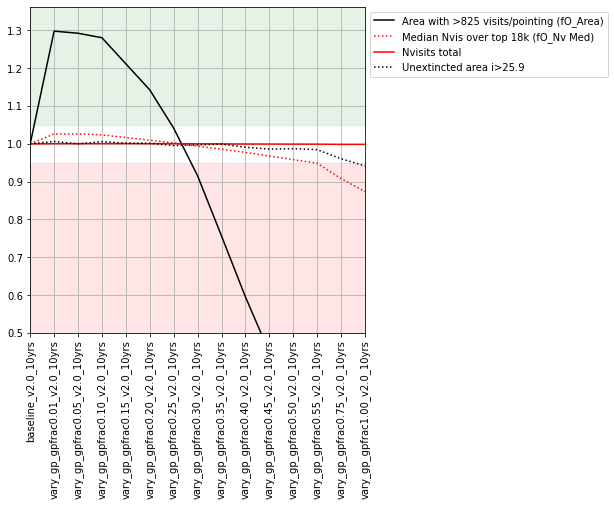

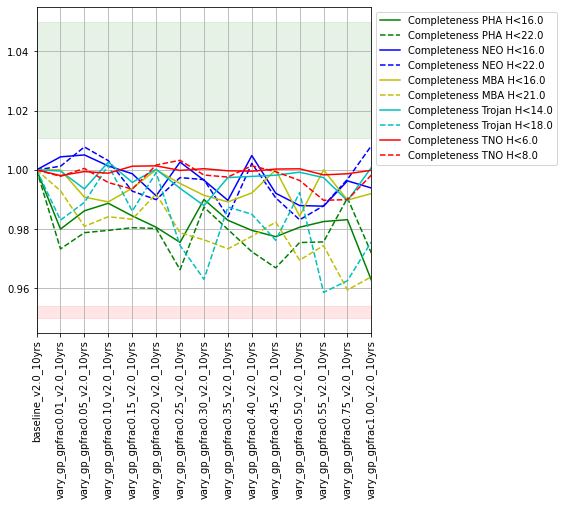

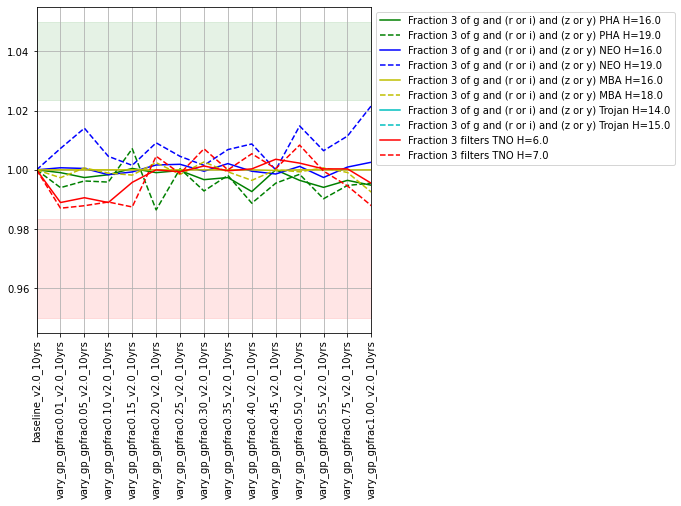

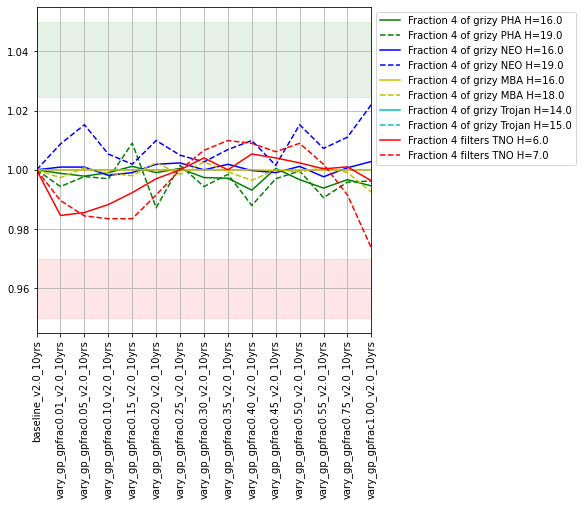

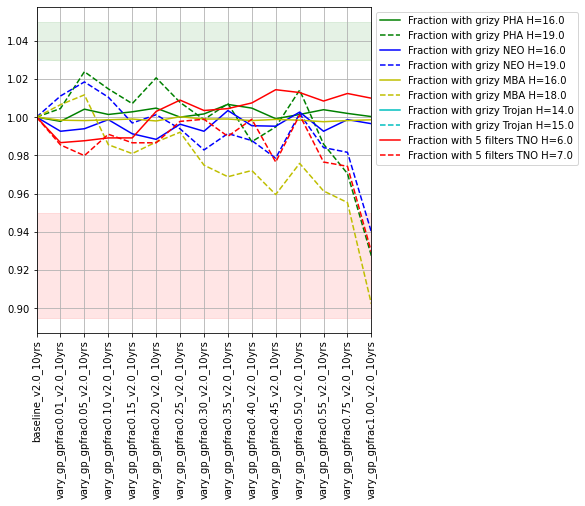

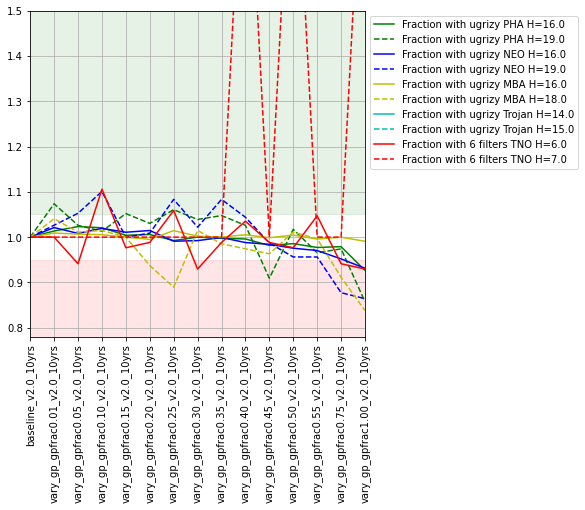

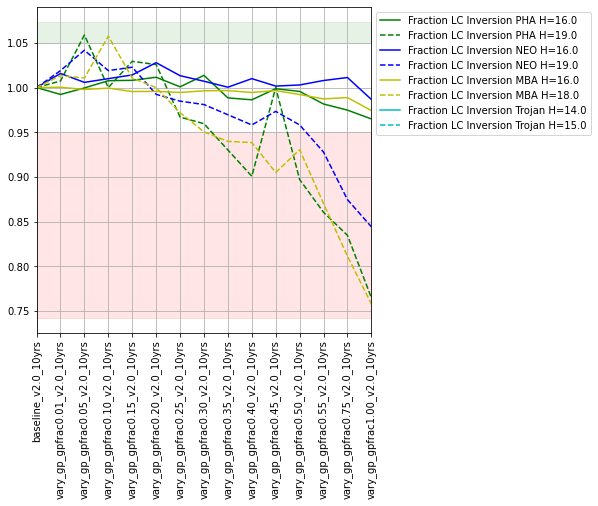

In [172]:
fam = ['vary_gp']
describe_family(fam)
for mset in sso_metrics:
    d = sso_family(fam, mset)
    IPython.display.display(d)

**vary_expt** : The baseline survey strategy uses 2x15s visits for grizy filters, and 1x30s visits for u band. This simulation attempts to make the individual image depth more consistent by varying the exposure time depending on conditions. Each visit could have an on-sky exposure time of between 20s to 100s.

Area with >825 visits/pointing (fO_Area)  \
run                                                              
baseline_v2.0_10yrs                               12893.228978   
vary_expt_v2.0_10yrs                              18090.974523   

                      Unextincted area i>25.9  Nvisits total  \
run                                                            
baseline_v2.0_10yrs              16711.175770      2086980.0   
vary_expt_v2.0_10yrs             16948.695871      1858421.0   

                      Median Nvis over top 18k (fO_Nv Med)  \
run                                                          
baseline_v2.0_10yrs                                  839.0   
vary_expt_v2.0_10yrs                                 934.0   

                      Median Nvis u band  Median Nvis g band  \
run                                                            
baseline_v2.0_10yrs                 54.0                70.0   
vary_expt_v2.0_10yrs                49.0                62.0   

                      Median Nvis r band  Median Nvis i band  \
run                                                            
baseline_v2.0_10yrs                178.0               180.0   
vary_expt_v2.0_10yrs               157.0               160.0   

                      Median Nvis z band  Median Nvis y band  \
run                                                            
baseline_v2.0_10yrs                160.0               166.0   
vary_expt_v2.0_10yrs               140.0               147.0   

                                                          Briefly  
run                                                                
baseline_v2.0_10yrs                                 v2.0 baseline  
vary_expt_v2.0_10yrs  Vary the exposure times between 20 and 100s

short_name            Completeness PHA H<16.0  Completeness PHA H<22.0  \
run                                                                      
baseline_v2.0_10yrs                    0.9404                 0.589618   
vary_expt_v2.0_10yrs                   0.9172                 0.551609   

short_name            Completeness NEO H<16.0  Completeness NEO H<22.0  \
run                                                                      
baseline_v2.0_10yrs                    0.9138                 0.565072   
vary_expt_v2.0_10yrs                   0.9076                 0.538742   

short_name            Completeness MBA H<16.0  Completeness MBA H<21.0  \
run                                                                      
baseline_v2.0_10yrs                       1.0                 0.536388   
vary_expt_v2.0_10yrs                      1.0                 0.515258   

short_name            Completeness Trojan H<14.0  Completeness Trojan H<18.0  \
run                                                                            
baseline_v2.0_10yrs                       0.9958                    0.425381   
vary_expt_v2.0_10yrs                      0.9946                    0.403903   

short_name            Completeness TNO H<6.0  Completeness TNO H<8.0  
run                                                                   
baseline_v2.0_10yrs                 0.695976                0.471819  
vary_expt_v2.0_10yrs                0.691372                0.464536

short_name            Fraction 3 of g and (r or i) and (z or y) PHA H=16.0  \
run                                                                          
baseline_v2.0_10yrs                                              0.8468      
vary_expt_v2.0_10yrs                                             0.8338      

short_name            Fraction 3 of g and (r or i) and (z or y) PHA H=19.0  \
run                                                                          
baseline_v2.0_10yrs                                              0.5332      
vary_expt_v2.0_10yrs                                             0.5036      

short_name            Fraction 3 of g and (r or i) and (z or y) NEO H=16.0  \
run                                                                          
baseline_v2.0_10yrs                                              0.8552      
vary_expt_v2.0_10yrs                                             0.8410      

short_name            Fraction 3 of g and (r or i) and (z or y) NEO H=19.0  \
run                                                                          
baseline_v2.0_10yrs                                              0.5268      
vary_expt_v2.0_10yrs                                             0.5032      

short_name            Fraction 3 of g and (r or i) and (z or y) MBA H=16.0  \
run                                                                          
baseline_v2.0_10yrs                                                 1.0      
vary_expt_v2.0_10yrs                                                1.0      

short_name            Fraction 3 of g and (r or i) and (z or y) MBA H=18.0  \
run                                                                          
baseline_v2.0_10yrs                                            0.903581      
vary_expt_v2.0_10yrs                                           0.890978      

short_name            Fraction 3 of g and (r or i) and (z or y) Trojan H=14.0  \
run                                                                             
baseline_v2.0_10yrs                                              0.9904         
vary_expt_v2.0_10yrs                                                NaN         

short_name            Fraction 3 of g and (r or i) and (z or y) Trojan H=15.0  \
run                                                                             
baseline_v2.0_10yrs                                                0.99         
vary_expt_v2.0_10yrs                                                NaN         

short_name            Fraction 3 filters TNO H=6.0  \
run                                                  
baseline_v2.0_10yrs                         0.6168   
vary_expt_v2.0_10yrs                        0.6166   

short_name            Fraction 3 filters TNO H=7.0  
run                                                 
baseline_v2.0_10yrs                         0.4794  
vary_expt_v2.0_10yrs                        0.5038

short_name            Fraction 4 of grizy PHA H=16.0  \
run                                                    
baseline_v2.0_10yrs                           0.8462   
vary_expt_v2.0_10yrs                          0.8334   

short_name            Fraction 4 of grizy PHA H=19.0  \
run                                                    
baseline_v2.0_10yrs                           0.5322   
vary_expt_v2.0_10yrs                          0.5026   

short_name            Fraction 4 of grizy NEO H=16.0  \
run                                                    
baseline_v2.0_10yrs                           0.8548   
vary_expt_v2.0_10yrs                          0.8408   

short_name            Fraction 4 of grizy NEO H=19.0  \
run                                                    
baseline_v2.0_10yrs                           0.5260   
vary_expt_v2.0_10yrs                          0.5028   

short_name            Fraction 4 of grizy MBA H=16.0  \
run                                                    
baseline_v2.0_10yrs                              1.0   
vary_expt_v2.0_10yrs                             1.0   

short_name            Fraction 4 of grizy MBA H=18.0  \
run                                                    
baseline_v2.0_10yrs                         0.903581   
vary_expt_v2.0_10yrs                        0.890978   

short_name            Fraction 4 of grizy Trojan H=14.0  \
run                                                       
baseline_v2.0_10yrs                              0.9904   
vary_expt_v2.0_10yrs                                NaN   

short_name            Fraction 4 of grizy Trojan H=15.0  \
run                                                       
baseline_v2.0_10yrs                                0.99   
vary_expt_v2.0_10yrs                                NaN   

short_name            Fraction 4 filters TNO H=6.0  \
run                                                  
baseline_v2.0_10yrs                         0.5978   
vary_expt_v2.0_10yrs                        0.5974   

short_name            Fraction 4 filters TNO H=7.0  
run                                                 
baseline_v2.0_10yrs                         0.4248  
vary_expt_v2.0_10yrs                        0.4520

short_name            Fraction with grizy PHA H=16.0  \
run                                                    
baseline_v2.0_10yrs                           0.7216   
vary_expt_v2.0_10yrs                          0.7048   

short_name            Fraction with grizy PHA H=19.0  \
run                                                    
baseline_v2.0_10yrs                           0.3112   
vary_expt_v2.0_10yrs                          0.2860   

short_name            Fraction with grizy NEO H=16.0  \
run                                                    
baseline_v2.0_10yrs                           0.7564   
vary_expt_v2.0_10yrs                          0.7306   

short_name            Fraction with grizy NEO H=19.0  \
run                                                    
baseline_v2.0_10yrs                           0.3258   
vary_expt_v2.0_10yrs                          0.2954   

short_name            Fraction with grizy MBA H=16.0  \
run                                                    
baseline_v2.0_10yrs                         0.996599   
vary_expt_v2.0_10yrs                        0.994799   

short_name            Fraction with grizy MBA H=18.0  \
run                                                    
baseline_v2.0_10yrs                         0.429486   
vary_expt_v2.0_10yrs                        0.406481   

short_name            Fraction with grizy Trojan H=14.0  \
run                                                       
baseline_v2.0_10yrs                              0.9898   
vary_expt_v2.0_10yrs                                NaN   

short_name            Fraction with grizy Trojan H=15.0  \
run                                                       
baseline_v2.0_10yrs                              0.5506   
vary_expt_v2.0_10yrs                                NaN   

short_name            Fraction with 5 filters TNO H=6.0  \
run                                                       
baseline_v2.0_10yrs                              0.4042   
vary_expt_v2.0_10yrs                             0.4074   

short_name            Fraction with 5 filters TNO H=7.0  
run                                                      
baseline_v2.0_10yrs                              0.1786  
vary_expt_v2.0_10yrs                             0.1670

short_name            Fraction with ugrizy PHA H=16.0  \
run                                                     
baseline_v2.0_10yrs                            0.4458   
vary_expt_v2.0_10yrs                           0.4008   

short_name            Fraction with ugrizy PHA H=19.0  \
run                                                     
baseline_v2.0_10yrs                            0.0462   
vary_expt_v2.0_10yrs                           0.0396   

short_name            Fraction with ugrizy NEO H=16.0  \
run                                                     
baseline_v2.0_10yrs                            0.4648   
vary_expt_v2.0_10yrs                           0.4296   

short_name            Fraction with ugrizy NEO H=19.0  \
run                                                     
baseline_v2.0_10yrs                            0.0456   
vary_expt_v2.0_10yrs                           0.0396   

short_name            Fraction with ugrizy MBA H=16.0  \
run                                                     
baseline_v2.0_10yrs                          0.894779   
vary_expt_v2.0_10yrs                         0.878976   

short_name            Fraction with ugrizy MBA H=18.0  \
run                                                     
baseline_v2.0_10yrs                          0.054211   
vary_expt_v2.0_10yrs                         0.050410   

short_name            Fraction with ugrizy Trojan H=14.0  \
run                                                        
baseline_v2.0_10yrs                               0.9178   
vary_expt_v2.0_10yrs                                 NaN   

short_name            Fraction with ugrizy Trojan H=15.0  \
run                                                        
baseline_v2.0_10yrs                               0.0052   
vary_expt_v2.0_10yrs                                 NaN   

short_name            Fraction with 6 filters TNO H=6.0  \
run                                                       
baseline_v2.0_10yrs                              0.0170   
vary_expt_v2.0_10yrs                             0.0156   

short_name            Fraction with 6 filters TNO H=7.0  
run                                                      
baseline_v2.0_10yrs                              0.0002  
vary_expt_v2.0_10yrs                             0.0002

short_name            Fraction LC Inversion PHA H=16.0  \
run                                                      
baseline_v2.0_10yrs                             0.4674   
vary_expt_v2.0_10yrs                            0.4288   

short_name            Fraction LC Inversion PHA H=19.0  \
run                                                      
baseline_v2.0_10yrs                             0.0544   
vary_expt_v2.0_10yrs                            0.0388   

short_name            Fraction LC Inversion NEO H=16.0  \
run                                                      
baseline_v2.0_10yrs                             0.4804   
vary_expt_v2.0_10yrs                            0.4378   

short_name            Fraction LC Inversion NEO H=19.0  \
run                                                      
baseline_v2.0_10yrs                             0.0526   
vary_expt_v2.0_10yrs                            0.0392   

short_name            Fraction LC Inversion MBA H=16.0  \
run                                                      
baseline_v2.0_10yrs                           0.947990   
vary_expt_v2.0_10yrs                          0.920784   

short_name            Fraction LC Inversion MBA H=18.0  \
run                                                      
baseline_v2.0_10yrs                           0.149430   
vary_expt_v2.0_10yrs                          0.124025   

short_name            Fraction LC Inversion Trojan H=14.0  \
run                                                         
baseline_v2.0_10yrs                                0.9276   
vary_expt_v2.0_10yrs                                  NaN   

short_name            Fraction LC Inversion Trojan H=15.0  
run                                                        
baseline_v2.0_10yrs                                 0.112  
vary_expt_v2.0_10yrs                                  NaN

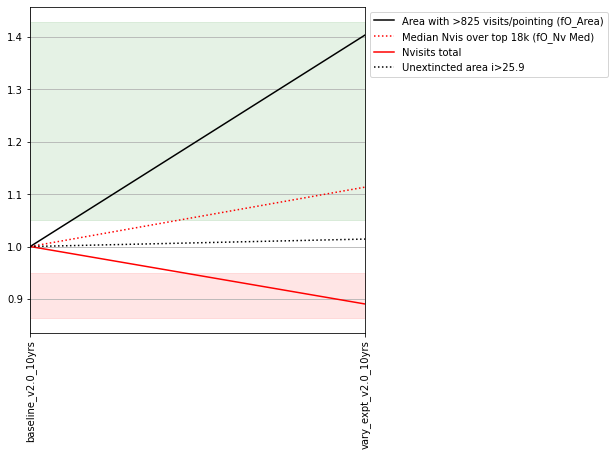

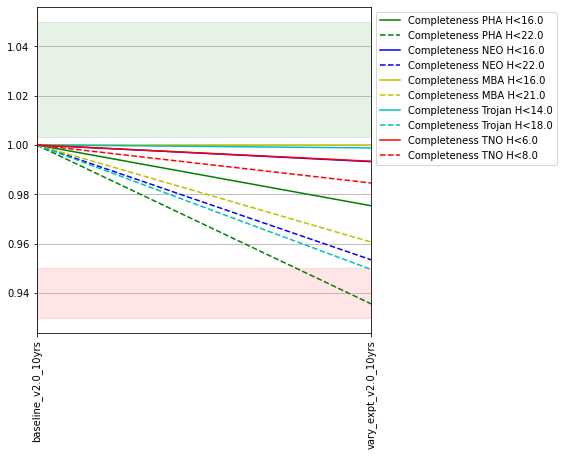

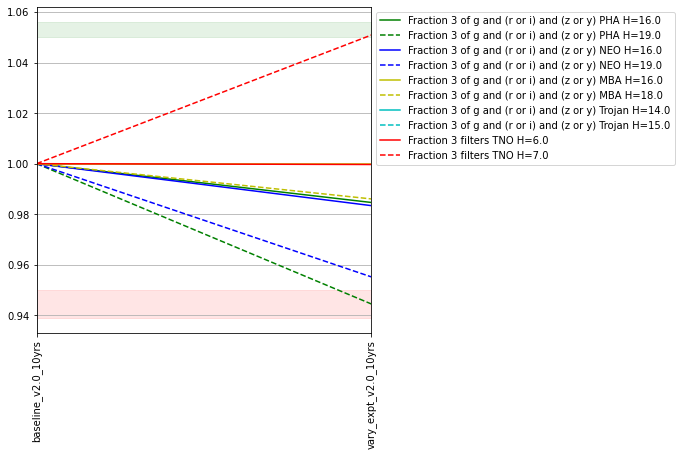

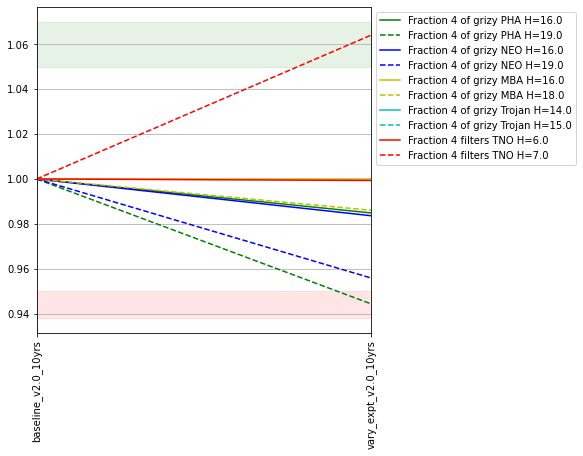

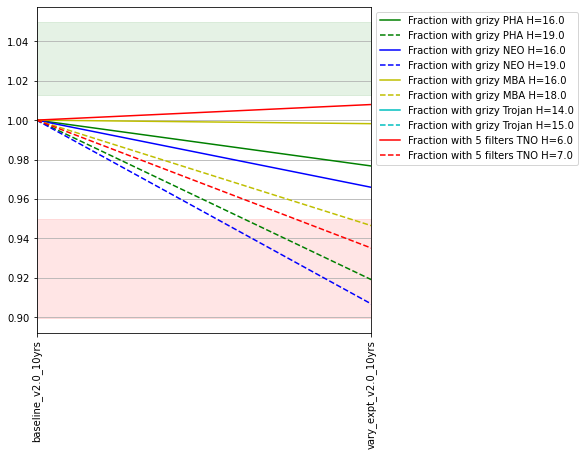

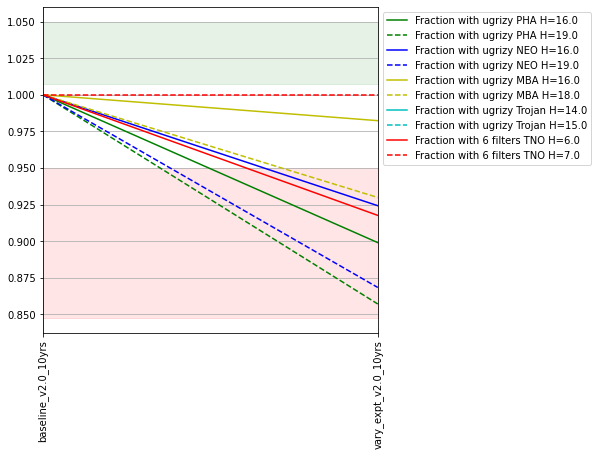

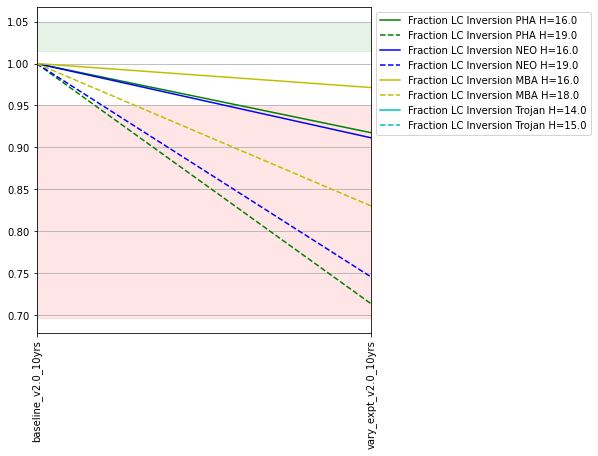

In [173]:
fam = ['vary_expt']
describe_family(fam)
for mset in sso_metrics:
    d = sso_family(fam, mset)
    IPython.display.display(d)

**ddf** : The baseline survey strategy adds five Deep Drilling Fields, each allocated about 1% of the total survey observing time, for about 5% total. In these simulations, the amount of time allocated for DDFs is varied from 3 to 8%. It is worth noting that we anticipate implementing improvements on the DDF scheduling algorithm in the next six months, and will revisit more complicated DDF scheduling requests with that improvement in hand.

Area with >825 visits/pointing (fO_Area)  \
run                                                                        
baseline_v2.0_10yrs                                         12893.228978   
ddf_frac_ddf_per0.6_v2.0_10yrs                              15656.183658   
ddf_frac_ddf_per1.6_v2.0_10yrs                               5702.161026   

                                Unextincted area i>25.9  Nvisits total  \
run                                                                      
baseline_v2.0_10yrs                        16711.175770      2086980.0   
ddf_frac_ddf_per0.6_v2.0_10yrs             16786.712198      2087949.0   
ddf_frac_ddf_per1.6_v2.0_10yrs             16396.440653      2086426.0   

                                Median Nvis over top 18k (fO_Nv Med)  \
run                                                                    
baseline_v2.0_10yrs                                            839.0   
ddf_frac_ddf_per0.6_v2.0_10yrs                                 853.0   
ddf_frac_ddf_per1.6_v2.0_10yrs                                 811.0   

                                Median Nvis u band  Median Nvis g band  \
run                                                                      
baseline_v2.0_10yrs                           54.0                70.0   
ddf_frac_ddf_per0.6_v2.0_10yrs                55.0                71.0   
ddf_frac_ddf_per1.6_v2.0_10yrs                52.0                67.0   

                                Median Nvis r band  Median Nvis i band  \
run                                                                      
baseline_v2.0_10yrs                          178.0               180.0   
ddf_frac_ddf_per0.6_v2.0_10yrs               180.0               183.0   
ddf_frac_ddf_per1.6_v2.0_10yrs               171.0               174.0   

                                Median Nvis z band  Median Nvis y band  \
run                                                                      
baseline_v2.0_10yrs                          160.0               166.0   
ddf_frac_ddf_per0.6_v2.0_10yrs               163.0               169.0   
ddf_frac_ddf_per1.6_v2.0_10yrs               155.0               161.0   

                                                                      Briefly  
run                                                                            
baseline_v2.0_10yrs                                             v2.0 baseline  
ddf_frac_ddf_per0.6_v2.0_10yrs  DDF fraction of visits reduced to 3% of total  
ddf_frac_ddf_per1.6_v2.0_10yrs         DDF fraction of visits increased to 8%

short_name                      Completeness PHA H<16.0  \
run                                                       
baseline_v2.0_10yrs                              0.9404   
ddf_frac_ddf_per0.6_v2.0_10yrs                   0.9404   
ddf_frac_ddf_per1.6_v2.0_10yrs                   0.9380   

short_name                      Completeness PHA H<22.0  \
run                                                       
baseline_v2.0_10yrs                            0.589618   
ddf_frac_ddf_per0.6_v2.0_10yrs                 0.590417   
ddf_frac_ddf_per1.6_v2.0_10yrs                 0.581810   

short_name                      Completeness NEO H<16.0  \
run                                                       
baseline_v2.0_10yrs                              0.9138   
ddf_frac_ddf_per0.6_v2.0_10yrs                   0.9100   
ddf_frac_ddf_per1.6_v2.0_10yrs                   0.9102   

short_name                      Completeness NEO H<22.0  \
run                                                       
baseline_v2.0_10yrs                            0.565072   
ddf_frac_ddf_per0.6_v2.0_10yrs                 0.562427   
ddf_frac_ddf_per1.6_v2.0_10yrs                 0.557086   

short_name                      Completeness MBA H<16.0  \
run                                                       
baseline_v2.0_10yrs                            1.000000   
ddf_frac_ddf_per0.6_v2.0_10yrs                 0.988998   
ddf_frac_ddf_per1.6_v2.0_10yrs                 0.986597   

short_name                      Completeness MBA H<21.0  \
run                                                       
baseline_v2.0_10yrs                            0.536388   
ddf_frac_ddf_per0.6_v2.0_10yrs                 0.526049   
ddf_frac_ddf_per1.6_v2.0_10yrs                 0.513655   

short_name                      Completeness Trojan H<14.0  \
run                                                          
baseline_v2.0_10yrs                                 0.9958   
ddf_frac_ddf_per0.6_v2.0_10yrs                      0.9858   
ddf_frac_ddf_per1.6_v2.0_10yrs                      0.9904   

short_name                      Completeness Trojan H<18.0  \
run                                                          
baseline_v2.0_10yrs                               0.425381   
ddf_frac_ddf_per0.6_v2.0_10yrs                    0.411346   
ddf_frac_ddf_per1.6_v2.0_10yrs                    0.409944   

short_name                      Completeness TNO H<6.0  Completeness TNO H<8.0  
run                                                                             
baseline_v2.0_10yrs                           0.695976                0.471819  
ddf_frac_ddf_per0.6_v2.0_10yrs                0.695258                0.471480  
ddf_frac_ddf_per1.6_v2.0_10yrs                0.693306                0.463004

short_name                      Fraction 3 of g and (r or i) and (z or y) PHA H=16.0  \
run                                                                                    
baseline_v2.0_10yrs                                                        0.8468      
ddf_frac_ddf_per0.6_v2.0_10yrs                                             0.8450      
ddf_frac_ddf_per1.6_v2.0_10yrs                                             0.8394      

short_name                      Fraction 3 of g and (r or i) and (z or y) PHA H=19.0  \
run                                                                                    
baseline_v2.0_10yrs                                                        0.5332      
ddf_frac_ddf_per0.6_v2.0_10yrs                                             0.5300      
ddf_frac_ddf_per1.6_v2.0_10yrs                                             0.5154      

short_name                      Fraction 3 of g and (r or i) and (z or y) NEO H=16.0  \
run                                                                                    
baseline_v2.0_10yrs                                                        0.8552      
ddf_frac_ddf_per0.6_v2.0_10yrs                                             0.8540      
ddf_frac_ddf_per1.6_v2.0_10yrs                                             0.8494      

short_name                      Fraction 3 of g and (r or i) and (z or y) NEO H=19.0  \
run                                                                                    
baseline_v2.0_10yrs                                                        0.5268      
ddf_frac_ddf_per0.6_v2.0_10yrs                                             0.5356      
ddf_frac_ddf_per1.6_v2.0_10yrs                                             0.5202      

short_name                      Fraction 3 of g and (r or i) and (z or y) MBA H=16.0  \
run                                                                                    
baseline_v2.0_10yrs                                                           1.0      
ddf_frac_ddf_per0.6_v2.0_10yrs                                                1.0      
ddf_frac_ddf_per1.6_v2.0_10yrs                                                1.0      

short_name                      Fraction 3 of g and (r or i) and (z or y) MBA H=18.0  \
run                                                                                    
baseline_v2.0_10yrs                                                      0.903581      
ddf_frac_ddf_per0.6_v2.0_10yrs                                           0.905381      
ddf_frac_ddf_per1.6_v2.0_10yrs                                           0.897780      

short_name                      Fraction 3 of g and (r or i) and (z or y) Trojan H=14.0  \
run                                                                                       
baseline_v2.0_10yrs                                                        0.9904         
ddf_frac_ddf_per0.6_v2.0_10yrs                                                NaN         
ddf_frac_ddf_per1.6_v2.0_10yrs                                                NaN         

short_name                      Fraction 3 of g and (r or i) and (z or y) Trojan H=15.0  \
run                                                                                       
baseline_v2.0_10yrs                                                          0.99         
ddf_frac_ddf_per0.6_v2.0_10yrs                                                NaN         
ddf_frac_ddf_per1.6_v2.0_10yrs                                                NaN         

short_name                      Fraction 3 filters TNO H=6.0  \
run                                                            
baseline_v2.0_10yrs                                   0.6168   
ddf_frac_ddf_per0.6_v2.0_10yrs                        0.6184   
ddf_frac_ddf_per1.6_v2.0_10yrs                        0.6146   

short_name                      Fraction 3 filters TNO H=7.0  
run                                                       

short_name                      Fraction 4 of grizy PHA H=16.0  \
run                                                              
baseline_v2.0_10yrs                                     0.8462   
ddf_frac_ddf_per0.6_v2.0_10yrs                          0.8446   
ddf_frac_ddf_per1.6_v2.0_10yrs                          0.8392   

short_name                      Fraction 4 of grizy PHA H=19.0  \
run                                                              
baseline_v2.0_10yrs                                     0.5322   
ddf_frac_ddf_per0.6_v2.0_10yrs                          0.5294   
ddf_frac_ddf_per1.6_v2.0_10yrs                          0.5150   

short_name                      Fraction 4 of grizy NEO H=16.0  \
run                                                              
baseline_v2.0_10yrs                                     0.8548   
ddf_frac_ddf_per0.6_v2.0_10yrs                          0.8538   
ddf_frac_ddf_per1.6_v2.0_10yrs                          0.8492   

short_name                      Fraction 4 of grizy NEO H=19.0  \
run                                                              
baseline_v2.0_10yrs                                     0.5260   
ddf_frac_ddf_per0.6_v2.0_10yrs                          0.5352   
ddf_frac_ddf_per1.6_v2.0_10yrs                          0.5194   

short_name                      Fraction 4 of grizy MBA H=16.0  \
run                                                              
baseline_v2.0_10yrs                                        1.0   
ddf_frac_ddf_per0.6_v2.0_10yrs                             1.0   
ddf_frac_ddf_per1.6_v2.0_10yrs                             1.0   

short_name                      Fraction 4 of grizy MBA H=18.0  \
run                                                              
baseline_v2.0_10yrs                                   0.903581   
ddf_frac_ddf_per0.6_v2.0_10yrs                        0.905381   
ddf_frac_ddf_per1.6_v2.0_10yrs                        0.897780   

short_name                      Fraction 4 of grizy Trojan H=14.0  \
run                                                                 
baseline_v2.0_10yrs                                        0.9904   
ddf_frac_ddf_per0.6_v2.0_10yrs                                NaN   
ddf_frac_ddf_per1.6_v2.0_10yrs                                NaN   

short_name                      Fraction 4 of grizy Trojan H=15.0  \
run                                                                 
baseline_v2.0_10yrs                                          0.99   
ddf_frac_ddf_per0.6_v2.0_10yrs                                NaN   
ddf_frac_ddf_per1.6_v2.0_10yrs                                NaN   

short_name                      Fraction 4 filters TNO H=6.0  \
run                                                            
baseline_v2.0_10yrs                                   0.5978   
ddf_frac_ddf_per0.6_v2.0_10yrs                        0.5968   
ddf_frac_ddf_per1.6_v2.0_10yrs                        0.5944   

short_name                      Fraction 4 filters TNO H=7.0  
run                                                           
baseline_v2.0_10yrs                                   0.4248  
ddf_frac_ddf_per0.6_v2.0_10yrs                        0.4242  
ddf_frac_ddf_per1.6_v2.0_10yrs                        0.4140

short_name                      Fraction with grizy PHA H=16.0  \
run                                                              
baseline_v2.0_10yrs                                     0.7216   
ddf_frac_ddf_per0.6_v2.0_10yrs                          0.7298   
ddf_frac_ddf_per1.6_v2.0_10yrs                          0.7168   

short_name                      Fraction with grizy PHA H=19.0  \
run                                                              
baseline_v2.0_10yrs                                     0.3112   
ddf_frac_ddf_per0.6_v2.0_10yrs                          0.3178   
ddf_frac_ddf_per1.6_v2.0_10yrs                          0.3018   

short_name                      Fraction with grizy NEO H=16.0  \
run                                                              
baseline_v2.0_10yrs                                     0.7564   
ddf_frac_ddf_per0.6_v2.0_10yrs                          0.7590   
ddf_frac_ddf_per1.6_v2.0_10yrs                          0.7462   

short_name                      Fraction with grizy NEO H=19.0  \
run                                                              
baseline_v2.0_10yrs                                     0.3258   
ddf_frac_ddf_per0.6_v2.0_10yrs                          0.3284   
ddf_frac_ddf_per1.6_v2.0_10yrs                          0.3138   

short_name                      Fraction with grizy MBA H=16.0  \
run                                                              
baseline_v2.0_10yrs                                   0.996599   
ddf_frac_ddf_per0.6_v2.0_10yrs                        0.995399   
ddf_frac_ddf_per1.6_v2.0_10yrs                        0.994999   

short_name                      Fraction with grizy MBA H=18.0  \
run                                                              
baseline_v2.0_10yrs                                   0.429486   
ddf_frac_ddf_per0.6_v2.0_10yrs                        0.430486   
ddf_frac_ddf_per1.6_v2.0_10yrs                        0.408482   

short_name                      Fraction with grizy Trojan H=14.0  \
run                                                                 
baseline_v2.0_10yrs                                        0.9898   
ddf_frac_ddf_per0.6_v2.0_10yrs                                NaN   
ddf_frac_ddf_per1.6_v2.0_10yrs                                NaN   

short_name                      Fraction with grizy Trojan H=15.0  \
run                                                                 
baseline_v2.0_10yrs                                        0.5506   
ddf_frac_ddf_per0.6_v2.0_10yrs                                NaN   
ddf_frac_ddf_per1.6_v2.0_10yrs                                NaN   

short_name                      Fraction with 5 filters TNO H=6.0  \
run                                                                 
baseline_v2.0_10yrs                                        0.4042   
ddf_frac_ddf_per0.6_v2.0_10yrs                             0.4070   
ddf_frac_ddf_per1.6_v2.0_10yrs                             0.4042   

short_name                      Fraction with 5 filters TNO H=7.0  
run                                                                
baseline_v2.0_10yrs                                        0.1786  
ddf_frac_ddf_per0.6_v2.0_10yrs                             0.1820  
ddf_frac_ddf_per1.6_v2.0_10yrs                             0.1708

short_name                      Fraction with ugrizy PHA H=16.0  \
run                                                               
baseline_v2.0_10yrs                                      0.4458   
ddf_frac_ddf_per0.6_v2.0_10yrs                           0.4496   
ddf_frac_ddf_per1.6_v2.0_10yrs                           0.4392   

short_name                      Fraction with ugrizy PHA H=19.0  \
run                                                               
baseline_v2.0_10yrs                                      0.0462   
ddf_frac_ddf_per0.6_v2.0_10yrs                           0.0472   
ddf_frac_ddf_per1.6_v2.0_10yrs                           0.0484   

short_name                      Fraction with ugrizy NEO H=16.0  \
run                                                               
baseline_v2.0_10yrs                                      0.4648   
ddf_frac_ddf_per0.6_v2.0_10yrs                           0.4728   
ddf_frac_ddf_per1.6_v2.0_10yrs                           0.4606   

short_name                      Fraction with ugrizy NEO H=19.0  \
run                                                               
baseline_v2.0_10yrs                                      0.0456   
ddf_frac_ddf_per0.6_v2.0_10yrs                           0.0470   
ddf_frac_ddf_per1.6_v2.0_10yrs                           0.0472   

short_name                      Fraction with ugrizy MBA H=16.0  \
run                                                               
baseline_v2.0_10yrs                                    0.894779   
ddf_frac_ddf_per0.6_v2.0_10yrs                         0.905781   
ddf_frac_ddf_per1.6_v2.0_10yrs                         0.890178   

short_name                      Fraction with ugrizy MBA H=18.0  \
run                                                               
baseline_v2.0_10yrs                                    0.054211   
ddf_frac_ddf_per0.6_v2.0_10yrs                         0.052611   
ddf_frac_ddf_per1.6_v2.0_10yrs                         0.052811   

short_name                      Fraction with ugrizy Trojan H=14.0  \
run                                                                  
baseline_v2.0_10yrs                                         0.9178   
ddf_frac_ddf_per0.6_v2.0_10yrs                                 NaN   
ddf_frac_ddf_per1.6_v2.0_10yrs                                 NaN   

short_name                      Fraction with ugrizy Trojan H=15.0  \
run                                                                  
baseline_v2.0_10yrs                                         0.0052   
ddf_frac_ddf_per0.6_v2.0_10yrs                                 NaN   
ddf_frac_ddf_per1.6_v2.0_10yrs                                 NaN   

short_name                      Fraction with 6 filters TNO H=6.0  \
run                                                                 
baseline_v2.0_10yrs                                        0.0170   
ddf_frac_ddf_per0.6_v2.0_10yrs                             0.0174   
ddf_frac_ddf_per1.6_v2.0_10yrs                             0.0164   

short_name                      Fraction with 6 filters TNO H=7.0  
run                                                                
baseline_v2.0_10yrs                                        0.0002  
ddf_frac_ddf_per0.6_v2.0_10yrs                             0.0004  
ddf_frac_ddf_per1.6_v2.0_10yrs                             0.0002

short_name                      Fraction LC Inversion PHA H=16.0  \
run                                                                
baseline_v2.0_10yrs                                       0.4674   
ddf_frac_ddf_per0.6_v2.0_10yrs                            0.4660   
ddf_frac_ddf_per1.6_v2.0_10yrs                            0.4554   

short_name                      Fraction LC Inversion PHA H=19.0  \
run                                                                
baseline_v2.0_10yrs                                       0.0544   
ddf_frac_ddf_per0.6_v2.0_10yrs                            0.0540   
ddf_frac_ddf_per1.6_v2.0_10yrs                            0.0534   

short_name                      Fraction LC Inversion NEO H=16.0  \
run                                                                
baseline_v2.0_10yrs                                       0.4804   
ddf_frac_ddf_per0.6_v2.0_10yrs                            0.4854   
ddf_frac_ddf_per1.6_v2.0_10yrs                            0.4742   

short_name                      Fraction LC Inversion NEO H=19.0  \
run                                                                
baseline_v2.0_10yrs                                       0.0526   
ddf_frac_ddf_per0.6_v2.0_10yrs                            0.0518   
ddf_frac_ddf_per1.6_v2.0_10yrs                            0.0526   

short_name                      Fraction LC Inversion MBA H=16.0  \
run                                                                
baseline_v2.0_10yrs                                     0.947990   
ddf_frac_ddf_per0.6_v2.0_10yrs                          0.950390   
ddf_frac_ddf_per1.6_v2.0_10yrs                          0.935587   

short_name                      Fraction LC Inversion MBA H=18.0  \
run                                                                
baseline_v2.0_10yrs                                     0.149430   
ddf_frac_ddf_per0.6_v2.0_10yrs                          0.147630   
ddf_frac_ddf_per1.6_v2.0_10yrs                          0.139828   

short_name                      Fraction LC Inversion Trojan H=14.0  \
run                                                                   
baseline_v2.0_10yrs                                          0.9276   
ddf_frac_ddf_per0.6_v2.0_10yrs                                  NaN   
ddf_frac_ddf_per1.6_v2.0_10yrs                                  NaN   

short_name                      Fraction LC Inversion Trojan H=15.0  
run                                                                  
baseline_v2.0_10yrs                                           0.112  
ddf_frac_ddf_per0.6_v2.0_10yrs                                  NaN  
ddf_frac_ddf_per1.6_v2.0_10yrs                                  NaN

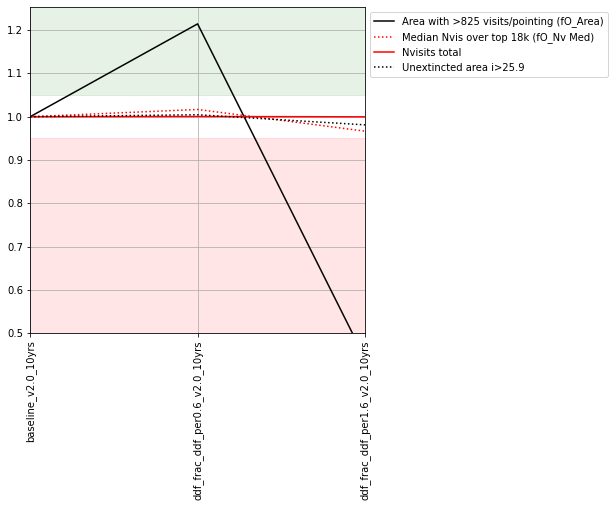

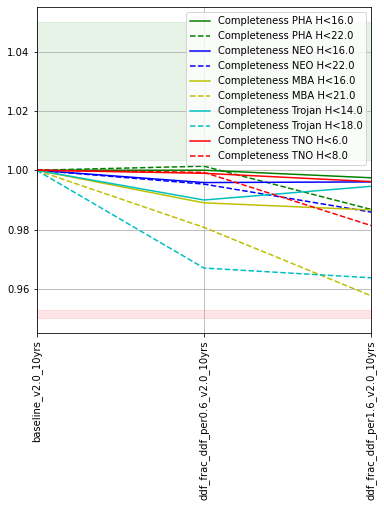

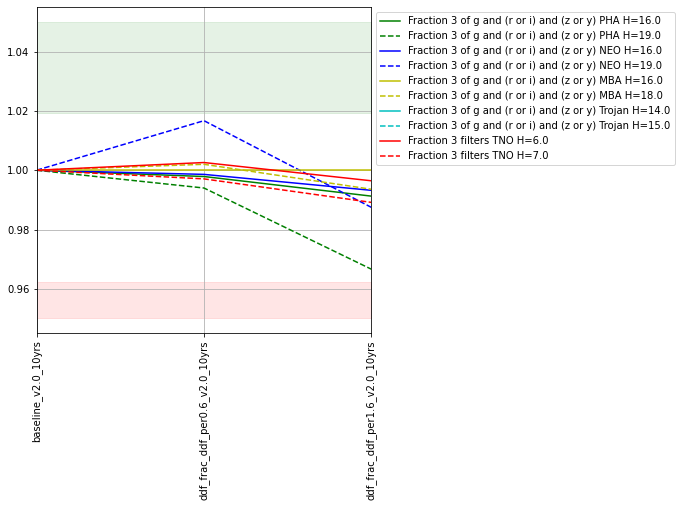

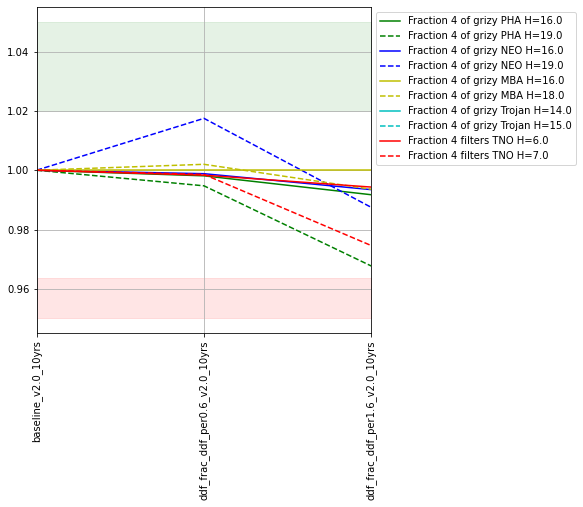

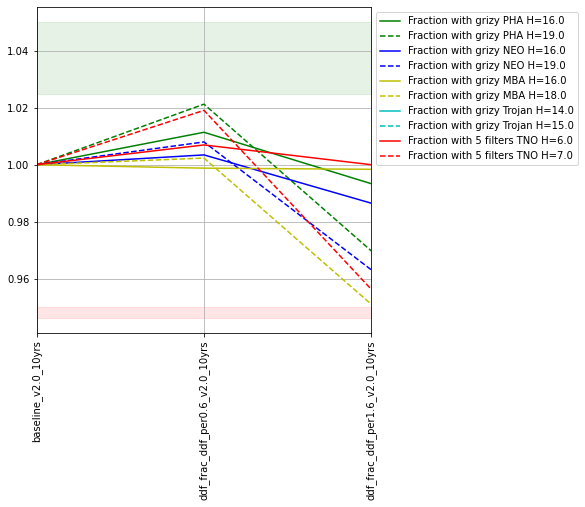

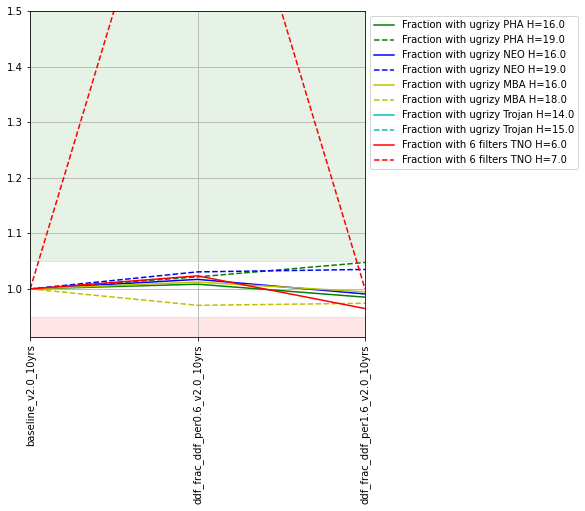

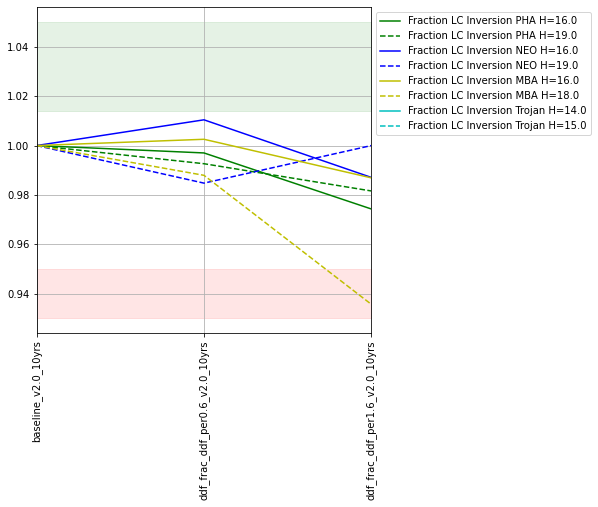

In [175]:
fam = ['ddf']
describe_family(fam)
for mset in sso_metrics:
    d = sso_family(fam, mset)
    IPython.display.display(d)

**microsurveys** : There are special programs which can achieve additional science beyond or supporting the primary Rubin LSST science drivers, if provided specialized observing time via "microsurveys". These simulations investigate a subset of microsurvey proposals, described further in their brief descriptions.

Area with >825 visits/pointing (fO_Area)  \
run                                                                              
baseline_v2.0_10yrs                                               12893.228978   
virgo_cluster_v2.0_10yrs                                          12161.364919   
carina_v2.0_10yrs                                                 12519.743306   
smc_movie_v2.0_10yrs                                              12732.084598   
roman_v2.0_10yrs                                                  12283.062498   
local_gal_bindx0_v2.0_10yrs                                       12330.902235   
local_gal_bindx1_v2.0_10yrs                                       11938.112809   
local_gal_bindx2_v2.0_10yrs                                       11226.391798   
too_rate10_v2.0_10yrs                                             12710.262963   
too_rate50_v2.0_10yrs                                             11628.413454   
north_stripe_v2.0_10yrs                                            7379.069729   
short_exp_v2.0_10yrs                                              10664.065056   
multi_short_v2.0_10yrs                                              151.072856   
twilight_neo_nightpattern4v2.0_10yrs                               5852.394588   
twilight_neo_nightpattern7v2.0_10yrs                               3772.624935   
twilight_neo_nightpattern3v2.0_10yrs                               3776.821403   
twilight_neo_nightpattern6v2.0_10yrs                               1927.857503   
twilight_neo_nightpattern5v2.0_10yrs                               1227.886603   
twilight_neo_nightpattern2v2.0_10yrs                               1309.298087   
twilight_neo_nightpattern1v2.0_10yrs                                114.983229   

                                      Unextincted area i>25.9  Nvisits total  \
run                                                                            
baseline_v2.0_10yrs                              16711.175770      2086980.0   
virgo_cluster_v2.0_10yrs                         16685.996960      2087802.0   
carina_v2.0_10yrs                                16385.529835      2087222.0   
smc_movie_v2.0_10yrs                             16743.068928      2089048.0   
roman_v2.0_10yrs                                 16671.728968      2083719.0   
local_gal_bindx0_v2.0_10yrs                      16550.870684      2087499.0   
local_gal_bindx1_v2.0_10yrs                      16554.227858      2087949.0   
local_gal_bindx2_v2.0_10yrs                      16456.869795      2087603.0   
too_rate10_v2.0_10yrs                            16508.906001      2086250.0   
too_rate50_v2.0_10yrs                            16609.621239      2079989.0   
north_stripe_v2.0_10yrs                          16472.816375      2089053.0   
short_exp_v2.0_10yrs                             16581.085255      2180235.0   
multi_short_v2.0_10yrs                           16638.996516      3584186.0   
twilight_neo_nightpattern4v2.0_10yrs             16502.191652      2329938.0   
twilight_neo_nightpattern7v2.0_10yrs             16352.797383      2417826.0   
twilight_neo_nightpattern3v2.0_10yrs             16304.118352      2420218.0   
twilight_neo_nightpattern6v2.0_10yrs             16195.849472      2524598.0   
twilight_neo_nightpattern5v2.0_10yrs             16186.617242      2587302.0   
twilight_neo_nightpattern2v2.0_10yrs             16055.687433      2586114.0   
twilight_neo_nightpattern1v2.0_10yrs             15352.359358      3079761.0   

                                      Median Nvis over top 18k (fO_Nv Med)  \
run                                                                          
baseline_v2.0_10yrs                                                  839.0   
virgo_cluster_v2.0_10yrs                                             836.0   
carina_v2.0_10yrs                                                    838.0   
smc_movie_v2.0_10yrs                                                 838.0   
roma

short_name                            Completeness PHA H<16.0  \
run                                                             
baseline_v2.0_10yrs                                    0.9404   
virgo_cluster_v2.0_10yrs                               0.9220   
carina_v2.0_10yrs                                      0.9258   
smc_movie_v2.0_10yrs                                   0.9266   
roman_v2.0_10yrs                                       0.9134   
local_gal_bindx0_v2.0_10yrs                            0.9410   
local_gal_bindx1_v2.0_10yrs                            0.9386   
local_gal_bindx2_v2.0_10yrs                            0.9418   
too_rate10_v2.0_10yrs                                  0.9170   
too_rate50_v2.0_10yrs                                  0.9200   
north_stripe_v2.0_10yrs                                0.9292   
short_exp_v2.0_10yrs                                   0.9238   
multi_short_v2.0_10yrs                                 0.9280   
twilight_neo_nightpattern4v2.0_10yrs                   0.9628   
twilight_neo_nightpattern7v2.0_10yrs                   0.9688   
twilight_neo_nightpattern3v2.0_10yrs                   0.9764   
twilight_neo_nightpattern6v2.0_10yrs                   0.9684   
twilight_neo_nightpattern5v2.0_10yrs                   0.9660   
twilight_neo_nightpattern2v2.0_10yrs                   0.9712   
twilight_neo_nightpattern1v2.0_10yrs                   0.9704   

short_name                            Completeness PHA H<22.0  \
run                                                             
baseline_v2.0_10yrs                                  0.589618   
virgo_cluster_v2.0_10yrs                             0.572407   
carina_v2.0_10yrs                                    0.564346   
smc_movie_v2.0_10yrs                                 0.576314   
roman_v2.0_10yrs                                     0.569090   
local_gal_bindx0_v2.0_10yrs                          0.585284   
local_gal_bindx1_v2.0_10yrs                          0.588373   
local_gal_bindx2_v2.0_10yrs                          0.588299   
too_rate10_v2.0_10yrs                                0.573534   
too_rate50_v2.0_10yrs                                0.571755   
north_stripe_v2.0_10yrs                              0.577337   
short_exp_v2.0_10yrs                                 0.574269   
multi_short_v2.0_10yrs                               0.543037   
twilight_neo_nightpattern4v2.0_10yrs                 0.573993   
twilight_neo_nightpattern7v2.0_10yrs                 0.569873   
twilight_neo_nightpattern3v2.0_10yrs                 0.574569   
twilight_neo_nightpattern6v2.0_10yrs                 0.565975   
twilight_neo_nightpattern5v2.0_10yrs                 0.565672   
twilight_neo_nightpattern2v2.0_10yrs                 0.566944   
twilight_neo_nightpattern1v2.0_10yrs                 0.549568   

short_name                            Completeness NEO H<16.0  \
run                                                             
baseline_v2.0_10yrs                                    0.9138   
virgo_cluster_v2.0_10yrs                               0.9098   
carina_v2.0_10yrs                                      0.8974   
smc_movie_v2.0_10yrs                                   0.9084   
roman_v2.0_10yrs                                       0.9100   
local_gal_bindx0_v2.0_10yrs                            0.9106   
local_gal_bindx1_v2.0_10yrs                            0.9198   
local_gal_bindx2_v2.0_10yrs                            0.9086   
too_rate10_v2.0_10yrs                                  0.9124   
too_rate50_v2.0_10yrs                                  0.9082   
north_stripe_v2.0_10yrs                                0.9188   
short_exp_v2.0_10yrs                                   0.9082   
multi_short_v2.0_10yrs                                 0.9212   
twilight_neo_nightpattern4v2.0_10yrs                   0.9488   
twilight_neo_nightpattern7v2.0_10yrs                   0.9628   
twilight_neo_nightpattern3v2.0_10

short_name                            Fraction 3 of g and (r or i) and (z or y) PHA H=16.0  \
run                                                                                          
baseline_v2.0_10yrs                                                              0.8468      
virgo_cluster_v2.0_10yrs                                                         0.8472      
carina_v2.0_10yrs                                                                0.8420      
smc_movie_v2.0_10yrs                                                             0.8444      
roman_v2.0_10yrs                                                                 0.8466      
local_gal_bindx0_v2.0_10yrs                                                      0.8456      
local_gal_bindx1_v2.0_10yrs                                                      0.8472      
local_gal_bindx2_v2.0_10yrs                                                      0.8466      
too_rate10_v2.0_10yrs                                                            0.8466      
too_rate50_v2.0_10yrs                                                            0.8446      
north_stripe_v2.0_10yrs                                                          0.8572      
short_exp_v2.0_10yrs                                                             0.8438      
multi_short_v2.0_10yrs                                                           0.8818      
twilight_neo_nightpattern4v2.0_10yrs                                             0.8520      
twilight_neo_nightpattern7v2.0_10yrs                                             0.8516      
twilight_neo_nightpattern3v2.0_10yrs                                             0.8530      
twilight_neo_nightpattern6v2.0_10yrs                                             0.8510      
twilight_neo_nightpattern5v2.0_10yrs                                             0.8510      
twilight_neo_nightpattern2v2.0_10yrs                                             0.8486      
twilight_neo_nightpattern1v2.0_10yrs                                             0.8330      

short_name                            Fraction 3 of g and (r or i) and (z or y) PHA H=19.0  \
run                                                                                          
baseline_v2.0_10yrs                                                              0.5332      
virgo_cluster_v2.0_10yrs                                                         0.5300      
carina_v2.0_10yrs                                                                0.5268      
smc_movie_v2.0_10yrs                                                             0.5306      
roman_v2.0_10yrs                                                                 0.5304      
local_gal_bindx0_v2.0_10yrs                                                      0.5344      
local_gal_bindx1_v2.0_10yrs                                                      0.5306      
local_gal_bindx2_v2.0_10yrs                                                      0.5316      
too_rate10_v2.0_10yrs                                                            0.5284      
too_rate50_v2.0_10yrs                                                            0.5246      
north_stripe_v2.0_10yrs                                                          0.5328      
short_exp_v2.0_10yrs                                                             0.5252      
multi_short_v2.0_10yrs                                                           0.5514      
twilight_neo_nightpattern4v2.0_10yrs                                             0.5248      
twilight_neo_nightpattern7v2.0_10yrs                                             0.5242      
twilight_neo_nightpattern3v2.0_10yrs                                             0.5226      
twilight_neo_nightpattern6v2.0_10yrs                                             0.5172      
twilight_neo_nightpattern5v2.0_10yrs                                             0.5194      
twilight_neo_nightpattern2v2.0_10yrs               

short_name                            Fraction 4 of grizy PHA H=16.0  \
run                                                                    
baseline_v2.0_10yrs                                           0.8462   
virgo_cluster_v2.0_10yrs                                      0.8468   
carina_v2.0_10yrs                                             0.8408   
smc_movie_v2.0_10yrs                                          0.8440   
roman_v2.0_10yrs                                              0.8464   
local_gal_bindx0_v2.0_10yrs                                   0.8454   
local_gal_bindx1_v2.0_10yrs                                   0.8464   
local_gal_bindx2_v2.0_10yrs                                   0.8456   
too_rate10_v2.0_10yrs                                         0.8462   
too_rate50_v2.0_10yrs                                         0.8444   
north_stripe_v2.0_10yrs                                       0.8564   
short_exp_v2.0_10yrs                                          0.8434   
multi_short_v2.0_10yrs                                        0.8794   
twilight_neo_nightpattern4v2.0_10yrs                          0.8518   
twilight_neo_nightpattern7v2.0_10yrs                          0.8512   
twilight_neo_nightpattern3v2.0_10yrs                          0.8530   
twilight_neo_nightpattern6v2.0_10yrs                          0.8510   
twilight_neo_nightpattern5v2.0_10yrs                          0.8508   
twilight_neo_nightpattern2v2.0_10yrs                          0.8484   
twilight_neo_nightpattern1v2.0_10yrs                          0.8330   

short_name                            Fraction 4 of grizy PHA H=19.0  \
run                                                                    
baseline_v2.0_10yrs                                           0.5322   
virgo_cluster_v2.0_10yrs                                      0.5294   
carina_v2.0_10yrs                                             0.5254   
smc_movie_v2.0_10yrs                                          0.5300   
roman_v2.0_10yrs                                              0.5304   
local_gal_bindx0_v2.0_10yrs                                   0.5336   
local_gal_bindx1_v2.0_10yrs                                   0.5300   
local_gal_bindx2_v2.0_10yrs                                   0.5304   
too_rate10_v2.0_10yrs                                         0.5280   
too_rate50_v2.0_10yrs                                         0.5240   
north_stripe_v2.0_10yrs                                       0.5324   
short_exp_v2.0_10yrs                                          0.5248   
multi_short_v2.0_10yrs                                        0.5494   
twilight_neo_nightpattern4v2.0_10yrs                          0.5246   
twilight_neo_nightpattern7v2.0_10yrs                          0.5238   
twilight_neo_nightpattern3v2.0_10yrs                          0.5222   
twilight_neo_nightpattern6v2.0_10yrs                          0.5170   
twilight_neo_nightpattern5v2.0_10yrs                          0.5194   
twilight_neo_nightpattern2v2.0_10yrs                          0.5168   
twilight_neo_nightpattern1v2.0_10yrs                          0.4956   

short_name                            Fraction 4 of grizy NEO H=16.0  \
run                                                                    
baseline_v2.0_10yrs                                           0.8548   
virgo_cluster_v2.0_10yrs                                      0.8536   
carina_v2.0_10yrs                                             0.8520   
smc_movie_v2.0_10yrs                                          0.8550   
roman_v2.0_10yrs                                              0.8538   
local_gal_bindx0_v2.0_10yrs                                   0.8570   
local_gal_bindx1_v2.0_10yrs                                   0.8542   
local_gal_bindx2_v2.0_10yrs                                   0.8572   
too_rate10_v2.0_10yrs                                         0.8538   
too_rate50_v2.0_10yrs                 

short_name                            Fraction with grizy PHA H=16.0  \
run                                                                    
baseline_v2.0_10yrs                                           0.7216   
virgo_cluster_v2.0_10yrs                                      0.7226   
carina_v2.0_10yrs                                             0.7214   
smc_movie_v2.0_10yrs                                          0.7238   
roman_v2.0_10yrs                                              0.7212   
local_gal_bindx0_v2.0_10yrs                                   0.7292   
local_gal_bindx1_v2.0_10yrs                                   0.7316   
local_gal_bindx2_v2.0_10yrs                                   0.7408   
too_rate10_v2.0_10yrs                                         0.7250   
too_rate50_v2.0_10yrs                                         0.7278   
north_stripe_v2.0_10yrs                                       0.7590   
short_exp_v2.0_10yrs                                          0.7236   
multi_short_v2.0_10yrs                                        0.7810   
twilight_neo_nightpattern4v2.0_10yrs                          0.7162   
twilight_neo_nightpattern7v2.0_10yrs                          0.7122   
twilight_neo_nightpattern3v2.0_10yrs                          0.7076   
twilight_neo_nightpattern6v2.0_10yrs                          0.7066   
twilight_neo_nightpattern5v2.0_10yrs                          0.7034   
twilight_neo_nightpattern2v2.0_10yrs                          0.7066   
twilight_neo_nightpattern1v2.0_10yrs                          0.6880   

short_name                            Fraction with grizy PHA H=19.0  \
run                                                                    
baseline_v2.0_10yrs                                           0.3112   
virgo_cluster_v2.0_10yrs                                      0.3050   
carina_v2.0_10yrs                                             0.3202   
smc_movie_v2.0_10yrs                                          0.3110   
roman_v2.0_10yrs                                              0.3086   
local_gal_bindx0_v2.0_10yrs                                   0.3180   
local_gal_bindx1_v2.0_10yrs                                   0.3184   
local_gal_bindx2_v2.0_10yrs                                   0.3190   
too_rate10_v2.0_10yrs                                         0.3200   
too_rate50_v2.0_10yrs                                         0.3100   
north_stripe_v2.0_10yrs                                       0.3178   
short_exp_v2.0_10yrs                                          0.3158   
multi_short_v2.0_10yrs                                        0.3604   
twilight_neo_nightpattern4v2.0_10yrs                          0.3062   
twilight_neo_nightpattern7v2.0_10yrs                          0.3010   
twilight_neo_nightpattern3v2.0_10yrs                          0.2936   
twilight_neo_nightpattern6v2.0_10yrs                          0.2926   
twilight_neo_nightpattern5v2.0_10yrs                          0.2924   
twilight_neo_nightpattern2v2.0_10yrs                          0.2972   
twilight_neo_nightpattern1v2.0_10yrs                          0.2738   

short_name                            Fraction with grizy NEO H=16.0  \
run                                                                    
baseline_v2.0_10yrs                                           0.7564   
virgo_cluster_v2.0_10yrs                                      0.7530   
carina_v2.0_10yrs                                             0.7566   
smc_movie_v2.0_10yrs                                          0.7530   
roman_v2.0_10yrs                                              0.7544   
local_gal_bindx0_v2.0_10yrs                                   0.7580   
local_gal_bindx1_v2.0_10yrs                                   0.7612   
local_gal_bindx2_v2.0_10yrs                                   0.7636   
too_rate10_v2.0_10yrs                                         0.7476   
too_rate50_v2.0_10yrs                 

short_name                            Fraction with ugrizy PHA H=16.0  \
run                                                                     
baseline_v2.0_10yrs                                            0.4458   
virgo_cluster_v2.0_10yrs                                       0.4498   
carina_v2.0_10yrs                                              0.4548   
smc_movie_v2.0_10yrs                                           0.4424   
roman_v2.0_10yrs                                               0.4434   
local_gal_bindx0_v2.0_10yrs                                    0.4460   
local_gal_bindx1_v2.0_10yrs                                    0.4406   
local_gal_bindx2_v2.0_10yrs                                    0.4286   
too_rate10_v2.0_10yrs                                          0.4514   
too_rate50_v2.0_10yrs                                          0.4502   
north_stripe_v2.0_10yrs                                        0.4818   
short_exp_v2.0_10yrs                                           0.4500   
multi_short_v2.0_10yrs                                         0.4492   
twilight_neo_nightpattern4v2.0_10yrs                           0.4294   
twilight_neo_nightpattern7v2.0_10yrs                           0.4320   
twilight_neo_nightpattern3v2.0_10yrs                           0.4376   
twilight_neo_nightpattern6v2.0_10yrs                           0.4300   
twilight_neo_nightpattern5v2.0_10yrs                           0.4212   
twilight_neo_nightpattern2v2.0_10yrs                           0.4200   
twilight_neo_nightpattern1v2.0_10yrs                           0.4012   

short_name                            Fraction with ugrizy PHA H=19.0  \
run                                                                     
baseline_v2.0_10yrs                                            0.0462   
virgo_cluster_v2.0_10yrs                                       0.0502   
carina_v2.0_10yrs                                              0.0482   
smc_movie_v2.0_10yrs                                           0.0482   
roman_v2.0_10yrs                                               0.0470   
local_gal_bindx0_v2.0_10yrs                                    0.0428   
local_gal_bindx1_v2.0_10yrs                                    0.0460   
local_gal_bindx2_v2.0_10yrs                                    0.0402   
too_rate10_v2.0_10yrs                                          0.0452   
too_rate50_v2.0_10yrs                                          0.0468   
north_stripe_v2.0_10yrs                                        0.0516   
short_exp_v2.0_10yrs                                           0.0446   
multi_short_v2.0_10yrs                                         0.0546   
twilight_neo_nightpattern4v2.0_10yrs                           0.0428   
twilight_neo_nightpattern7v2.0_10yrs                           0.0446   
twilight_neo_nightpattern3v2.0_10yrs                           0.0430   
twilight_neo_nightpattern6v2.0_10yrs                           0.0444   
twilight_neo_nightpattern5v2.0_10yrs                           0.0408   
twilight_neo_nightpattern2v2.0_10yrs                           0.0410   
twilight_neo_nightpattern1v2.0_10yrs                           0.0382   

short_name                            Fraction with ugrizy NEO H=16.0  \
run                                                                     
baseline_v2.0_10yrs                                            0.4648   
virgo_cluster_v2.0_10yrs                                       0.4712   
carina_v2.0_10yrs                                              0.4782   
smc_movie_v2.0_10yrs                                           0.4658   
roman_v2.0_10yrs                                               0.4648   
local_gal_bindx0_v2.0_10yrs                                    0.4606   
local_gal_bindx1_v2.0_10yrs                                    0.4602   
local_gal_bindx2_v2.0_10yrs                                    0.4508   
too_rate10_v2.0_10yrs                                   

short_name                            Fraction LC Inversion PHA H=16.0  \
run                                                                      
baseline_v2.0_10yrs                                             0.4674   
virgo_cluster_v2.0_10yrs                                        0.4634   
carina_v2.0_10yrs                                               0.4612   
smc_movie_v2.0_10yrs                                            0.4714   
roman_v2.0_10yrs                                                0.4640   
local_gal_bindx0_v2.0_10yrs                                     0.4650   
local_gal_bindx1_v2.0_10yrs                                     0.4688   
local_gal_bindx2_v2.0_10yrs                                     0.4662   
too_rate10_v2.0_10yrs                                           0.4670   
too_rate50_v2.0_10yrs                                           0.4664   
north_stripe_v2.0_10yrs                                         0.4638   
short_exp_v2.0_10yrs                                            0.4750   
multi_short_v2.0_10yrs                                          0.6254   
twilight_neo_nightpattern4v2.0_10yrs                            0.6622   
twilight_neo_nightpattern7v2.0_10yrs                            0.6912   
twilight_neo_nightpattern3v2.0_10yrs                            0.6930   
twilight_neo_nightpattern6v2.0_10yrs                            0.7254   
twilight_neo_nightpattern5v2.0_10yrs                            0.7374   
twilight_neo_nightpattern2v2.0_10yrs                            0.7380   
twilight_neo_nightpattern1v2.0_10yrs                            0.7900   

short_name                            Fraction LC Inversion PHA H=19.0  \
run                                                                      
baseline_v2.0_10yrs                                             0.0544   
virgo_cluster_v2.0_10yrs                                        0.0536   
carina_v2.0_10yrs                                               0.0526   
smc_movie_v2.0_10yrs                                            0.0522   
roman_v2.0_10yrs                                                0.0542   
local_gal_bindx0_v2.0_10yrs                                     0.0542   
local_gal_bindx1_v2.0_10yrs                                     0.0550   
local_gal_bindx2_v2.0_10yrs                                     0.0502   
too_rate10_v2.0_10yrs                                           0.0514   
too_rate50_v2.0_10yrs                                           0.0534   
north_stripe_v2.0_10yrs                                         0.0510   
short_exp_v2.0_10yrs                                            0.0554   
multi_short_v2.0_10yrs                                          0.1266   
twilight_neo_nightpattern4v2.0_10yrs                            0.0522   
twilight_neo_nightpattern7v2.0_10yrs                            0.0524   
twilight_neo_nightpattern3v2.0_10yrs                            0.0532   
twilight_neo_nightpattern6v2.0_10yrs                            0.0512   
twilight_neo_nightpattern5v2.0_10yrs                            0.0520   
twilight_neo_nightpattern2v2.0_10yrs                            0.0500   
twilight_neo_nightpattern1v2.0_10yrs                            0.0506   

short_name                            Fraction LC Inversion NEO H=16.0  \
run                                                                      
baseline_v2.0_10yrs                                             0.4804   
virgo_cluster_v2.0_10yrs                                        0.4844   
carina_v2.0_10yrs                                               0.4738   
smc_movie_v2.0_10yrs                                            0.4830   
roman_v2.0_10yrs                                                0.4828   
local_gal_bindx0_v2.0_10yrs                                     0.4834   
local_gal_bindx1_v2.0_10yrs                                     0.4858   
local_gal_bindx2_v2.0_10yrs                                     0.4826   
to

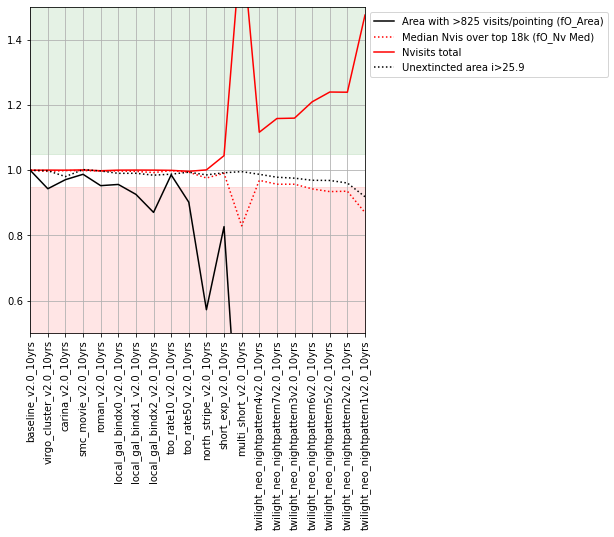

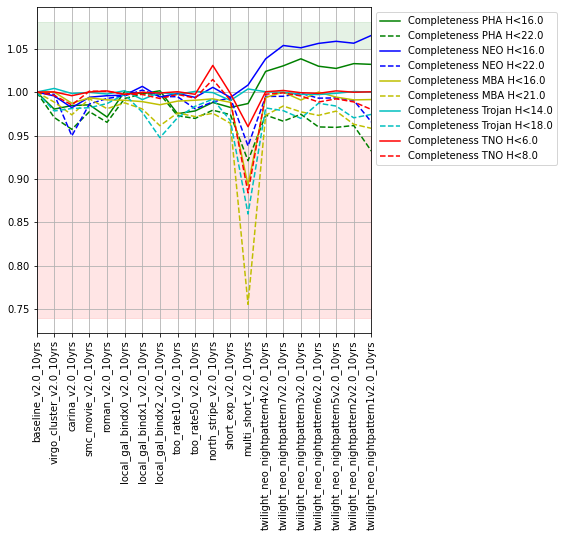

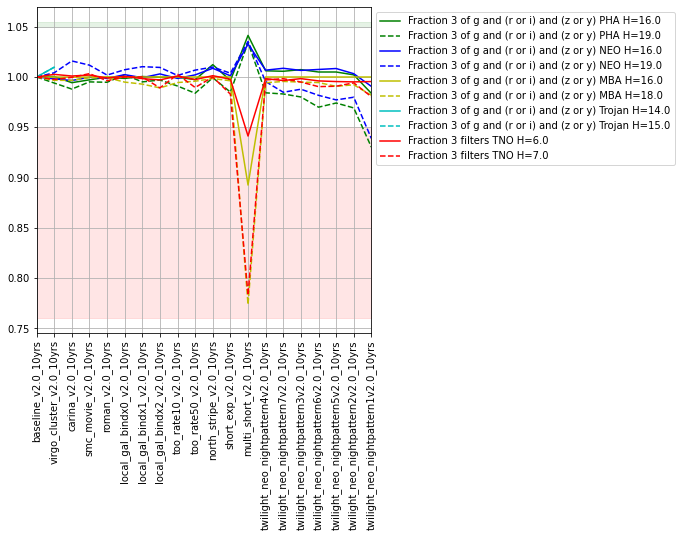

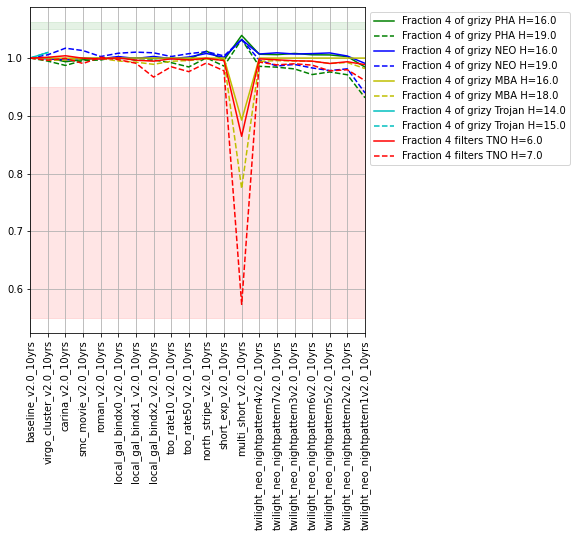

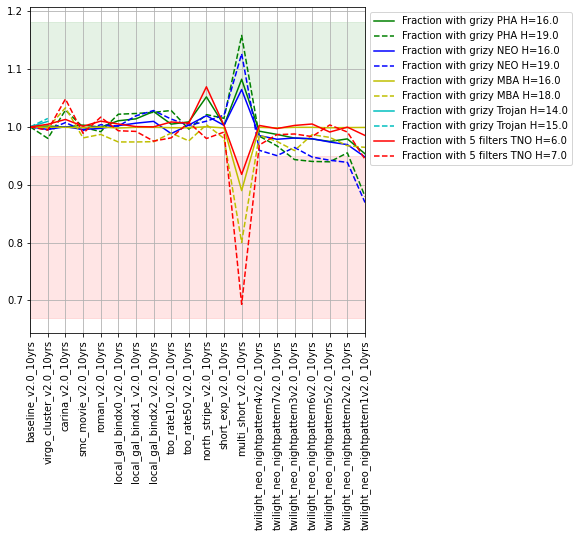

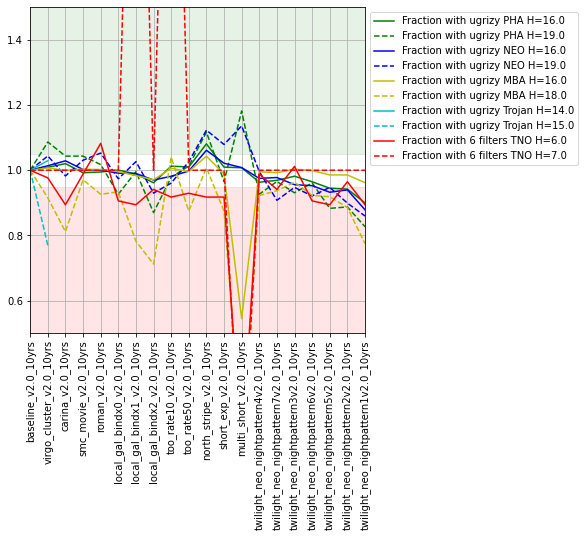

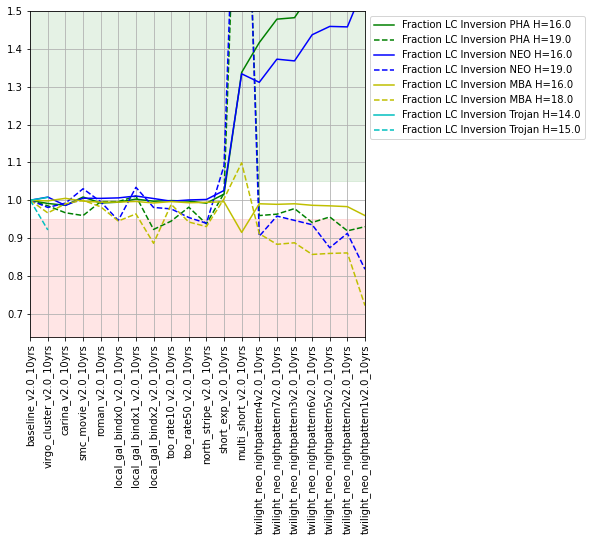

In [176]:
fam = ['microsurveys']
describe_family(fam)
for mset in sso_metrics:
    d = sso_family(fam, mset)
    IPython.display.display(d)

In [179]:
# Basic 'general' metrics for a subset of runs
tt = family_runs[['run', 'brief', 'reference']].reset_index().set_index('run')

def describe_runs(these_runs):
    baseline_run = tt['reference'].loc[these_runs].iloc[0]
    if baseline_run not in these_runs:
        these_runs = [baseline_run] + these_runs
    d = summaries.loc[these_runs, metrics.loc['short']['metric']]
    d.columns = metrics.loc['short']['short_name'].values
    d['Briefly'] = tt['brief']
    IPython.display.display(d)
    mset = 'area'
    fig, ax = maf.plot_run_metric(  # pylint: disable=invalid-name
        summaries.loc[these_runs, :], 
        metric_set=metrics.loc[mset],
        baseline_run=baseline_run,
        vertical_quantity="value",
        horizontal_quantity="run",
        metric_label_map=metrics.loc[mset]['short_name']
    )
    plt.xlim(0, len(d)-1)
    xlims = plt.xlim()
    if plt.ylim()[0] < 0.50:
        plt.ylim(bottom=0.50)
    if plt.ylim()[1] > 1.5:
        plt.ylim(top=1.5)
    plt.fill_between(xlims, 1.05, plt.ylim()[1], color='g', alpha=0.1)
    plt.fill_between(xlims, 0.95, plt.ylim()[0], color='r', alpha=0.1)

# Show and plot set of solar system specific metric outputs
def sso_runs(these_runs, mset):
    baseline_run = tt['reference'].loc[these_runs].iloc[0]
    if baseline_run not in these_runs:
        these_runs = [baseline_run] + these_runs
    fig, ax = maf.plot_run_metric(  # pylint: disable=invalid-name
            summaries.loc[these_runs, :], 
            metric_set=metrics.loc[mset],
            baseline_run=baseline_run,
            vertical_quantity="value",
            horizontal_quantity="run",
            metric_label_map=metrics.loc[mset]['short_name']
        )
    d = summaries.loc[these_runs, metrics.loc[mset]['metric']]
    d.columns = metrics.loc[mset]['short_name']
    plt.xlim(0, len(d)-1)
    xlims = plt.xlim()
    if plt.ylim()[0] < 0.50:
        plt.ylim(bottom=0.50)
    if plt.ylim()[1] > 1.5:
        plt.ylim(top=1.5)
    plt.fill_between(xlims, 1.05, plt.ylim()[1], color='g', alpha=0.1)
    plt.fill_between(xlims, 0.95, plt.ylim()[0], color='r', alpha=0.1)
    return d

Area with >825 visits/pointing (fO_Area)  \
run                                                                              
baseline_v2.0_10yrs                                               12893.228978   
twilight_neo_nightpattern4v2.0_10yrs                               5852.394588   
twilight_neo_nightpattern7v2.0_10yrs                               3772.624935   
twilight_neo_nightpattern3v2.0_10yrs                               3776.821403   
twilight_neo_nightpattern6v2.0_10yrs                               1927.857503   
twilight_neo_nightpattern5v2.0_10yrs                               1227.886603   
twilight_neo_nightpattern2v2.0_10yrs                               1309.298087   
twilight_neo_nightpattern1v2.0_10yrs                                114.983229   

                                      Unextincted area i>25.9  Nvisits total  \
run                                                                            
baseline_v2.0_10yrs                              16711.175770      2086980.0   
twilight_neo_nightpattern4v2.0_10yrs             16502.191652      2329938.0   
twilight_neo_nightpattern7v2.0_10yrs             16352.797383      2417826.0   
twilight_neo_nightpattern3v2.0_10yrs             16304.118352      2420218.0   
twilight_neo_nightpattern6v2.0_10yrs             16195.849472      2524598.0   
twilight_neo_nightpattern5v2.0_10yrs             16186.617242      2587302.0   
twilight_neo_nightpattern2v2.0_10yrs             16055.687433      2586114.0   
twilight_neo_nightpattern1v2.0_10yrs             15352.359358      3079761.0   

                                      Median Nvis over top 18k (fO_Nv Med)  \
run                                                                          
baseline_v2.0_10yrs                                                  839.0   
twilight_neo_nightpattern4v2.0_10yrs                                 813.0   
twilight_neo_nightpattern7v2.0_10yrs                                 803.0   
twilight_neo_nightpattern3v2.0_10yrs                                 803.0   
twilight_neo_nightpattern6v2.0_10yrs                                 791.0   
twilight_neo_nightpattern5v2.0_10yrs                                 784.0   
twilight_neo_nightpattern2v2.0_10yrs                                 785.0   
twilight_neo_nightpattern1v2.0_10yrs                                 730.0   

                                      Median Nvis u band  Median Nvis g band  \
run                                                                            
baseline_v2.0_10yrs                                 54.0                70.0   
twilight_neo_nightpattern4v2.0_10yrs                52.0                67.0   
twilight_neo_nightpattern7v2.0_10yrs                51.0                67.0   
twilight_neo_nightpattern3v2.0_10yrs                52.0                66.0   
twilight_neo_nightpattern6v2.0_10yrs                51.0                66.0   
twilight_neo_nightpattern5v2.0_10yrs                50.0                65.0   
twilight_neo_nightpattern2v2.0_10yrs                50.0                65.0   
twilight_neo_nightpattern1v2.0_10yrs                47.0                61.0   

                                      Median Nvis r band  Median Nvis i band  \
run                                                                            
baseline_v2.0_10yrs                                178.0               180.0   
twilight_neo_nightpattern4v2.0_10yrs               189.0               192.0   
twilight_neo_nightpattern7v2.0_10yrs               191.0               194.0   
twilight_neo_nightpattern3v2.0_10yrs               190.0               193.0   
twilight_neo_nightpattern6v2.0_10yrs               196.0               200.0   
twilight_neo_nightpattern5v2.0_10yrs               205.0               212.0   
twilight_neo_nightpattern2v2.0_10yrs               202.0               210.0   
twilight_neo_nightpattern1v2.0_10yrs               273.0               271.0   

                                 

short_name                            Completeness PHA H<16.0  \
run                                                             
baseline_v2.0_10yrs                                    0.9404   
twilight_neo_nightpattern4v2.0_10yrs                   0.9628   
twilight_neo_nightpattern7v2.0_10yrs                   0.9688   
twilight_neo_nightpattern3v2.0_10yrs                   0.9764   
twilight_neo_nightpattern6v2.0_10yrs                   0.9684   
twilight_neo_nightpattern5v2.0_10yrs                   0.9660   
twilight_neo_nightpattern2v2.0_10yrs                   0.9712   
twilight_neo_nightpattern1v2.0_10yrs                   0.9704   

short_name                            Completeness PHA H<22.0  \
run                                                             
baseline_v2.0_10yrs                                  0.589618   
twilight_neo_nightpattern4v2.0_10yrs                 0.573993   
twilight_neo_nightpattern7v2.0_10yrs                 0.569873   
twilight_neo_nightpattern3v2.0_10yrs                 0.574569   
twilight_neo_nightpattern6v2.0_10yrs                 0.565975   
twilight_neo_nightpattern5v2.0_10yrs                 0.565672   
twilight_neo_nightpattern2v2.0_10yrs                 0.566944   
twilight_neo_nightpattern1v2.0_10yrs                 0.549568   

short_name                            Completeness NEO H<16.0  \
run                                                             
baseline_v2.0_10yrs                                    0.9138   
twilight_neo_nightpattern4v2.0_10yrs                   0.9488   
twilight_neo_nightpattern7v2.0_10yrs                   0.9628   
twilight_neo_nightpattern3v2.0_10yrs                   0.9604   
twilight_neo_nightpattern6v2.0_10yrs                   0.9650   
twilight_neo_nightpattern5v2.0_10yrs                   0.9672   
twilight_neo_nightpattern2v2.0_10yrs                   0.9652   
twilight_neo_nightpattern1v2.0_10yrs                   0.9734   

short_name                            Completeness NEO H<22.0  \
run                                                             
baseline_v2.0_10yrs                                  0.565072   
twilight_neo_nightpattern4v2.0_10yrs                 0.562236   
twilight_neo_nightpattern7v2.0_10yrs                 0.562335   
twilight_neo_nightpattern3v2.0_10yrs                 0.564285   
twilight_neo_nightpattern6v2.0_10yrs                 0.561114   
twilight_neo_nightpattern5v2.0_10yrs                 0.561286   
twilight_neo_nightpattern2v2.0_10yrs                 0.559675   
twilight_neo_nightpattern1v2.0_10yrs                 0.545629   

short_name                            Completeness MBA H<16.0  \
run                                                             
baseline_v2.0_10yrs                                  1.000000   
twilight_neo_nightpattern4v2.0_10yrs                 0.993799   
twilight_neo_nightpattern7v2.0_10yrs                 1.000000   
twilight_neo_nightpattern3v2.0_10yrs                 0.990798   
twilight_neo_nightpattern6v2.0_10yrs                 1.000000   
twilight_neo_nightpattern5v2.0_10yrs                 0.994199   
twilight_neo_nightpattern2v2.0_10yrs                 0.990998   
twilight_neo_nightpattern1v2.0_10yrs                 0.991398   

short_name                            Completeness MBA H<21.0  \
run                                                             
baseline_v2.0_10yrs                                  0.536388   
twilight_neo_nightpattern4v2.0_10yrs                 0.522080   
twilight_neo_nightpattern7v2.0_10yrs                 0.527777   
twilight_neo_nightpattern3v2.0_10yrs                 0.524165   
twilight_neo_nightpattern6v2.0_10yrs                 0.522007   
twilight_neo_nightpattern5v2.0_10yrs                 0.524627   
twilight_neo_nightpattern2v2.0_10yrs                 0.516510   
twilight_neo_nightpattern1v2.0_10yrs                 0.514007   

short_name                            Completeness Trojan H<14.0  \
run                       

short_name                            Fraction 3 of g and (r or i) and (z or y) PHA H=16.0  \
run                                                                                          
baseline_v2.0_10yrs                                                              0.8468      
twilight_neo_nightpattern4v2.0_10yrs                                             0.8520      
twilight_neo_nightpattern7v2.0_10yrs                                             0.8516      
twilight_neo_nightpattern3v2.0_10yrs                                             0.8530      
twilight_neo_nightpattern6v2.0_10yrs                                             0.8510      
twilight_neo_nightpattern5v2.0_10yrs                                             0.8510      
twilight_neo_nightpattern2v2.0_10yrs                                             0.8486      
twilight_neo_nightpattern1v2.0_10yrs                                             0.8330      

short_name                            Fraction 3 of g and (r or i) and (z or y) PHA H=19.0  \
run                                                                                          
baseline_v2.0_10yrs                                                              0.5332      
twilight_neo_nightpattern4v2.0_10yrs                                             0.5248      
twilight_neo_nightpattern7v2.0_10yrs                                             0.5242      
twilight_neo_nightpattern3v2.0_10yrs                                             0.5226      
twilight_neo_nightpattern6v2.0_10yrs                                             0.5172      
twilight_neo_nightpattern5v2.0_10yrs                                             0.5194      
twilight_neo_nightpattern2v2.0_10yrs                                             0.5168      
twilight_neo_nightpattern1v2.0_10yrs                                             0.4960      

short_name                            Fraction 3 of g and (r or i) and (z or y) NEO H=16.0  \
run                                                                                          
baseline_v2.0_10yrs                                                              0.8552      
twilight_neo_nightpattern4v2.0_10yrs                                             0.8610      
twilight_neo_nightpattern7v2.0_10yrs                                             0.8626      
twilight_neo_nightpattern3v2.0_10yrs                                             0.8608      
twilight_neo_nightpattern6v2.0_10yrs                                             0.8616      
twilight_neo_nightpattern5v2.0_10yrs                                             0.8624      
twilight_neo_nightpattern2v2.0_10yrs                                             0.8580      
twilight_neo_nightpattern1v2.0_10yrs                                             0.8472      

short_name                            Fraction 3 of g and (r or i) and (z or y) NEO H=19.0  \
run                                                                                          
baseline_v2.0_10yrs                                                              0.5268      
twilight_neo_nightpattern4v2.0_10yrs                                             0.5244      
twilight_neo_nightpattern7v2.0_10yrs                                             0.5188      
twilight_neo_nightpattern3v2.0_10yrs                                             0.5204      
twilight_neo_nightpattern6v2.0_10yrs                                             0.5172      
twilight_neo_nightpattern5v2.0_10yrs                                             0.5148      
twilight_neo_nightpattern2v2.0_10yrs                                             0.5162      
twilight_neo_nightpattern1v2.0_10yrs                                             0.4946      

short_name                            Fraction 3 of g and (r or i) and (z or y) MBA H=16.0  \
run                                                                                          
baseline_v2.0_10yrs                             

short_name                            Fraction 4 of grizy PHA H=16.0  \
run                                                                    
baseline_v2.0_10yrs                                           0.8462   
twilight_neo_nightpattern4v2.0_10yrs                          0.8518   
twilight_neo_nightpattern7v2.0_10yrs                          0.8512   
twilight_neo_nightpattern3v2.0_10yrs                          0.8530   
twilight_neo_nightpattern6v2.0_10yrs                          0.8510   
twilight_neo_nightpattern5v2.0_10yrs                          0.8508   
twilight_neo_nightpattern2v2.0_10yrs                          0.8484   
twilight_neo_nightpattern1v2.0_10yrs                          0.8330   

short_name                            Fraction 4 of grizy PHA H=19.0  \
run                                                                    
baseline_v2.0_10yrs                                           0.5322   
twilight_neo_nightpattern4v2.0_10yrs                          0.5246   
twilight_neo_nightpattern7v2.0_10yrs                          0.5238   
twilight_neo_nightpattern3v2.0_10yrs                          0.5222   
twilight_neo_nightpattern6v2.0_10yrs                          0.5170   
twilight_neo_nightpattern5v2.0_10yrs                          0.5194   
twilight_neo_nightpattern2v2.0_10yrs                          0.5168   
twilight_neo_nightpattern1v2.0_10yrs                          0.4956   

short_name                            Fraction 4 of grizy NEO H=16.0  \
run                                                                    
baseline_v2.0_10yrs                                           0.8548   
twilight_neo_nightpattern4v2.0_10yrs                          0.8608   
twilight_neo_nightpattern7v2.0_10yrs                          0.8626   
twilight_neo_nightpattern3v2.0_10yrs                          0.8608   
twilight_neo_nightpattern6v2.0_10yrs                          0.8614   
twilight_neo_nightpattern5v2.0_10yrs                          0.8624   
twilight_neo_nightpattern2v2.0_10yrs                          0.8578   
twilight_neo_nightpattern1v2.0_10yrs                          0.8470   

short_name                            Fraction 4 of grizy NEO H=19.0  \
run                                                                    
baseline_v2.0_10yrs                                           0.5260   
twilight_neo_nightpattern4v2.0_10yrs                          0.5242   
twilight_neo_nightpattern7v2.0_10yrs                          0.5188   
twilight_neo_nightpattern3v2.0_10yrs                          0.5202   
twilight_neo_nightpattern6v2.0_10yrs                          0.5170   
twilight_neo_nightpattern5v2.0_10yrs                          0.5146   
twilight_neo_nightpattern2v2.0_10yrs                          0.5162   
twilight_neo_nightpattern1v2.0_10yrs                          0.4942   

short_name                            Fraction 4 of grizy MBA H=16.0  \
run                                                                    
baseline_v2.0_10yrs                                              1.0   
twilight_neo_nightpattern4v2.0_10yrs                             1.0   
twilight_neo_nightpattern7v2.0_10yrs                             1.0   
twilight_neo_nightpattern3v2.0_10yrs                             1.0   
twilight_neo_nightpattern6v2.0_10yrs                             1.0   
twilight_neo_nightpattern5v2.0_10yrs                             1.0   
twilight_neo_nightpattern2v2.0_10yrs                             1.0   
twilight_neo_nightpattern1v2.0_10yrs                             1.0   

short_name                            Fraction 4 of grizy MBA H=18.0  \
run                                                                    
baseline_v2.0_10yrs                                         0.903581   
twilight_neo_nightpattern4v2.0_10yrs                        0.898380   
twilight_neo_nightpattern7v2.0_10yrs                        0.899580   
twilight_neo_nightpattern3v2.0_10yr

short_name                            Fraction with grizy PHA H=16.0  \
run                                                                    
baseline_v2.0_10yrs                                           0.7216   
twilight_neo_nightpattern4v2.0_10yrs                          0.7162   
twilight_neo_nightpattern7v2.0_10yrs                          0.7122   
twilight_neo_nightpattern3v2.0_10yrs                          0.7076   
twilight_neo_nightpattern6v2.0_10yrs                          0.7066   
twilight_neo_nightpattern5v2.0_10yrs                          0.7034   
twilight_neo_nightpattern2v2.0_10yrs                          0.7066   
twilight_neo_nightpattern1v2.0_10yrs                          0.6880   

short_name                            Fraction with grizy PHA H=19.0  \
run                                                                    
baseline_v2.0_10yrs                                           0.3112   
twilight_neo_nightpattern4v2.0_10yrs                          0.3062   
twilight_neo_nightpattern7v2.0_10yrs                          0.3010   
twilight_neo_nightpattern3v2.0_10yrs                          0.2936   
twilight_neo_nightpattern6v2.0_10yrs                          0.2926   
twilight_neo_nightpattern5v2.0_10yrs                          0.2924   
twilight_neo_nightpattern2v2.0_10yrs                          0.2972   
twilight_neo_nightpattern1v2.0_10yrs                          0.2738   

short_name                            Fraction with grizy NEO H=16.0  \
run                                                                    
baseline_v2.0_10yrs                                           0.7564   
twilight_neo_nightpattern4v2.0_10yrs                          0.7450   
twilight_neo_nightpattern7v2.0_10yrs                          0.7402   
twilight_neo_nightpattern3v2.0_10yrs                          0.7418   
twilight_neo_nightpattern6v2.0_10yrs                          0.7408   
twilight_neo_nightpattern5v2.0_10yrs                          0.7366   
twilight_neo_nightpattern2v2.0_10yrs                          0.7332   
twilight_neo_nightpattern1v2.0_10yrs                          0.7170   

short_name                            Fraction with grizy NEO H=19.0  \
run                                                                    
baseline_v2.0_10yrs                                           0.3258   
twilight_neo_nightpattern4v2.0_10yrs                          0.3126   
twilight_neo_nightpattern7v2.0_10yrs                          0.3096   
twilight_neo_nightpattern3v2.0_10yrs                          0.3142   
twilight_neo_nightpattern6v2.0_10yrs                          0.3088   
twilight_neo_nightpattern5v2.0_10yrs                          0.3070   
twilight_neo_nightpattern2v2.0_10yrs                          0.3058   
twilight_neo_nightpattern1v2.0_10yrs                          0.2832   

short_name                            Fraction with grizy MBA H=16.0  \
run                                                                    
baseline_v2.0_10yrs                                         0.996599   
twilight_neo_nightpattern4v2.0_10yrs                        0.995799   
twilight_neo_nightpattern7v2.0_10yrs                        0.994799   
twilight_neo_nightpattern3v2.0_10yrs                        0.995799   
twilight_neo_nightpattern6v2.0_10yrs                        0.995799   
twilight_neo_nightpattern5v2.0_10yrs                        0.994999   
twilight_neo_nightpattern2v2.0_10yrs                        0.995399   
twilight_neo_nightpattern1v2.0_10yrs                        0.995599   

short_name                            Fraction with grizy MBA H=18.0  \
run                                                                    
baseline_v2.0_10yrs                                         0.429486   
twilight_neo_nightpattern4v2.0_10yrs                        0.423285   
twilight_neo_nightpattern7v2.0_10yrs                        0.418684   
twilight_neo_nightpattern3v2.0_10yr

short_name                            Fraction with ugrizy PHA H=16.0  \
run                                                                     
baseline_v2.0_10yrs                                            0.4458   
twilight_neo_nightpattern4v2.0_10yrs                           0.4294   
twilight_neo_nightpattern7v2.0_10yrs                           0.4320   
twilight_neo_nightpattern3v2.0_10yrs                           0.4376   
twilight_neo_nightpattern6v2.0_10yrs                           0.4300   
twilight_neo_nightpattern5v2.0_10yrs                           0.4212   
twilight_neo_nightpattern2v2.0_10yrs                           0.4200   
twilight_neo_nightpattern1v2.0_10yrs                           0.4012   

short_name                            Fraction with ugrizy PHA H=19.0  \
run                                                                     
baseline_v2.0_10yrs                                            0.0462   
twilight_neo_nightpattern4v2.0_10yrs                           0.0428   
twilight_neo_nightpattern7v2.0_10yrs                           0.0446   
twilight_neo_nightpattern3v2.0_10yrs                           0.0430   
twilight_neo_nightpattern6v2.0_10yrs                           0.0444   
twilight_neo_nightpattern5v2.0_10yrs                           0.0408   
twilight_neo_nightpattern2v2.0_10yrs                           0.0410   
twilight_neo_nightpattern1v2.0_10yrs                           0.0382   

short_name                            Fraction with ugrizy NEO H=16.0  \
run                                                                     
baseline_v2.0_10yrs                                            0.4648   
twilight_neo_nightpattern4v2.0_10yrs                           0.4532   
twilight_neo_nightpattern7v2.0_10yrs                           0.4544   
twilight_neo_nightpattern3v2.0_10yrs                           0.4442   
twilight_neo_nightpattern6v2.0_10yrs                           0.4428   
twilight_neo_nightpattern5v2.0_10yrs                           0.4334   
twilight_neo_nightpattern2v2.0_10yrs                           0.4368   
twilight_neo_nightpattern1v2.0_10yrs                           0.4084   

short_name                            Fraction with ugrizy NEO H=19.0  \
run                                                                     
baseline_v2.0_10yrs                                            0.0456   
twilight_neo_nightpattern4v2.0_10yrs                           0.0454   
twilight_neo_nightpattern7v2.0_10yrs                           0.0414   
twilight_neo_nightpattern3v2.0_10yrs                           0.0432   
twilight_neo_nightpattern6v2.0_10yrs                           0.0420   
twilight_neo_nightpattern5v2.0_10yrs                           0.0432   
twilight_neo_nightpattern2v2.0_10yrs                           0.0410   
twilight_neo_nightpattern1v2.0_10yrs                           0.0392   

short_name                            Fraction with ugrizy MBA H=16.0  \
run                                                                     
baseline_v2.0_10yrs                                          0.894779   
twilight_neo_nightpattern4v2.0_10yrs                         0.890778   
twilight_neo_nightpattern7v2.0_10yrs                         0.887778   
twilight_neo_nightpattern3v2.0_10yrs                         0.897580   
twilight_neo_nightpattern6v2.0_10yrs                         0.893779   
twilight_neo_nightpattern5v2.0_10yrs                         0.881976   
twilight_neo_nightpattern2v2.0_10yrs                         0.881776   
twilight_neo_nightpattern1v2.0_10yrs                         0.860772   

short_name                            Fraction with ugrizy MBA H=18.0  \
run                                                                     
baseline_v2.0_10yrs                                          0.054211   
twilight_neo_nightpattern4v2.0_10yrs                         0.050010   
twilight_neo_nightpattern7v2.0_10yrs                 

short_name                            Fraction LC Inversion PHA H=16.0  \
run                                                                      
baseline_v2.0_10yrs                                             0.4674   
twilight_neo_nightpattern4v2.0_10yrs                            0.6622   
twilight_neo_nightpattern7v2.0_10yrs                            0.6912   
twilight_neo_nightpattern3v2.0_10yrs                            0.6930   
twilight_neo_nightpattern6v2.0_10yrs                            0.7254   
twilight_neo_nightpattern5v2.0_10yrs                            0.7374   
twilight_neo_nightpattern2v2.0_10yrs                            0.7380   
twilight_neo_nightpattern1v2.0_10yrs                            0.7900   

short_name                            Fraction LC Inversion PHA H=19.0  \
run                                                                      
baseline_v2.0_10yrs                                             0.0544   
twilight_neo_nightpattern4v2.0_10yrs                            0.0522   
twilight_neo_nightpattern7v2.0_10yrs                            0.0524   
twilight_neo_nightpattern3v2.0_10yrs                            0.0532   
twilight_neo_nightpattern6v2.0_10yrs                            0.0512   
twilight_neo_nightpattern5v2.0_10yrs                            0.0520   
twilight_neo_nightpattern2v2.0_10yrs                            0.0500   
twilight_neo_nightpattern1v2.0_10yrs                            0.0506   

short_name                            Fraction LC Inversion NEO H=16.0  \
run                                                                      
baseline_v2.0_10yrs                                             0.4804   
twilight_neo_nightpattern4v2.0_10yrs                            0.6302   
twilight_neo_nightpattern7v2.0_10yrs                            0.6596   
twilight_neo_nightpattern3v2.0_10yrs                            0.6574   
twilight_neo_nightpattern6v2.0_10yrs                            0.6906   
twilight_neo_nightpattern5v2.0_10yrs                            0.7012   
twilight_neo_nightpattern2v2.0_10yrs                            0.7006   
twilight_neo_nightpattern1v2.0_10yrs                            0.7548   

short_name                            Fraction LC Inversion NEO H=19.0  \
run                                                                      
baseline_v2.0_10yrs                                             0.0526   
twilight_neo_nightpattern4v2.0_10yrs                            0.0476   
twilight_neo_nightpattern7v2.0_10yrs                            0.0504   
twilight_neo_nightpattern3v2.0_10yrs                            0.0498   
twilight_neo_nightpattern6v2.0_10yrs                            0.0492   
twilight_neo_nightpattern5v2.0_10yrs                            0.0460   
twilight_neo_nightpattern2v2.0_10yrs                            0.0480   
twilight_neo_nightpattern1v2.0_10yrs                            0.0430   

short_name                            Fraction LC Inversion MBA H=16.0  \
run                                                                      
baseline_v2.0_10yrs                                           0.947990   
twilight_neo_nightpattern4v2.0_10yrs                          0.939188   
twilight_neo_nightpattern7v2.0_10yrs                          0.937788   
twilight_neo_nightpattern3v2.0_10yrs                          0.939188   
twilight_neo_nightpattern6v2.0_10yrs                          0.935387   
twilight_neo_nightpattern5v2.0_10yrs                          0.933987   
twilight_neo_nightpattern2v2.0_10yrs                          0.931986   
twilight_neo_nightpattern1v2.0_10yrs                          0.909582   

short_name                            Fraction LC Inversion MBA H=18.0  \
run                                                                      
baseline_v2.0_10yrs                                           0.149430   
twilight_neo_nightpattern4v2.0_10yrs                          0.136227   

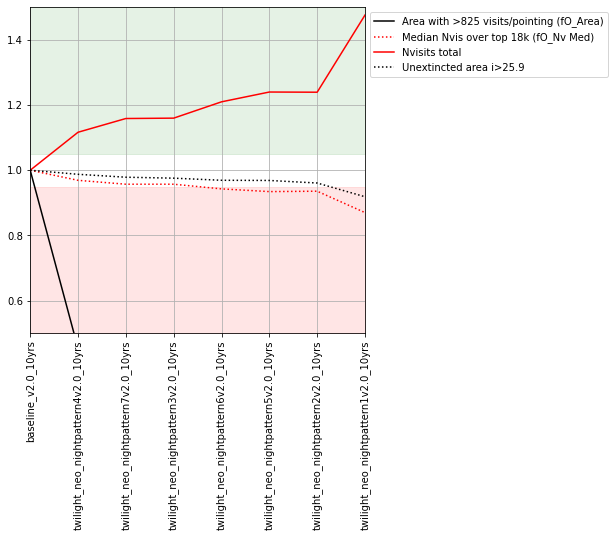

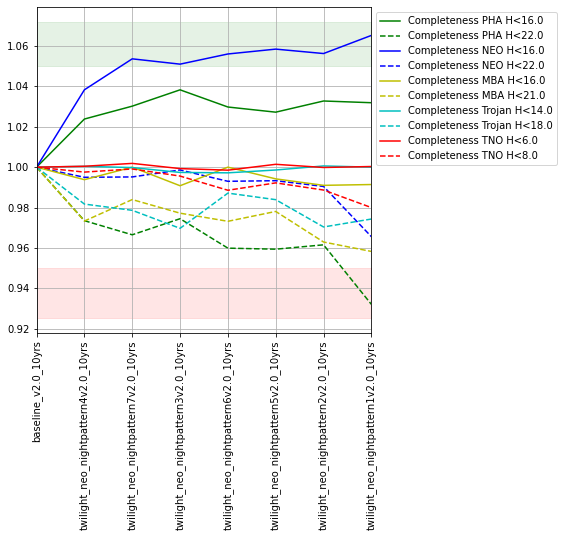

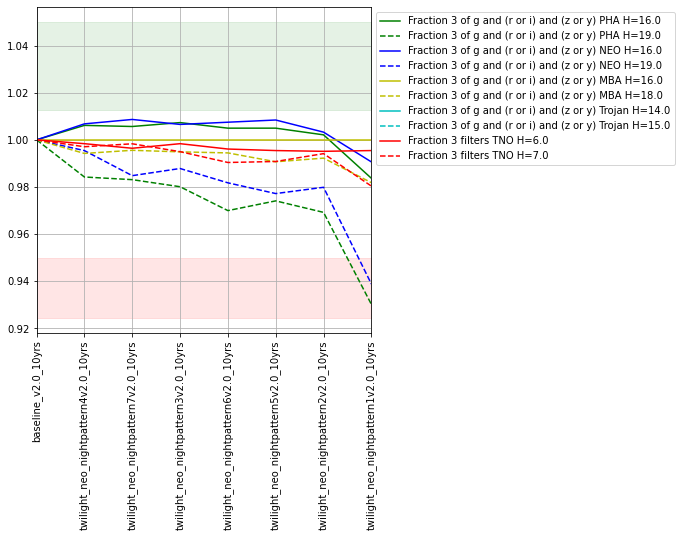

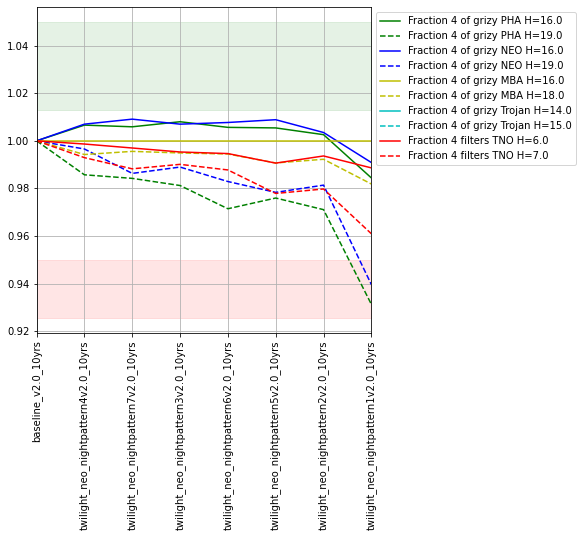

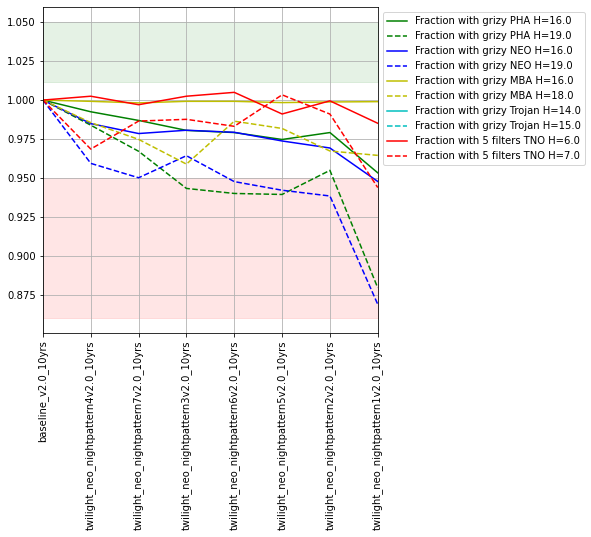

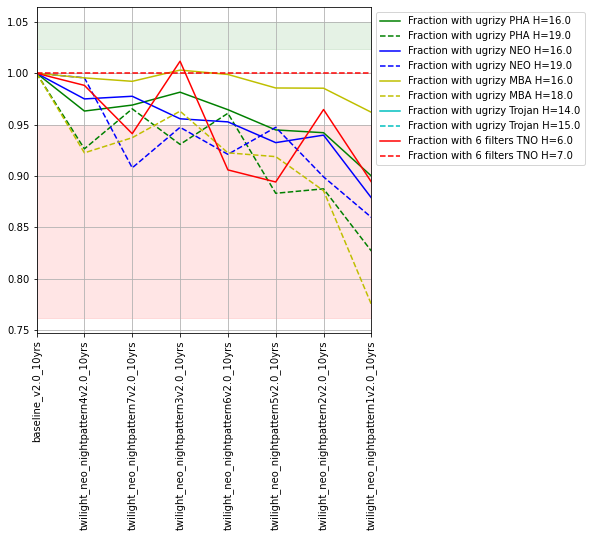

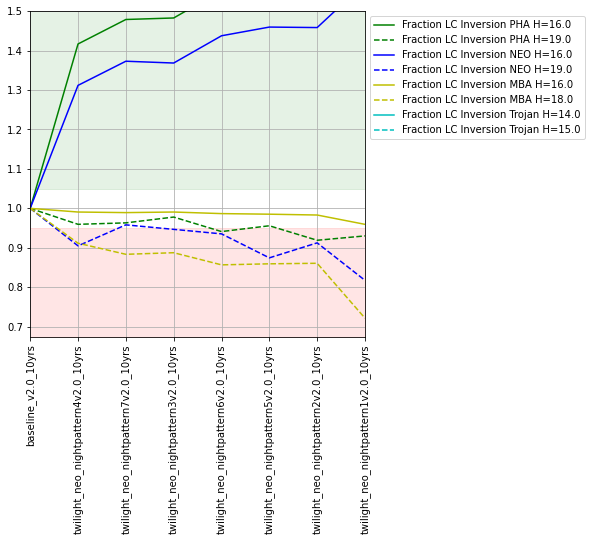

In [182]:
these_runs = [r for r in tt.index if 'twilight' in r]
describe_runs(these_runs)
for mset in sso_metrics:
    d = sso_runs(these_runs, mset)
    IPython.display.display(d)